# MachineLearning 
## 2nd Assignment - Shahid Beheshti University April 18, 2023

### Outline
- [Packages](#0)
- [Exercise 13](#1)
- [Exercise 15](#2)

<a name="0"></a>
##  **Packages** 

In [1]:
import numpy as np 
import pandas as pd
import random
#plotting packages
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
#splitting data to train and test
from sklearn.model_selection import train_test_split
from scipy import stats
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
#model selection 
from sklearn.model_selection import GridSearchCV
#metrics
from statistics import mean, stdev
import math
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#wrapper methods
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#filter methods feature selection
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
import shap
from scipy.stats import chisquare
from sklearn.feature_selection import r_regression, SelectKBest,SelectPercentile,f_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#clustering 
from sklearn.cluster import KMeans
#multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#binning
from scipy.stats import binned_statistic
#Encoding
from sklearn.preprocessing import OrdinalEncoder
#Treat imbalanced target
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
#cross validation
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
#extra
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#15
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

#larger dataframe 
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

# 

<a name="1"></a>
##  **Exercise 13** 
In this part, you are going to work with the Vehicle Insurance Claim Fraud Detection dataset. You will implement multiple classification models using the Scikit-Learn package to predict if a claim application is fraudulent or not, based on about 32 features

  ### Outline
  
- [Models](#1.1.2)
- [EDA Methods](#1.1.2)
- [Load dataset](#1.2)
- [Categorical Features](#1.3)
- [stratified cross-validation](#1.4)
- [Explore Dataset](#1.5)
    - [Numerical](#1.5.1)
    - [Ordinal](#1.5.2)
- [Handle Imbalanced Target](#1.6)
- [Other models](#1.6)





### Using these classes to test our models
- [Models](#1.1.2)
- [Models_stratifed](#1.4)
- [Models_sampling](#1.4.1)
- [Models_weighted](#1.4.3)


# 

<a name="1.1"></a>
## Methods

<a name="1.1.2"></a>
###  **Models** 

In [2]:
class Models():
    
    def __init__(self, dataset, target):
        self.dataset = dataset
        self.target = target
        self.X = self.dataset[dataset.columns.difference([self.target])]
        self.Y = self.dataset[self.target]
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, 
                                                                                test_size = 1/5, random_state = 0 )
        self.dictAccuracy = {}
        self.dictF1       = {}
    


    
    #Method for display confusion matrix and ROC a AUC 
    def confusionMat(self, Y_test, y_pred,y_prob):
        cf_matrix = confusion_matrix(Y_test, y_pred)
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        fpr, tpr, thresh = roc_curve(Y_test, y_prob, pos_label=1)
        auc = roc_auc_score(Y_test, y_prob)
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))
        sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',ax=ax[0])
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
    
    #Logistic
    
    def Logistic(self):
        logreg = LogisticRegression(random_state=16, max_iter=1000)
        logreg.fit(self.X_train, self.Y_train)
        y_pred = logreg.predict(self.X_test)
        y_prob = logreg.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        print("\nLogisticRegression...................................\n") 
        print("Accuracy:", accuracy)
        self.dictAccuracy['LogisticRegression'] = accuracy
        print("F1-Score:", f1)
        self.dictF1['LogisticRegression'] = f1
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames,zero_division=1))
    
    #Decison Tree
    def DT(self,plt):
        dtc = DecisionTreeClassifier()
        dtc.fit(self.X_train, self.Y_train)
        y_pred = dtc.predict(self.X_test)
        y_prob = dtc.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        self.dictAccuracy['DecisionTree'] = accuracy
        self.dictF1['DecisionTree'] = f1
        print("\nDecisionTree.........................................\n") 
        print("Accuracy:", accuracy)
        print("F1-Score:", f1)
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames))
        dtc.feature_importances_
        if plt:
            self.decisonFeature(self.dataset.columns.difference([target])
                           ,dtc.feature_importances_ )
            
            

    #Random forest 
    def RF(self):
        rf = RandomForestClassifier(n_estimators=500, random_state=42)
        rf.fit(self.X_train, self.Y_train)
        y_pred = rf.predict(self.X_test)
        y_prob = rf.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        self.dictAccuracy['Random forest'] = accuracy
        self.dictF1['Random forest'] = f1
        print("\nRandomForest.........................................\n") 
        print("Accuracy:", accuracy)
        print("F1-Score:", f1)
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames))
    
    #KNN
    def KNN(self):
        knn = KNeighborsClassifier()
        knn.fit(self.X_train, self.Y_train)
        y_pred = knn.predict(self.X_test)
        y_prob = knn.predict_proba(self.X_test)[:, 1]

        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        self.dictAccuracy['KNN'] = accuracy
        self.dictF1['KNN'] = f1
        print("\nKNN..................................................\n") 
        print("Accuracy:", accuracy)
        print("F1-Score:", str(f1))
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames))
    
    #SVC
    def SVC(self):
        clf = SVC(kernel='linear', probability=True)
        clf.fit(self.X_train,self.Y_train)
        y_pred = clf.predict(self.X_test)
        y_prob = clf.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        self.dictAccuracy['SVC'] = accuracy
        self.dictF1['SVC'] = f1
        print("\nSVC..................................................\n") 
        print("Accuracy:", accuracy)
        print("F1-Score:", f1)
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames , zero_division=1))
        
    #Metric Table 
    def table(self):
        self.dictF1 = sorted(self.dictF1.items(), key=lambda x:x[1],reverse=True)
        self.dictAccuracy = sorted(self.dictAccuracy.items(), key=lambda x:x[1] ,reverse=True)
        acc = pd.DataFrame.from_dict(self.dictAccuracy)
        f1 = pd.DataFrame.from_dict(self.dictF1)

        print("\nF1-Score.............................................\n")
        print(f1)
     
        print("\nAccuracy.............................................\n")
        print(acc)
            
    #Feature importance
    def decisonFeature(self ,features ,importances ):
        print("\nFeature Importance...................................\n") 
        wid = len(features) 
        print(len(features), len(importances))
        print(wid)
        figure(figsize=(20,wid))
        sorted_idx = importances.argsort()
        print(features[sorted_idx])
        plt.barh(features[sorted_idx], importances[sorted_idx])
        plt.show()
        
    
    def ROC_AUC(self,Y_test,y_pred):
        fpr, tpr, thresh = roc_curve(Y_test, y_pred, pos_label=1)
        plt.figure(figsize=(8,5))
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    #Output
    def testClassification(self):
        self.Logistic()
        self.DT(False)
        self.RF()
        self.KNN()
        self.SVC()
        self.table()    

<a name="1.1.2"></a>
### EDA Methods

In [3]:
def featureAnalysis(feature,dataset):
    a = dataset.describe()
    b = a[feature].to_frame().T
    fig, ax = plt.subplots(2, 1, figsize=(20, 18))
    sns.histplot(x=dataset[feature], data=dataset, kde=True, element="step",ax=ax[0])
    sns.boxplot(data=dataset , x = feature ,ax=ax[1])
    return(b)

<a name="1.2"></a>
## Load Dataset

In [4]:
dataset = pd.read_csv('dataset/fraud_oracle.csv')

In [5]:
dataset.shape

(15420, 33)

In [6]:
target = 'FraudFound_P'

In [7]:
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [9]:
#No null values
#String 22
#Integer 9
#Boolean 2

In [10]:
dataset=dataset.drop_duplicates()
dataset.shape

(15420, 33)

In [11]:
#No duplicated value

In [12]:
dataset.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


array([[<AxesSubplot:title={'center':'WeekOfMonth'}>,
        <AxesSubplot:title={'center':'WeekOfMonthClaimed'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'FraudFound_P'}>,
        <AxesSubplot:title={'center':'PolicyNumber'}>,
        <AxesSubplot:title={'center':'RepNumber'}>],
       [<AxesSubplot:title={'center':'Deductible'}>,
        <AxesSubplot:title={'center':'DriverRating'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

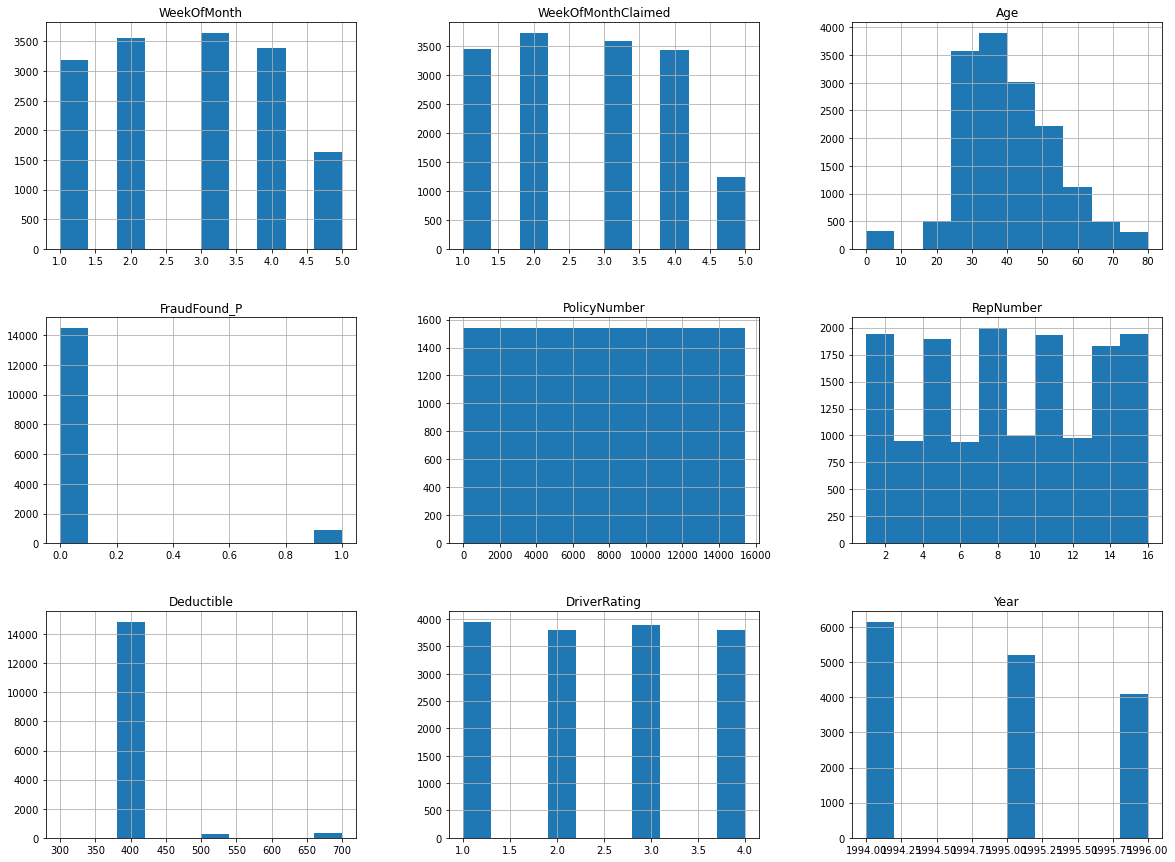

In [13]:
dataset.hist(figsize=(20,15))

In [14]:
dataset['PolicyNumber']

0            1
1            2
2            3
3            4
4            5
         ...  
15415    15416
15416    15417
15417    15418
15418    15419
15419    15420
Name: PolicyNumber, Length: 15420, dtype: int64

In [15]:
dataset.drop('PolicyNumber', inplace=True, axis=1)

**Let's check target specifcly**

,count,mean,std,min,25%,50%,75%,max
FraudFound_P,15420.0,0.059857,0.23723,0.0,0.0,0.0,0.0,1.0


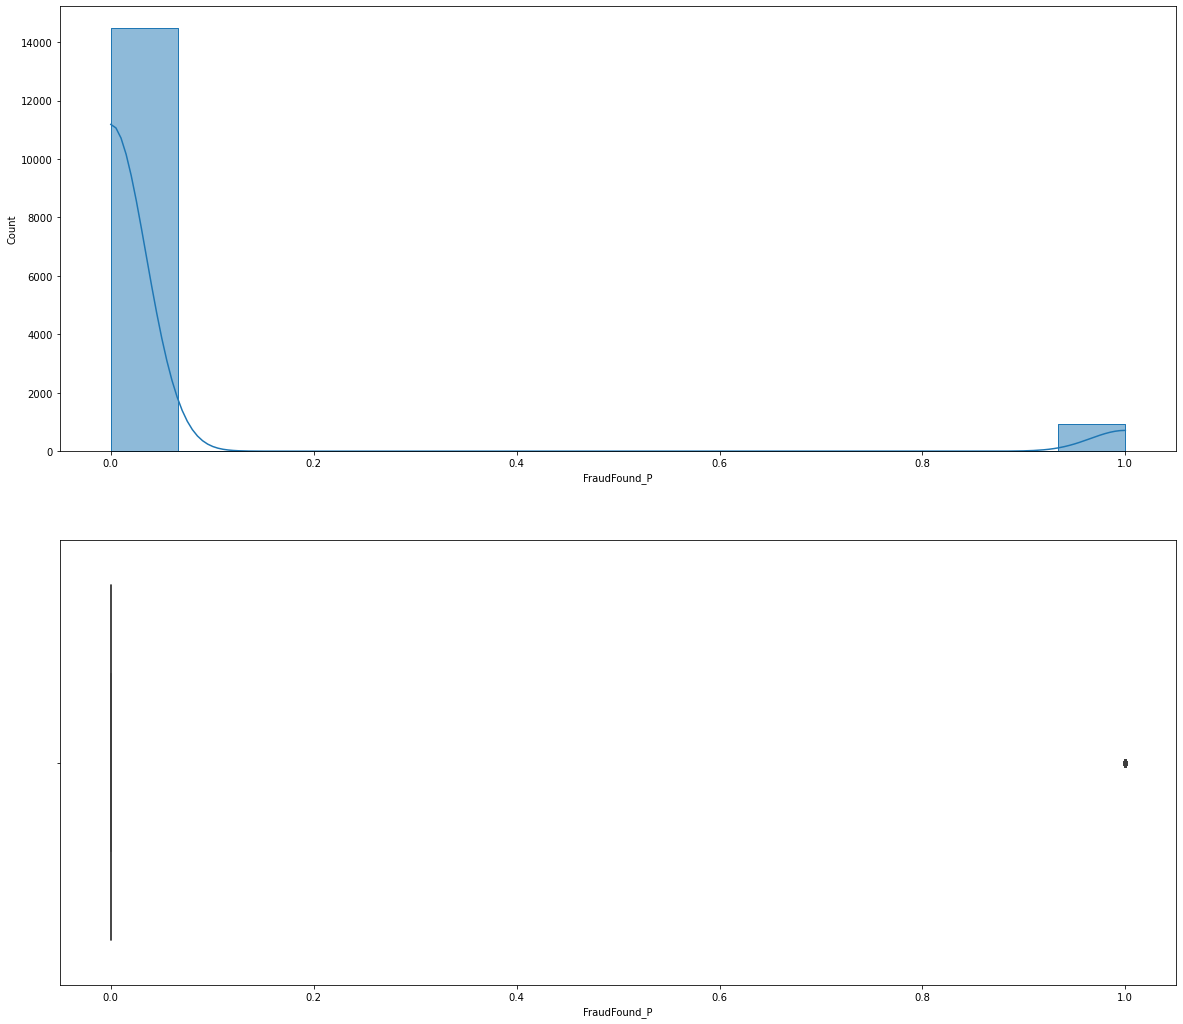

In [16]:
featureAnalysis('FraudFound_P',dataset)

**Over 95 percent of our target is labeled as zero so Imbalanced dataset**

In [17]:
dataset[dataset['FraudFound_P'] == 0]['FraudFound_P'].count() / dataset.shape[0]

0.9401426718547341

In [18]:
orginal = dataset.copy()

# 

<a name="1.3"></a>
## Handle Categorical Features

First we should seperate nominal and ordinal

In [19]:
category = dataset.select_dtypes(include=['object']).columns.tolist()
category

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [20]:
ordinal = ['Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed'
          ,'VehiclePrice','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle'
          ,'AgeOfPolicyHolder','NumberOfSuppliments','AddressChange_Claim','NumberOfCars']

In [21]:
setCat = set(category)
nominal = setCat.difference(ordinal)
nominal

{'AccidentArea',
 'AgentType',
 'BasePolicy',
 'Fault',
 'Make',
 'MaritalStatus',
 'PoliceReportFiled',
 'PolicyType',
 'Sex',
 'VehicleCategory',
 'WitnessPresent'}

**Using ordinal encoding for ordinal features**

In [22]:
len(orginal['AgeOfPolicyHolder'].unique())

9

In [23]:
orginal['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [24]:
map_month = {"Jan":0, "Feb":1, "Mar":2 , 
             "Apr":3, "May":4, "Jun":5,
             "Jul":6, "Aug":7, "Sep":8,
             "Oct":9, "Nov":10, "Dec":11}

map_day      = {"Sunday":0, "Monday":1, "Tuesday":2 , 
                "Thursday":3, "Wednesday":4, "Friday":5,
                "Saturday":6}
#start from one 
map_price    = {"less than 20000":1, "20000 to 29000":2, "30000 to 39000":3 , 
                "40000 to 59000" :4, "60000 to 69000":5, "more than 69000":6}

map_dayAcc   = {"none":0, "1 to 7":1, "8 to 15":2 , 
                "15 to 30":3, "more than 30":4}

map_dayClaim = {"none":0,  "8 to 15":1 ,"15 to 30":2, "more than 30":3}

map_postNUm  = {"none":0,  "1":1 ,"2 to 4":2, "more than 4":3}

map_age      = {"new":1,  "2 years":2 ,"3 years":3, 
                "4 years":4, "5 years":5, "6 years":6,
                "7 years":7, "more than 7":9}

map_agePol      = {"16 to 17":1 ,  "18 to 20":2 ,"21 to 25":4, 
                "26 to 30":5  ,  "31 to 35":6  , "36 to 40":7,
                "41 to 50":10  ,  "51 to 65":15 , "over 65":20}

map_Supp = {"none":0,  "1 to 2":1 ,"3 to 5":2, "more than 5":3}
#Not equal gap between 
map_add =  { "no change":0, "under 6 months":1 ,"1 year":2 ,"2 to 3 years":3, "4 to 8 years":5} 

map_cars = {"1 vehicle":1, "2 vehicles":2 ,"3 to 4":3.5 ,"5 to 8":6.5, "more than 8":10}

In [25]:
dataset['Month']=dataset.Month.map(map_month)
dataset['DayOfWeek']=dataset.DayOfWeek.map(map_day)
dataset['DayOfWeekClaimed']=dataset.DayOfWeekClaimed.map(map_day)
dataset['MonthClaimed']=dataset.MonthClaimed.map(map_month)
dataset['VehiclePrice']=dataset.VehiclePrice.map(map_price)
dataset['Days_Policy_Accident']=dataset.Days_Policy_Accident.map(map_dayAcc)
dataset['Days_Policy_Claim']=dataset.Days_Policy_Claim.map(map_dayClaim)
dataset['PastNumberOfClaims']=dataset.PastNumberOfClaims.map(map_postNUm)
dataset['AgeOfVehicle']=dataset.AgeOfVehicle.map(map_age)
dataset['AgeOfPolicyHolder']=dataset.AgeOfPolicyHolder.map(map_agePol)
dataset['NumberOfSuppliments']=dataset.NumberOfSuppliments.map(map_Supp)
dataset['AddressChange_Claim']=dataset.AddressChange_Claim.map(map_add)
dataset['NumberOfCars']=dataset.NumberOfCars.map(map_cars)

In [26]:
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,11,5,4,Honda,Urban,2.0,0.0,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,6,0,12,300,1,4,3,0,3,5,No,No,External,0,2,3.5,1994,Liability
1,0,3,4,Honda,Urban,1.0,0.0,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,6,0,15,400,4,4,3,0,6,6,Yes,No,External,0,0,1.0,1994,Collision
2,9,5,5,Honda,Urban,3.0,10.0,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,6,0,7,400,3,4,3,1,7,10,No,No,External,0,0,1.0,1994,Collision
3,5,2,6,Toyota,Rural,5.0,6.0,1,Male,Married,65,Third Party,Sedan - Liability,Sport,2,0,4,400,2,4,3,1,9,15,Yes,No,External,3,0,1.0,1994,Liability
4,0,5,1,Honda,Urban,2.0,1.0,2,Female,Single,27,Third Party,Sport - Collision,Sport,6,0,3,400,1,4,3,0,5,6,No,No,External,0,0,1.0,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10,4,5,Toyota,Urban,2.0,10.0,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,2,1,5,400,4,4,3,2,6,6,No,No,External,0,0,1.0,1996,Collision
15416,10,5,3,Pontiac,Urban,5.0,11.0,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,3,0,11,400,3,4,3,3,6,6,No,No,External,3,0,3.5,1996,Liability
15417,10,5,3,Toyota,Rural,5.0,11.0,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,2,1,4,400,4,4,3,3,5,5,No,No,External,1,0,1.0,1996,Collision
15418,11,1,1,Toyota,Urban,3.0,11.0,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,2,0,6,400,4,4,3,0,2,6,No,No,External,3,0,1.0,1996,All Perils


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15419 non-null  float64
 6   MonthClaimed          15419 non-null  float64
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  int64  
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  int64  
 15  FraudFound_P       

In [28]:
dataset[dataset['DayOfWeekClaimed'].isnull()]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,6,2,1,Honda,Rural,NaN,NaN,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,6,0,15,400,2,4,0,0,1,1,No,No,External,0,0,1.0,1994,All Perils


In [29]:
orginal.loc[1516]

Month                                  Jul
WeekOfMonth                              2
DayOfWeek                           Monday
Make                                 Honda
AccidentArea                         Rural
DayOfWeekClaimed                         0
MonthClaimed                             0
WeekOfMonthClaimed                       1
Sex                                   Male
MaritalStatus                       Single
Age                                      0
Fault                        Policy Holder
PolicyType              Sedan - All Perils
VehicleCategory                      Sedan
VehiclePrice               more than 69000
FraudFound_P                             0
RepNumber                               15
Deductible                             400
DriverRating                             2
Days_Policy_Accident          more than 30
Days_Policy_Claim                     none
PastNumberOfClaims                    none
AgeOfVehicle                           new
AgeOfPolicy

**Set DayOfWeekClaimed and MonthClaimed to zero**

In [30]:
dataset.loc[1516]

Month                                    6
WeekOfMonth                              2
DayOfWeek                                1
Make                                 Honda
AccidentArea                         Rural
DayOfWeekClaimed                       NaN
MonthClaimed                           NaN
WeekOfMonthClaimed                       1
Sex                                   Male
MaritalStatus                       Single
Age                                      0
Fault                        Policy Holder
PolicyType              Sedan - All Perils
VehicleCategory                      Sedan
VehiclePrice                             6
FraudFound_P                             0
RepNumber                               15
Deductible                             400
DriverRating                             2
Days_Policy_Accident                     4
Days_Policy_Claim                        0
PastNumberOfClaims                       0
AgeOfVehicle                             1
AgeOfPolicy

Drop it

In [31]:
dataset = dataset[dataset['DayOfWeekClaimed'].notnull()]

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15419 non-null  int64  
 1   WeekOfMonth           15419 non-null  int64  
 2   DayOfWeek             15419 non-null  int64  
 3   Make                  15419 non-null  object 
 4   AccidentArea          15419 non-null  object 
 5   DayOfWeekClaimed      15419 non-null  float64
 6   MonthClaimed          15419 non-null  float64
 7   WeekOfMonthClaimed    15419 non-null  int64  
 8   Sex                   15419 non-null  object 
 9   MaritalStatus         15419 non-null  object 
 10  Age                   15419 non-null  int64  
 11  Fault                 15419 non-null  object 
 12  PolicyType            15419 non-null  object 
 13  VehicleCategory       15419 non-null  object 
 14  VehiclePrice          15419 non-null  int64  
 15  FraudFound_P       

**Using one-hat encoding for nominal features**

In [33]:
dataset = pd.get_dummies(dataset, columns = nominal)

In [34]:
dataset

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,PoliceReportFiled_No,PoliceReportFiled_Yes,Fault_Policy Holder,Fault_Third Party,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,WitnessPresent_No,WitnessPresent_Yes,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,AccidentArea_Rural,AccidentArea_Urban,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,AgentType_External,AgentType_Internal
0,11,5,4,2.0,0.0,1,21,6,0,12,300,1,4,3,0,3,5,0,2,3.5,1994,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
1,0,3,4,1.0,0.0,4,34,6,0,15,400,4,4,3,0,6,6,0,0,1.0,1994,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,9,5,5,3.0,10.0,2,47,6,0,7,400,3,4,3,1,7,10,0,0,1.0,1994,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0
3,5,2,6,5.0,6.0,1,65,2,0,4,400,2,4,3,1,9,15,3,0,1.0,1994,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
4,0,5,1,2.0,1.0,2,27,6,0,3,400,1,4,3,0,5,6,0,0,1.0,1994,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10,4,5,2.0,10.0,5,35,2,1,5,400,4,4,3,2,6,6,0,0,1.0,1996,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
15416,10,5,3,5.0,11.0,1,30,3,0,11,400,3,4,3,3,6,6,3,0,3.5,1996,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
15417,10,5,3,5.0,11.0,1,24,2,1,4,400,4,4,3,3,5,5,1,0,1.0,1996,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
15418,11,1,1,3.0,11.0,2,34,2,0,6,400,4,4,3,0,2,6,3,0,1.0,1996,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            15419 non-null  int64  
 1   WeekOfMonth                      15419 non-null  int64  
 2   DayOfWeek                        15419 non-null  int64  
 3   DayOfWeekClaimed                 15419 non-null  float64
 4   MonthClaimed                     15419 non-null  float64
 5   WeekOfMonthClaimed               15419 non-null  int64  
 6   Age                              15419 non-null  int64  
 7   VehiclePrice                     15419 non-null  int64  
 8   FraudFound_P                     15419 non-null  int64  
 9   RepNumber                        15419 non-null  int64  
 10  Deductible                       15419 non-null  int64  
 11  DriverRating                     15419 non-null  int64  
 12  Days_Policy_Accide

In [36]:
dataset_imbalanced = dataset.copy()

In [134]:
model1 = Models(dataset,'FraudFound_P')

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression...................................

Accuracy: 0.9383916990920882
F1-Score: 0.0


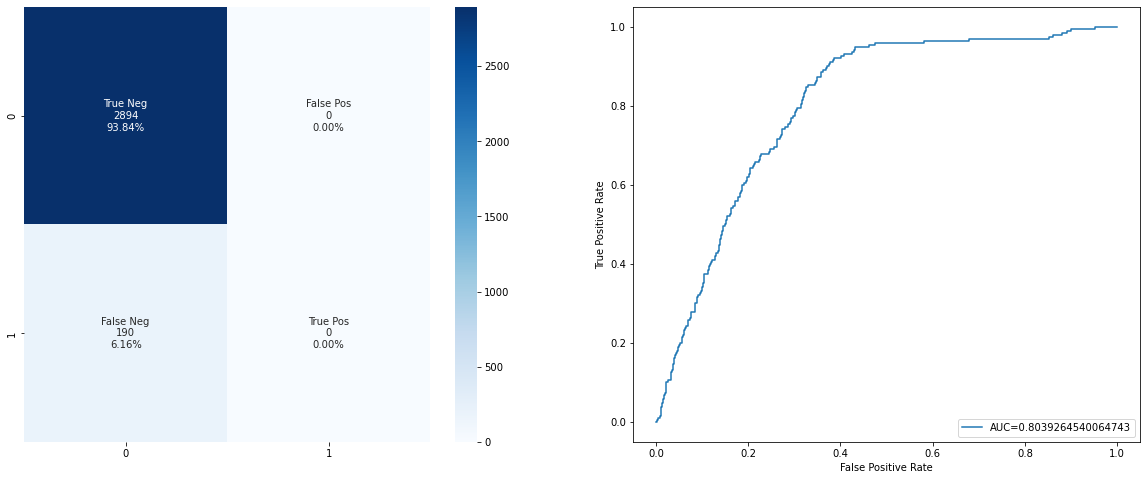

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      2894
          No       1.00      0.00      0.00       190

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.48      3084
weighted avg       0.94      0.94      0.91      3084


DecisionTree.........................................

Accuracy: 0.8929961089494164
F1-Score: 0.1911764705882353


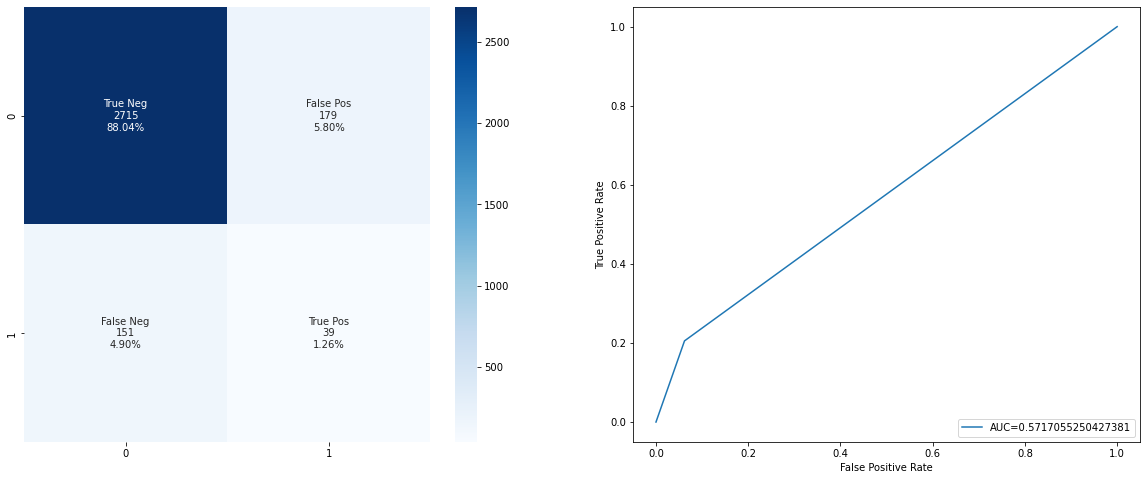

              precision    recall  f1-score   support

         Yes       0.95      0.94      0.94      2894
          No       0.18      0.21      0.19       190

    accuracy                           0.89      3084
   macro avg       0.56      0.57      0.57      3084
weighted avg       0.90      0.89      0.90      3084


RandomForest.........................................

Accuracy: 0.9380674448767834
F1-Score: 0.010362694300518133


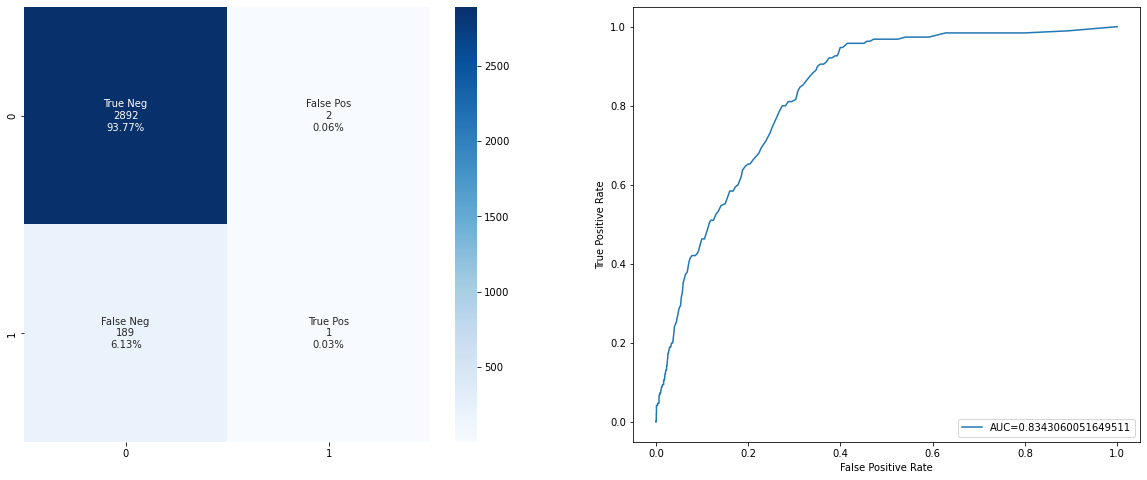

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      2894
          No       0.33      0.01      0.01       190

    accuracy                           0.94      3084
   macro avg       0.64      0.50      0.49      3084
weighted avg       0.90      0.94      0.91      3084


KNN..................................................

Accuracy: 0.9364461738002594
F1-Score: 0.0392156862745098


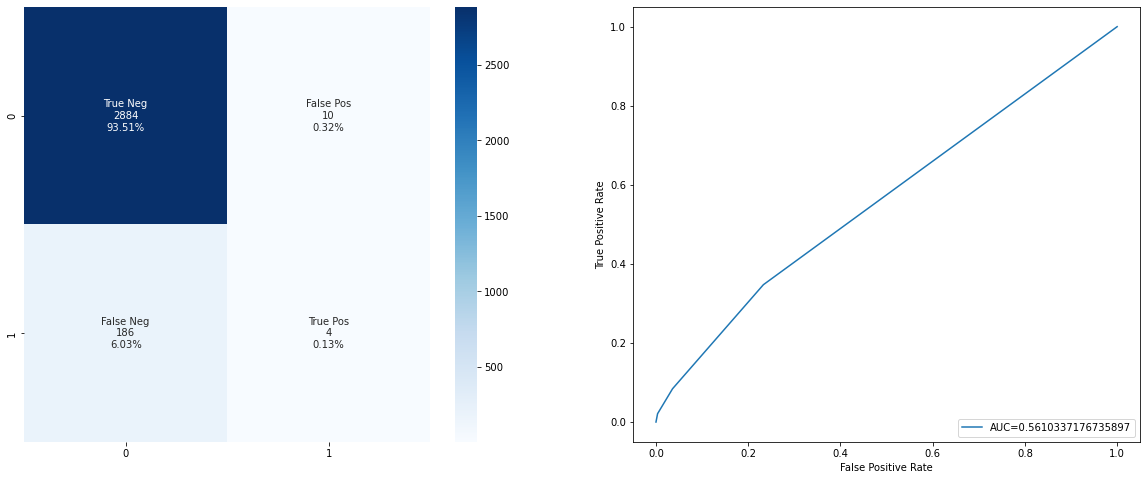

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      2894
          No       0.29      0.02      0.04       190

    accuracy                           0.94      3084
   macro avg       0.61      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084


SVC..................................................

Accuracy: 0.9383916990920882
F1-Score: 0.0


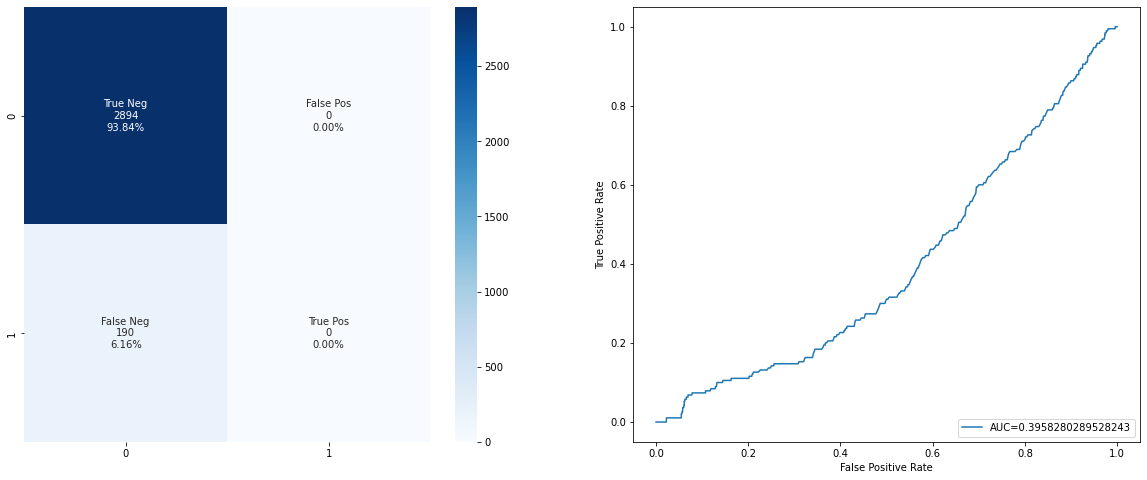

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      2894
          No       1.00      0.00      0.00       190

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.48      3084
weighted avg       0.94      0.94      0.91      3084


F1-Score.............................................

                    0         1
0        DecisionTree  0.191176
1                 KNN  0.039216
2       Random forest  0.010363
3  LogisticRegression  0.000000
4                 SVC  0.000000

Accuracy.............................................

                    0         1
0  LogisticRegression  0.938392
1                 SVC  0.938392
2       Random forest  0.938067
3                 KNN  0.936446
4        DecisionTree  0.892996


In [135]:
model1.testClassification()

Getting high accuracy in all models(close to 90 percent) but is it really good? Absolutely not just look at the confusion matrix percentages.<br>
The main reason behind this fake high score is the imbalanced target<br>
We can find this out by looking f1score that is very close to zero

<AxesSubplot:>

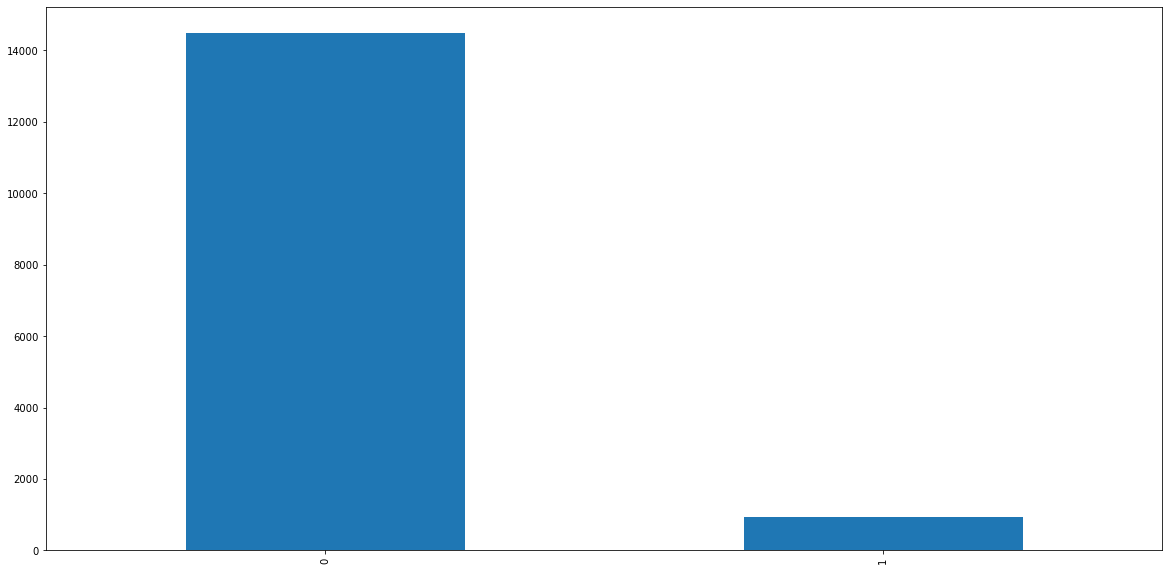

In [37]:
indpie = dataset_imbalanced['FraudFound_P'].value_counts()
indpie.plot(kind='bar',figsize=(20,10))

In [38]:
modelFeature = Models(dataset,'FraudFound_P')


DecisionTree.........................................

Accuracy: 0.8900778210116731
F1-Score: 0.1588089330024814


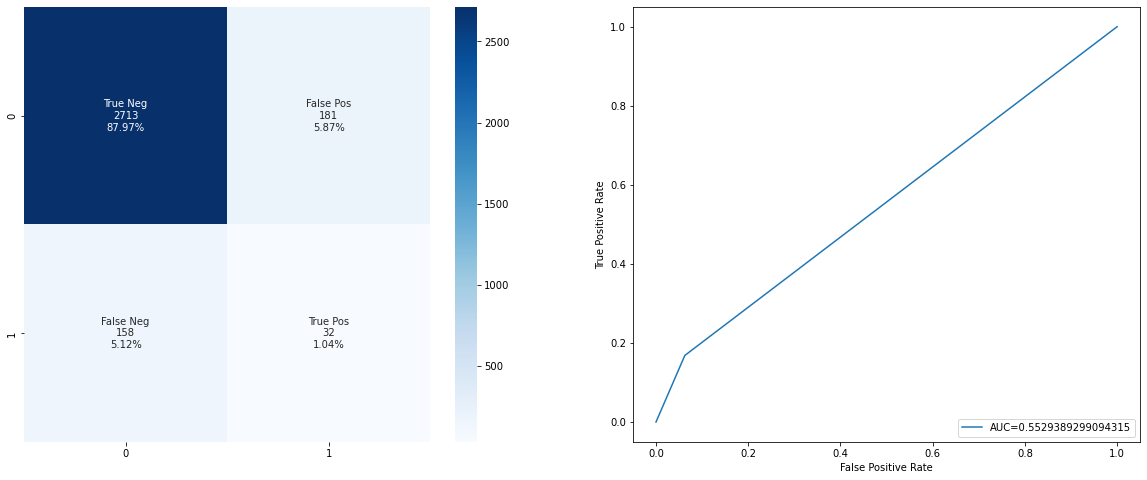

              precision    recall  f1-score   support

         Yes       0.94      0.94      0.94      2894
          No       0.15      0.17      0.16       190

    accuracy                           0.89      3084
   macro avg       0.55      0.55      0.55      3084
weighted avg       0.90      0.89      0.89      3084


Feature Importance...................................

70 70
70
Index(['Fault_Policy Holder', 'PolicyType_Sedan - All Perils', 'Make_Jaguar',
       'WitnessPresent_No', 'PolicyType_Sport - Liability',
       'VehicleCategory_Sport', 'AgentType_External', 'AgentType_Internal',
       'PolicyType_Utility - Collision', 'PolicyType_Sedan - Liability',
       'VehicleCategory_Sedan', 'Make_Ferrari', 'Make_Nisson', 'Make_Porche',
       'Make_Lexus', 'PolicyType_Utility - Liability', 'Make_Mecedes',
       'Make_Mercury', 'PolicyType_Sport - All Perils', 'Make_BMW',
       'VehicleCategory_Utility', 'WitnessPresent_Yes',
       'PoliceReportFiled_Yes', 'Make_VW', 'Base

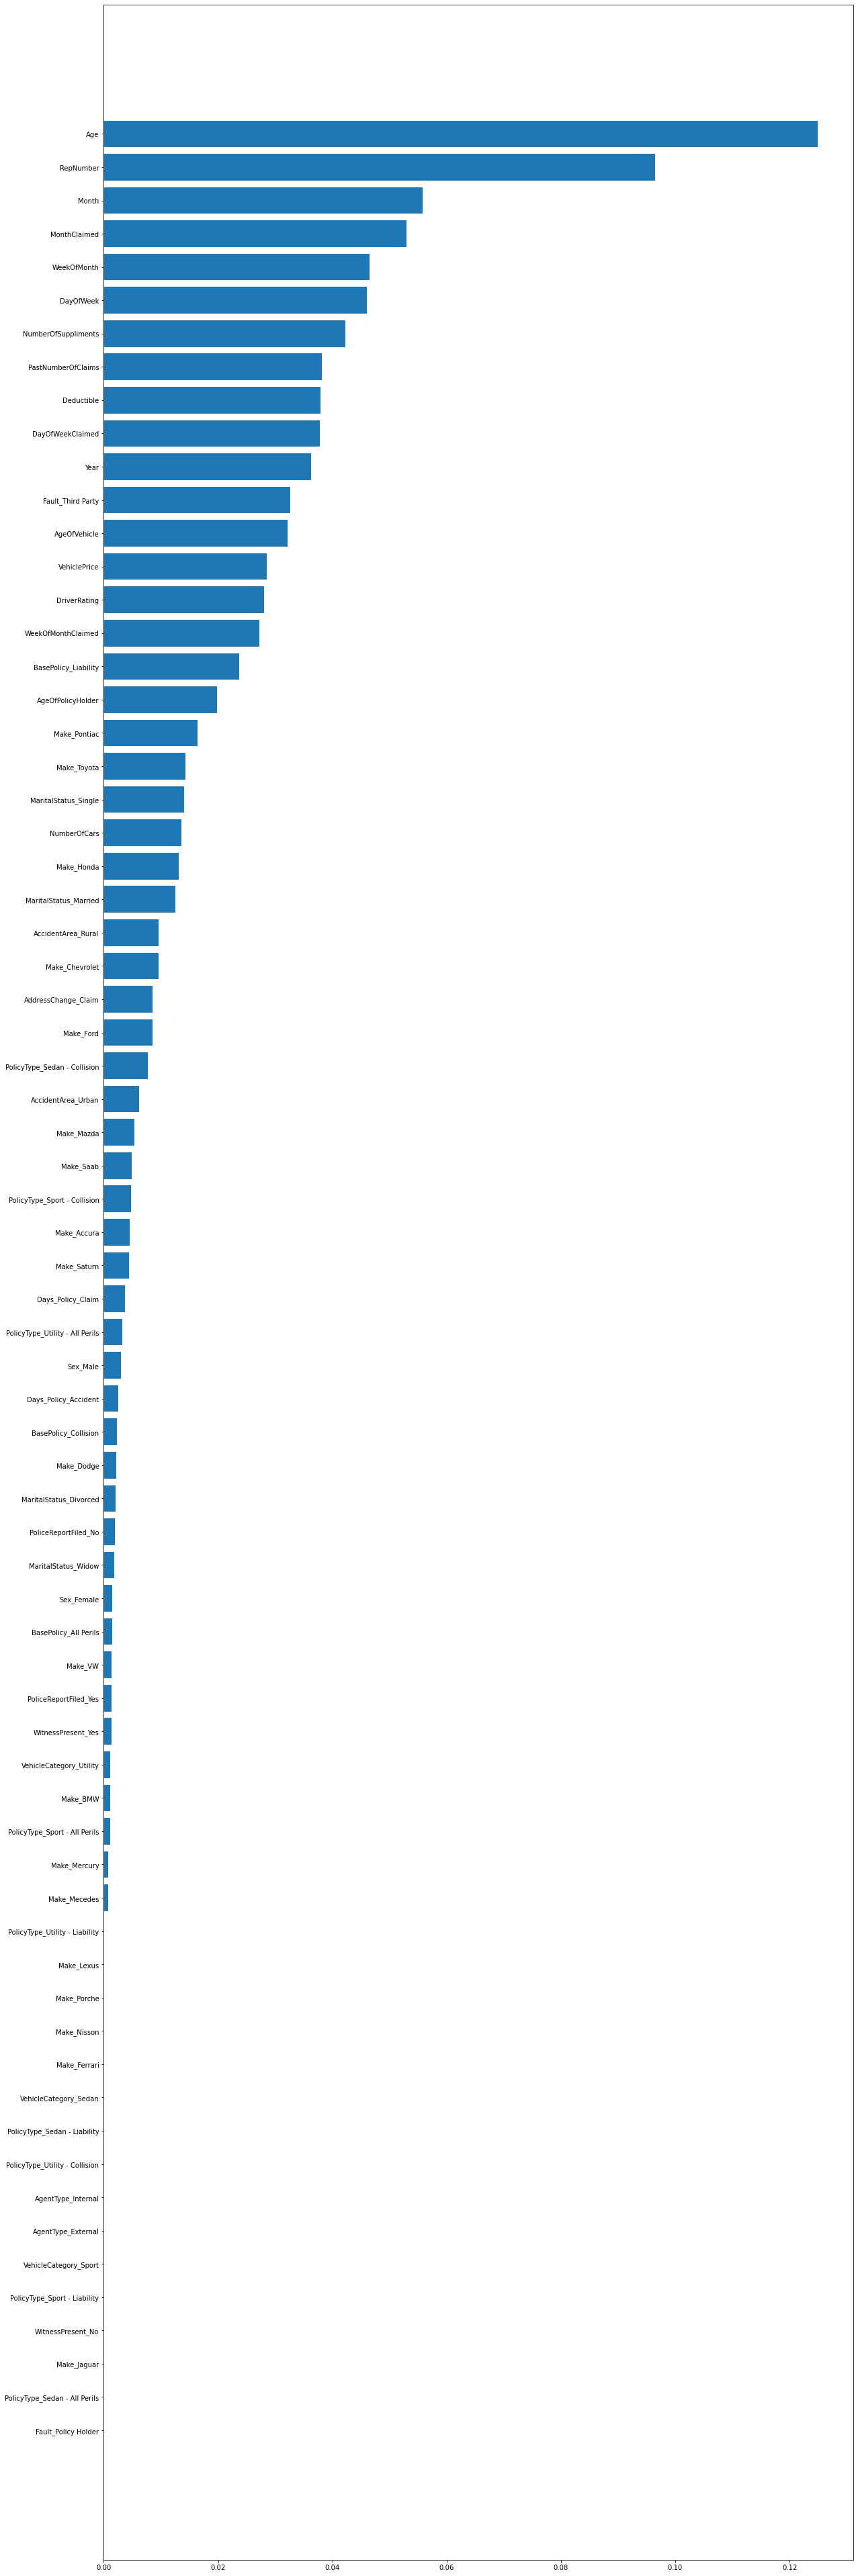

In [39]:
modelFeature.DT(True)

**Stratified kfold cross validation** is typically useful when we have imbalanced data and where the data size is on the small side.

- [Models](#1.1.2)
- [Models_stratifed](#1.4)
- [Models_sampling](#1.4.1)
- [Models_weighted](#1.4.3)

<a name="1.4"></a>
## Stratified cross-validation

In [40]:
class Models_Startified():
    
    def __init__(self, dataset, target,Ksplit):
        self.Ksplit = Ksplit
        self.dataset = dataset
        self.target = target
        self.X = self.dataset[dataset.columns.difference([self.target])]
        self.Y = self.dataset[self.target]
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, 
                                                                                test_size = 1/5, random_state = 0 )
        self.dictAccuracy = {}
        self.dictF1       = {}
        self.skf = StratifiedKFold(n_splits=self.Ksplit, shuffle=True, random_state=1)
    

    def confusionMat(self, Y_test, y_pred,y_prob):
        cf_matrix = confusion_matrix(Y_test, y_pred)
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        fpr, tpr, thresh = roc_curve(Y_test, y_prob, pos_label=1)
        auc = roc_auc_score(Y_test, y_prob)
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))
        sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',ax=ax[0])
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
    


        
    def possibility_acc_f1(self,dictAcc,dictF1):
        print('List of possible accuracy:', dictAcc.values())
        print('\nMaximum Accuracy That can be obtained from this model is:',
              max(dictAcc.values())*100, '%')
        print('\nMinimum Accuracy:',
              min(dictAcc.values())*100, '%')
        print('\nOverall Accuracy:',
              mean(dictAcc.values())*100, '%')
        print('\nStandard Deviation is:', stdev(dictAcc.values()))
        print()
        print('List of possible F1-score:', dictF1.values())
        print('\nMaximum F1-score That can be obtained from this model is:',
              max(dictF1.values())*100, '%')
        print('\nMinimum F1-score:',
              min(dictF1.values())*100, '%')
        print('\nOverall F1-score:',
              mean(dictF1.values())*100, '%')
        print('\nStandard Deviation is:', stdev(dictF1.values()))
        print()
        
    
    #Logistic
    def Logistic(self):
        #Define dictionaries for possible folds
        log_accu_stratified = {}
        log_f1_stratified = {}
        Y_pred ={}
        Y_test ={}
        Y_prob = {}
        
        #Define Model
        logreg = LogisticRegression(random_state=16, max_iter=1000)
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n] = y_test_fold
            
            logreg.fit(x_train_fold, y_train_fold)
            y_prediction = logreg.predict(x_test_fold)
            y_prob = logreg.predict_proba(x_test_fold)[:, 1]
            
            log_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            log_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction         
            Y_prob[n] =  y_prob
            
        print("\nLogisticRegression...................................\n") 
        self.possibility_acc_f1(log_accu_stratified,log_f1_stratified)
        
        self.dictAccuracy['LogisticRegression'] =  max(log_accu_stratified.values())*100
        self.dictF1['LogisticRegression'] = max(log_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(log_f1_stratified, key=lambda x:log_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
    
    
    #Decison Tree
    def DT(self,plt):
        #Define dictionaries for possible folds
        dt_accu_stratified = {}
        dt_f1_stratified = {}
        Y_pred ={}
        Y_prob = {}
        feat_importance={}
        Y_test ={}
        #Define Model
        dtc = DecisionTreeClassifier()
        #Fold counter
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n] = y_test_fold
            dtc.fit(x_train_fold, y_train_fold)
            y_prediction = dtc.predict(x_test_fold)
            y_prob = dtc.predict_proba(x_test_fold)[:, 1]

            dt_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            dt_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction   
            Y_prob[n] = y_prob 

            feat_importance[n]= dtc.feature_importances_ 

        print("\nDecisionTree.........................................\n")
        self.possibility_acc_f1(dt_accu_stratified,dt_f1_stratified)
        self.dictAccuracy['DecisionTree'] =  max(dt_accu_stratified.values())*100
        self.dictF1['DecisionTree'] = max(dt_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(dt_f1_stratified, key=lambda x:dt_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
        if plt:
            self.decisonFeature(self.dataset.columns.difference([target])
                           ,feat_importance[max_n])
            
            

    #Random forest 
    def RF(self):
        #Define dictionaries for possible folds
        rf_accu_stratified = {}
        rf_f1_stratified = {}
        Y_pred ={}
        Y_test = {}
        Y_prob = {}

        #Define Model
        rf = RandomForestClassifier(n_estimators=500, random_state=42)
        #Fold counter
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n]=y_test_fold
            rf.fit(x_train_fold, y_train_fold)
            y_prediction = rf.predict(x_test_fold)
            y_prob = rf.predict_proba(x_test_fold)[:, 1]
            
            rf_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            rf_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction   
            Y_prob[n] =  y_prob

        print("\nRandomForest.........................................\n")
        self.possibility_acc_f1(rf_accu_stratified,rf_f1_stratified)
        self.dictAccuracy['RandomForest'] =  max(rf_accu_stratified.values())*100
        self.dictF1['RandomForest'] = max(rf_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(rf_f1_stratified, key=lambda x:rf_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
    
    #KNN
    def KNN(self):
        #Define dictionaries for possible folds
        knn_accu_stratified ={}
        knn_f1_stratified = {}
        Y_pred ={}
        Y_test={}
        Y_prob = {}

        #Define Model
        knn = KNeighborsClassifier()
        #Fold counter
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n]=y_test_fold
            knn.fit(x_train_fold, y_train_fold)
            y_prediction = knn.predict(x_test_fold)
            y_prob = knn.predict_proba(x_test_fold)[:, 1]

            knn_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            knn_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction 
            Y_prob[n] =  y_prob

        
        print("\nKNN..................................................\n") 
        self.possibility_acc_f1(knn_accu_stratified,knn_f1_stratified)
        self.dictAccuracy['KNN'] =  max(knn_accu_stratified.values())*100
        self.dictF1['KNN'] = max(knn_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(knn_f1_stratified, key=lambda x:knn_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
    
    #SVC
    def SVC(self,kernel):
        #Define dictionaries for possible folds
        svc_accu_stratified = {}
        svc_f1_stratified = {}
        Y_pred ={}
        Y_test={}
        Y_prob = {}
        #Define Model
        clf = SVC(kernel=kernel, probability=True)
        #Fold counter
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n]=y_test_fold
            clf.fit(x_train_fold, y_train_fold)
            y_prediction = clf.predict(x_test_fold)
            y_prob = clf.predict_proba(x_test_fold)[:, 1]
            svc_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            svc_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction 
            Y_prob[n] = y_prob

        print("\nSVC..................................................\n")
        self.possibility_acc_f1(svc_accu_stratified,svc_f1_stratified)
        self.dictAccuracy['SVC'] =  max(svc_accu_stratified.values())*100
        self.dictF1['SVC'] = max(svc_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(svc_f1_stratified, key=lambda x:svc_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
        
        
    #Metric Table 
    def table(self):
        self.dictF1 = sorted(self.dictF1.items(), key=lambda x:x[1],reverse=True)
        self.dictAccuracy = sorted(self.dictAccuracy.items(), key=lambda x:x[1] ,reverse=True)
        acc = pd.DataFrame.from_dict(self.dictAccuracy)
        f1 = pd.DataFrame.from_dict(self.dictF1)

        print("\nF1-Score.............................................\n")
        print(f1)
     
        print("\nAccuracy.............................................\n")
        print(acc)
            
    #Feature importance
    def decisonFeature(self ,features ,importances ):
        print("\nFeature Importance...................................\n") 
        wid = len(features) 
        print(wid)
        figure(figsize=(wid,20))
        sorted_idx = importances.argsort()
        print(features[sorted_idx])
        plt.barh(features[sorted_idx], importances[sorted_idx])
        plt.show()
        
    
    def ROC_AUC(self,Y_test,y_pred):
        fpr, tpr, thresh = roc_curve(Y_test, y_pred, pos_label=1)
        plt.figure(figsize=(8,5))
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    #Output
    def testClassification(self):
        self.Logistic()
        self.DT(False)
        self.RF()
        self.KNN()
        self.SVC('linear')
        self.table()

In [41]:
model1 = Models_Startified(dataset,'FraudFound_P',3)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc


LogisticRegression...................................

List of possible accuracy: dict_values([0.9400778210116731, 0.9400778210116731, 0.9400661607316598])

Maximum Accuracy That can be obtained from this model is: 94.00778210116731 %

Minimum Accuracy: 94.00661607316599 %

Overall Accuracy: 94.00739342516687 %

Standard Deviation is: 6.73206580451369e-06

List of possible F1-score: dict_values([0.0, 0.0, 0.0])

Maximum F1-score That can be obtained from this model is: 0.0 %

Minimum F1-score: 0.0 %

Overall F1-score: 0.0 %

Standard Deviation is: 0.0



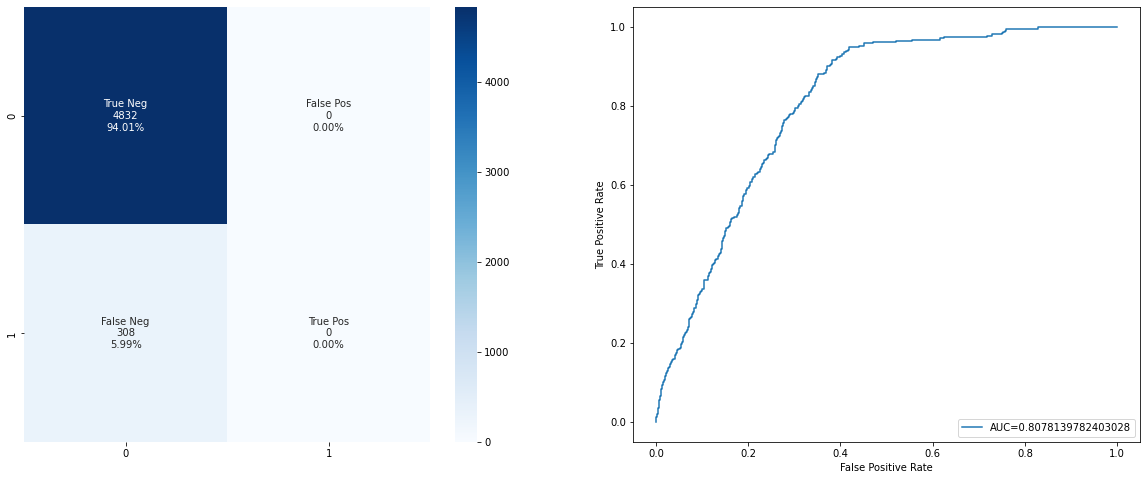

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       1.00      0.00      0.00       308

    accuracy                           0.94      5140
   macro avg       0.97      0.50      0.48      5140
weighted avg       0.94      0.94      0.91      5140


DecisionTree.........................................

List of possible accuracy: dict_values([0.8918287937743191, 0.8959143968871596, 0.8955049620548745])

Maximum Accuracy That can be obtained from this model is: 89.59143968871595 %

Minimum Accuracy: 89.18287937743192 %

Overall Accuracy: 89.44160509054511 %

Standard Deviation is: 0.0022499630702340232

List of possible F1-score: dict_values([0.2034383954154728, 0.183206106870229, 0.1875945537065053])

Maximum F1-score That can be obtained from this model is: 20.34383954154728 %

Minimum F1-score: 18.3206106870229 %

Overall F1-score: 19.141301866406906 %

Standard Deviation is: 0.010642926332480524



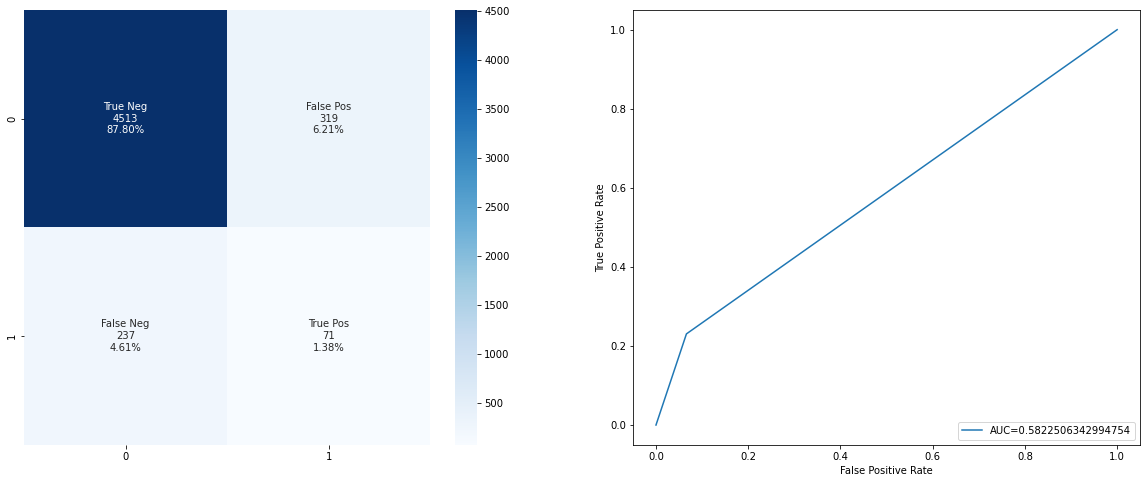

              precision    recall  f1-score   support

         Yes       0.95      0.93      0.94      4832
          No       0.18      0.23      0.20       308

    accuracy                           0.89      5140
   macro avg       0.57      0.58      0.57      5140
weighted avg       0.90      0.89      0.90      5140


RandomForest.........................................

List of possible accuracy: dict_values([0.9396887159533074, 0.9400778210116731, 0.9406499318933644])

Maximum Accuracy That can be obtained from this model is: 94.06499318933645 %

Minimum Accuracy: 93.96887159533074 %

Overall Accuracy: 94.01388229527817 %

Standard Deviation is: 0.0004835027905495407

List of possible F1-score: dict_values([0.0, 0.0064516129032258064, 0.019292604501607715])

Maximum F1-score That can be obtained from this model is: 1.9292604501607715 %

Minimum F1-score: 0.0 %

Overall F1-score: 0.8581405801611174 %

Standard Deviation is: 0.009821056992827867



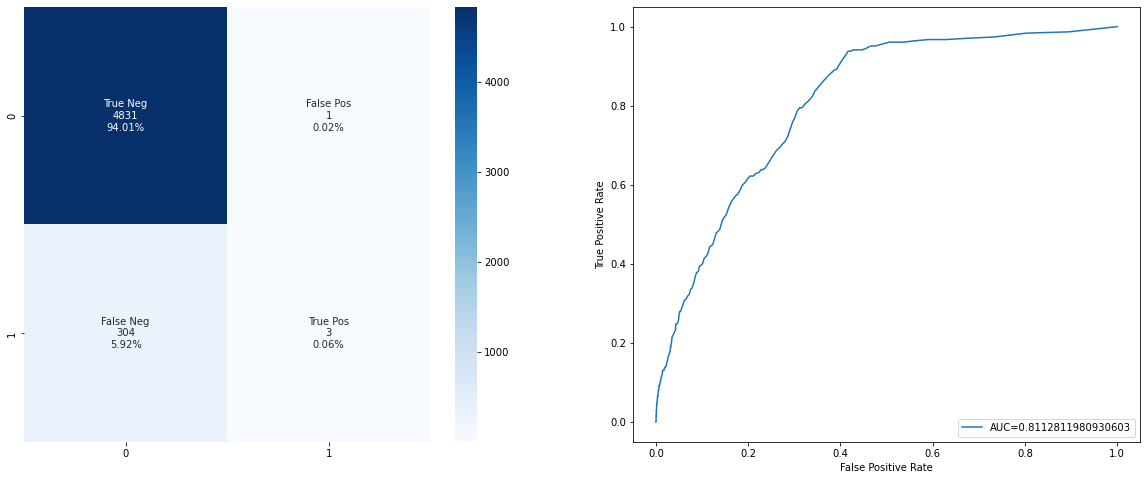

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       0.75      0.01      0.02       307

    accuracy                           0.94      5139
   macro avg       0.85      0.50      0.49      5139
weighted avg       0.93      0.94      0.91      5139


KNN..................................................

List of possible accuracy: dict_values([0.9375486381322957, 0.9379377431906615, 0.9365635337614322])

Maximum Accuracy That can be obtained from this model is: 93.79377431906615 %

Minimum Accuracy: 93.65635337614322 %

Overall Accuracy: 93.73499716947966 %

Standard Deviation is: 0.0007083178339468438

List of possible F1-score: dict_values([0.030211480362537763, 0.01846153846153846, 0.012121212121212121])

Maximum F1-score That can be obtained from this model is: 3.021148036253776 %

Minimum F1-score: 1.2121212121212122 %

Overall F1-score: 2.0264743648429446 %

Standard Deviation is: 0.009178949448074201



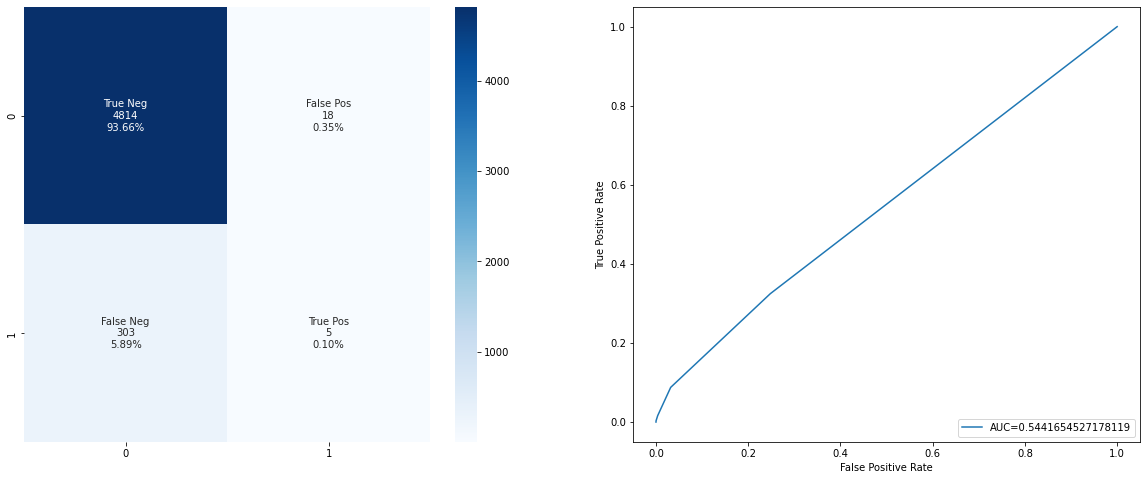

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       0.22      0.02      0.03       308

    accuracy                           0.94      5140
   macro avg       0.58      0.51      0.50      5140
weighted avg       0.90      0.94      0.91      5140


SVC..................................................

List of possible accuracy: dict_values([0.9400778210116731, 0.9400778210116731, 0.9402607511188947])

Maximum Accuracy That can be obtained from this model is: 94.02607511188947 %

Minimum Accuracy: 94.00778210116731 %

Overall Accuracy: 94.01387977140804 %

Standard Deviation is: 0.00010561474664727239

List of possible F1-score: dict_values([0.0, 0.0, 0.0])

Maximum F1-score That can be obtained from this model is: 0.0 %

Minimum F1-score: 0.0 %

Overall F1-score: 0.0 %

Standard Deviation is: 0.0



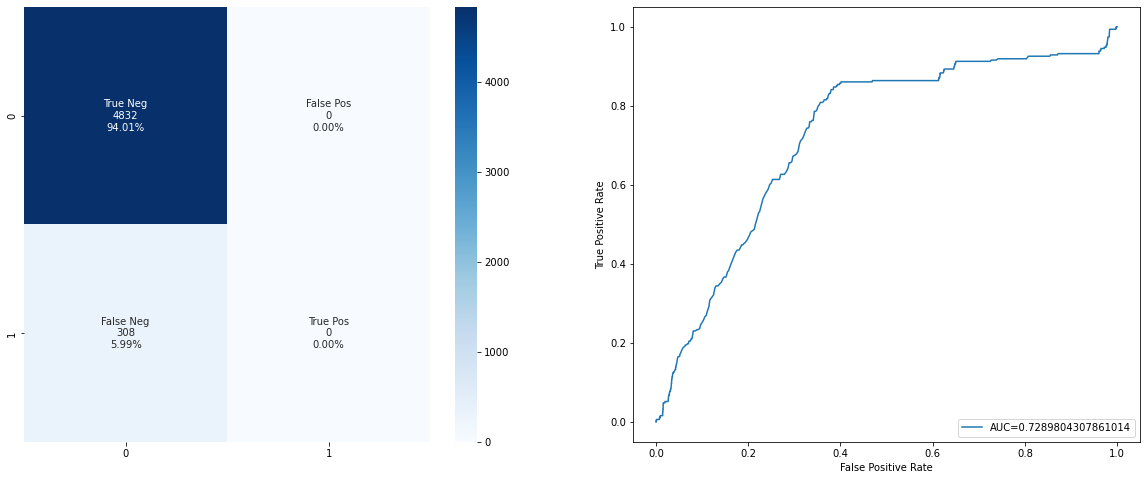

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       1.00      0.00      0.00       308

    accuracy                           0.94      5140
   macro avg       0.97      0.50      0.48      5140
weighted avg       0.94      0.94      0.91      5140


F1-Score.............................................

                    0          1
0        DecisionTree  20.343840
1                 KNN   3.021148
2        RandomForest   1.929260
3  LogisticRegression   0.000000
4                 SVC   0.000000

Accuracy.............................................

                    0          1
0        RandomForest  94.064993
1                 SVC  94.026075
2  LogisticRegression  94.007782
3                 KNN  93.793774
4        DecisionTree  89.591440


In [43]:
model1.testClassification()

<a name="1.5"></a>
## Explore dataset

In [41]:
#copy
dataset_EDA = dataset.copy()

<a name="1.5.1"></a>
### 1.Numerical

In [42]:
numericalOrginal = [ 'Age'
    ,'RepNumber'
    ,'Deductible'
     ,'DriverRating'
       ,'Year']

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RepNumber'}>],
       [<AxesSubplot:title={'center':'Deductible'}>,
        <AxesSubplot:title={'center':'DriverRating'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

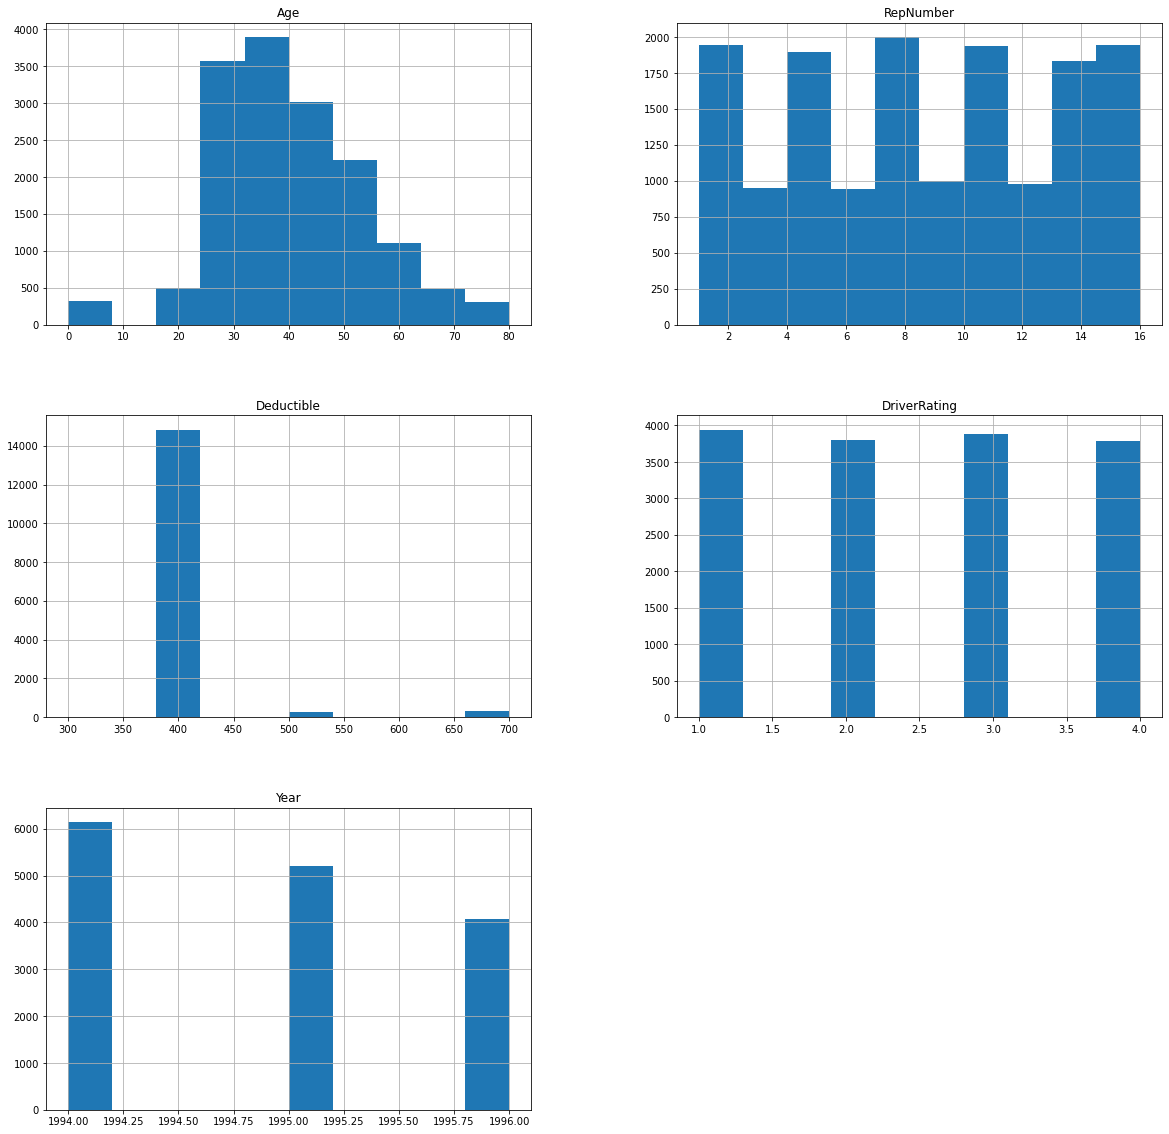

In [43]:
dataset[numericalOrginal].hist(figsize=(20,20))

### A. Scaling

#### Deductible

,count,mean,std,min,25%,50%,75%,max
Deductible,15419.0,407.70478,43.952379,300.0,400.0,400.0,400.0,700.0


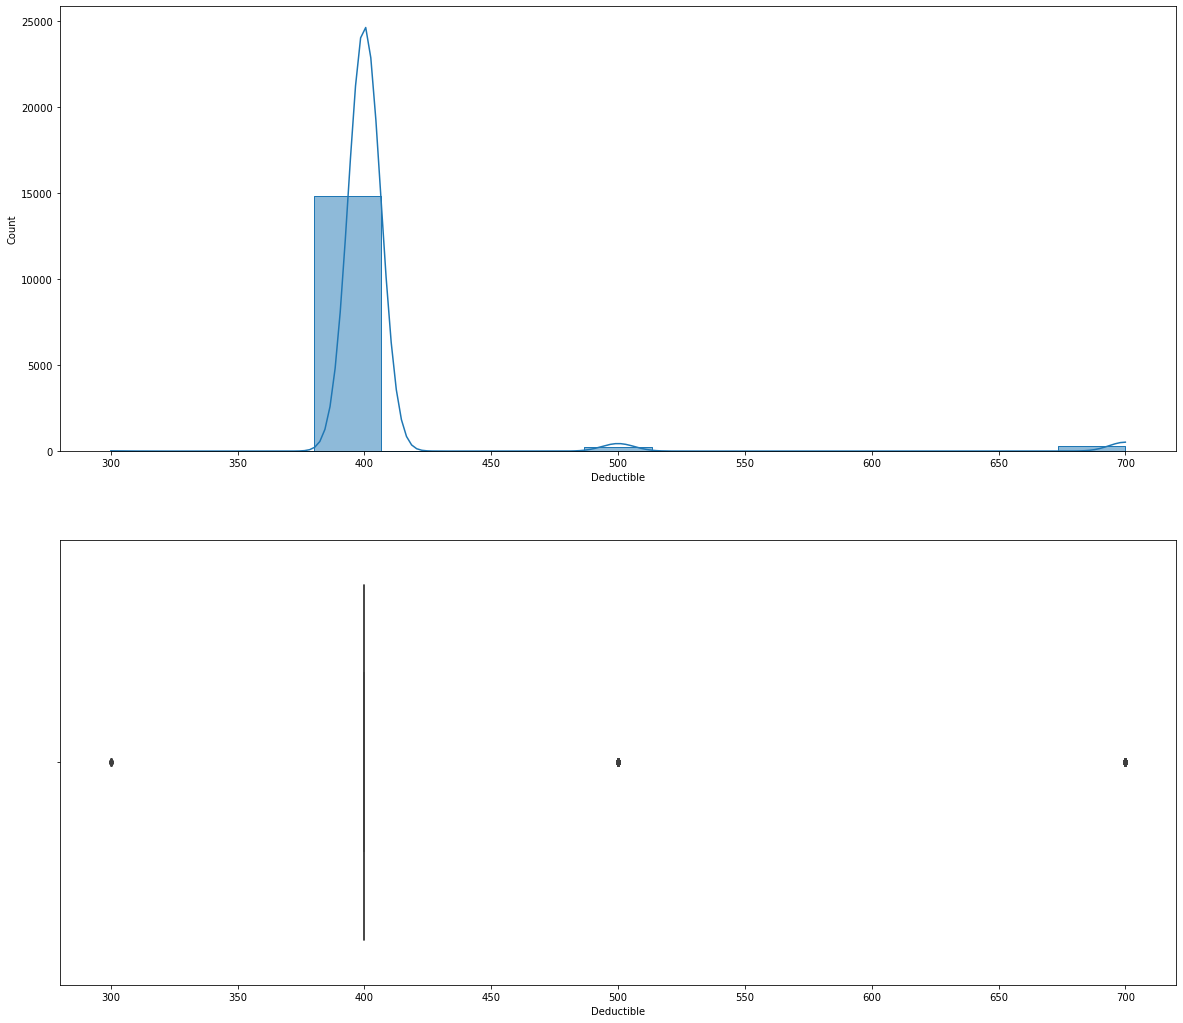

In [44]:
featureAnalysis('Deductible',dataset)

In [45]:
dataset['Deductible'].unique()

array([300, 400, 500, 700], dtype=int64)

In [46]:
dataset['Deductible'] = dataset['Deductible'] / 100

,count,mean,std,min,25%,50%,75%,max
Deductible,15419.0,4.077048,0.439524,3.0,4.0,4.0,4.0,7.0


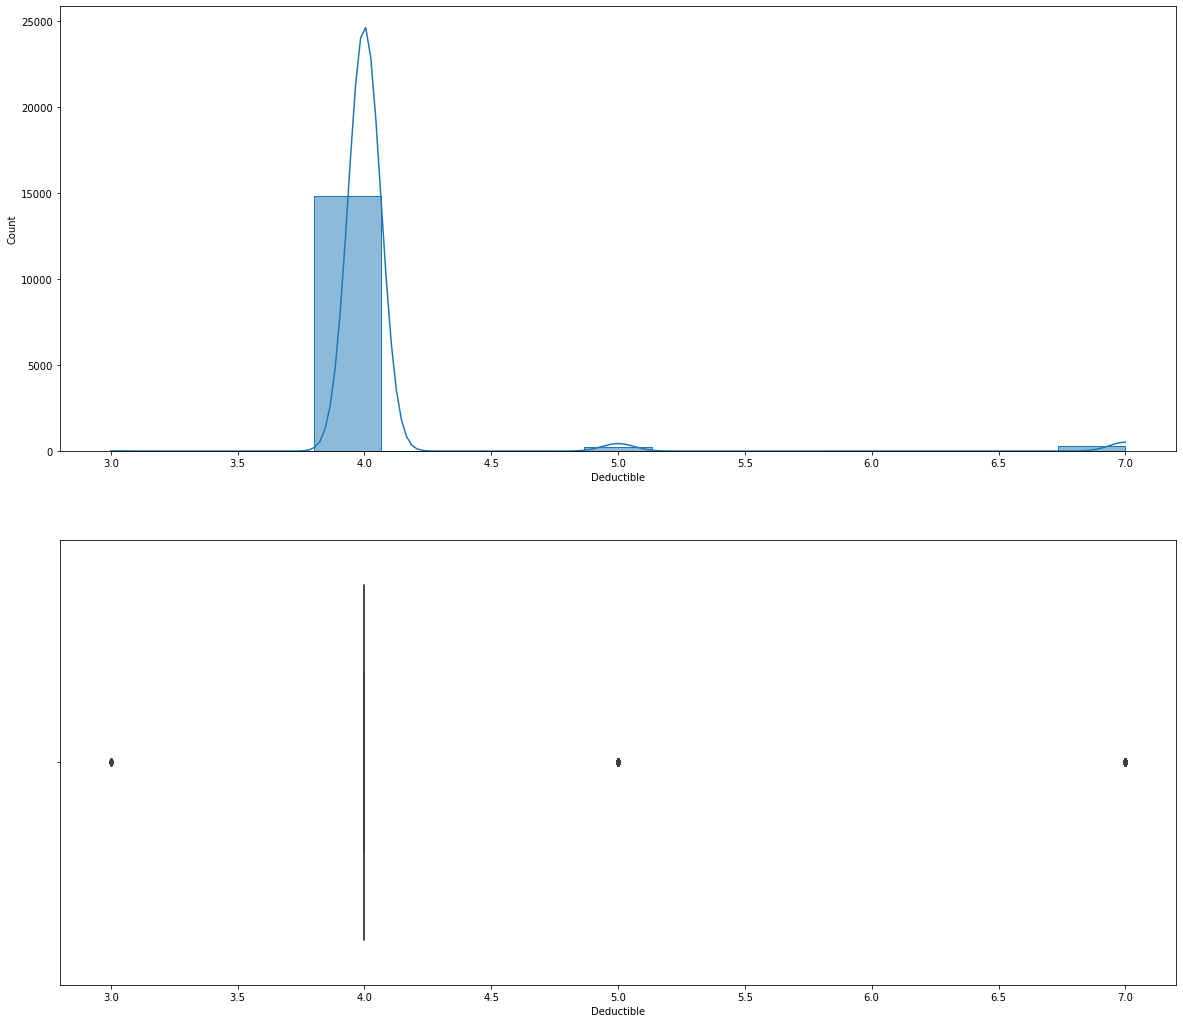

In [47]:
featureAnalysis('Deductible',dataset)

#### Year

,count,mean,std,min,25%,50%,75%,max
Year,15419.0,1994.866528,0.803309,1994.0,1994.0,1995.0,1996.0,1996.0


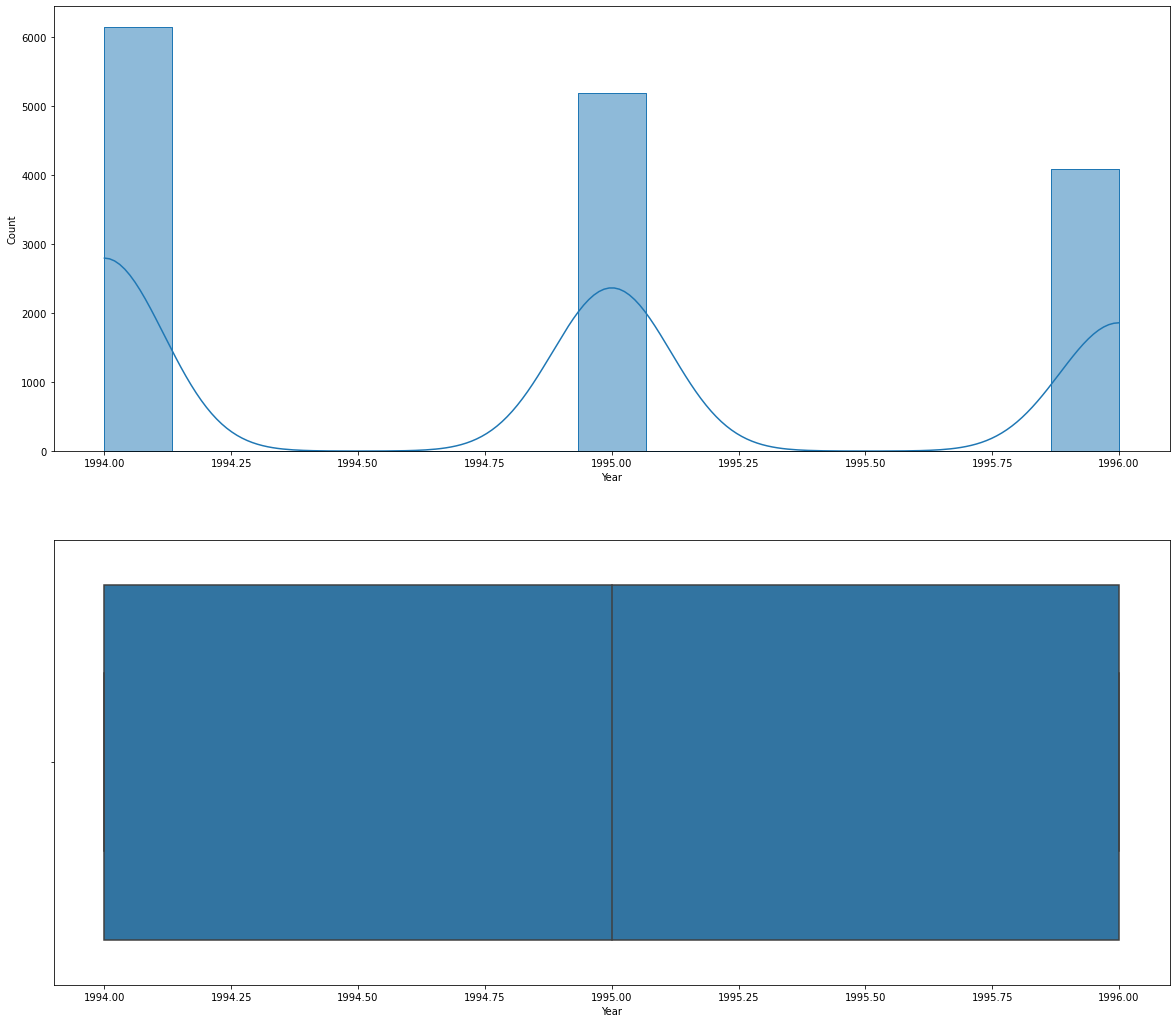

In [48]:
featureAnalysis('Year',dataset)

In [49]:
dataset['Year'].unique()

array([1994, 1995, 1996], dtype=int64)

In [50]:
map_years = {1994:0, 1995:1 ,1996:2}
dataset['Year']=dataset.Year.map(map_years)

,count,mean,std,min,25%,50%,75%,max
Year,15419.0,0.866528,0.803309,0.0,0.0,1.0,2.0,2.0


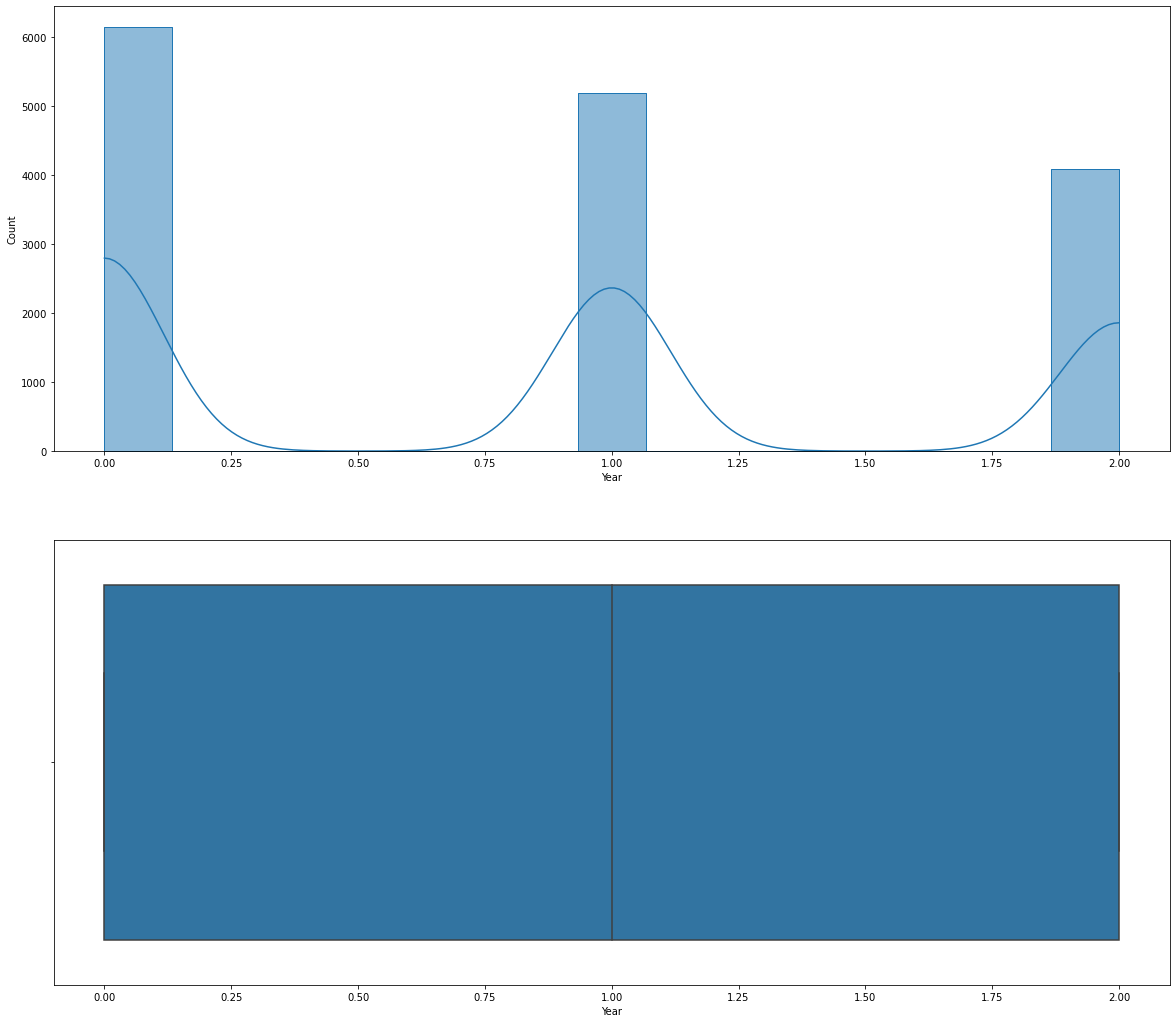

In [51]:
featureAnalysis('Year',dataset)

#### Age

,count,mean,std,min,25%,50%,75%,max
Age,15419.0,39.858292,13.488996,0.0,31.0,38.0,48.0,80.0


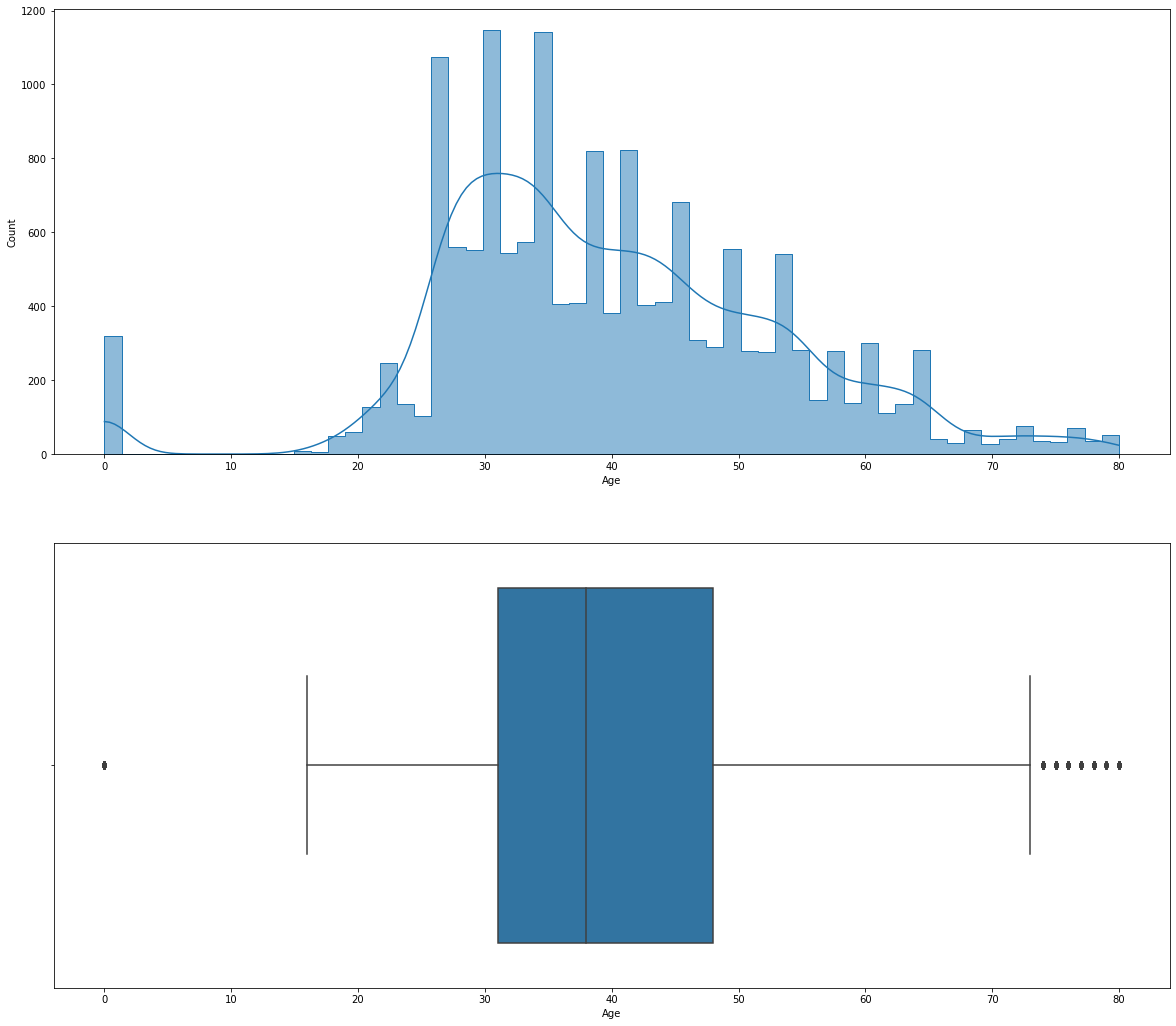

In [52]:
featureAnalysis('Age',dataset)

In [53]:
len(dataset[dataset['Age'] == 0])

319

In [54]:
#detect null values

319 people ages is zero and logically its not possible so they are null values

In [55]:
319/ dataset.shape[0]

0.02068876062001427

0.02 of the whole dataset so Im going to fill them with mean or median

,count,mean,std,min,25%,50%,75%,max
Age,15100.0,40.700331,12.309493,16.0,31.0,39.0,49.0,80.0


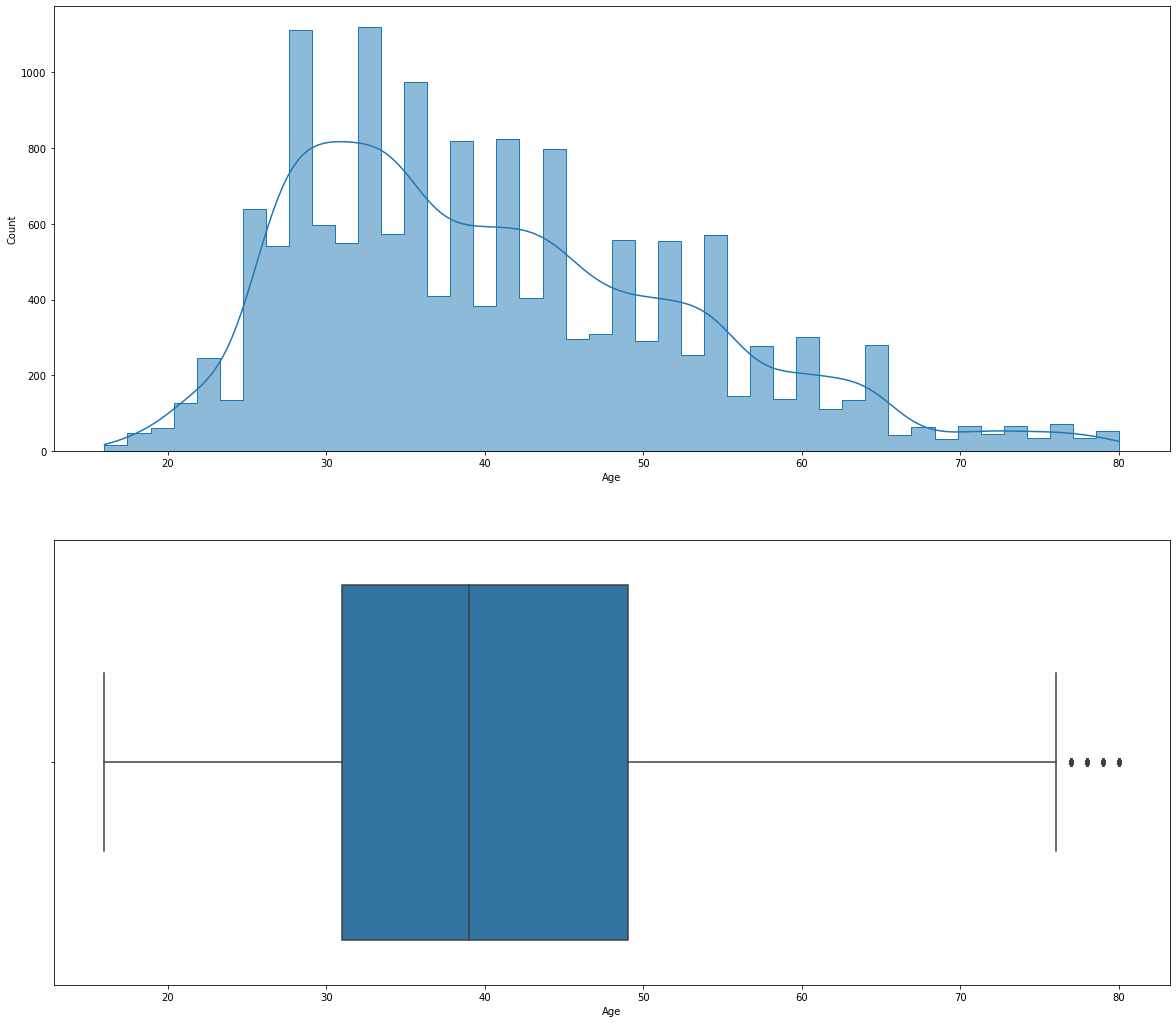

In [56]:
featureAnalysis('Age',dataset[dataset['Age'] != 0])

In [57]:
dataset['Age'].replace(to_replace = 0, value = 40, inplace=True)

In [58]:
len(dataset[dataset['Age'] == 0])

0

,count,mean,std,min,25%,50%,75%,max
Age,15419.0,40.685842,12.181893,16.0,31.0,39.0,48.0,80.0


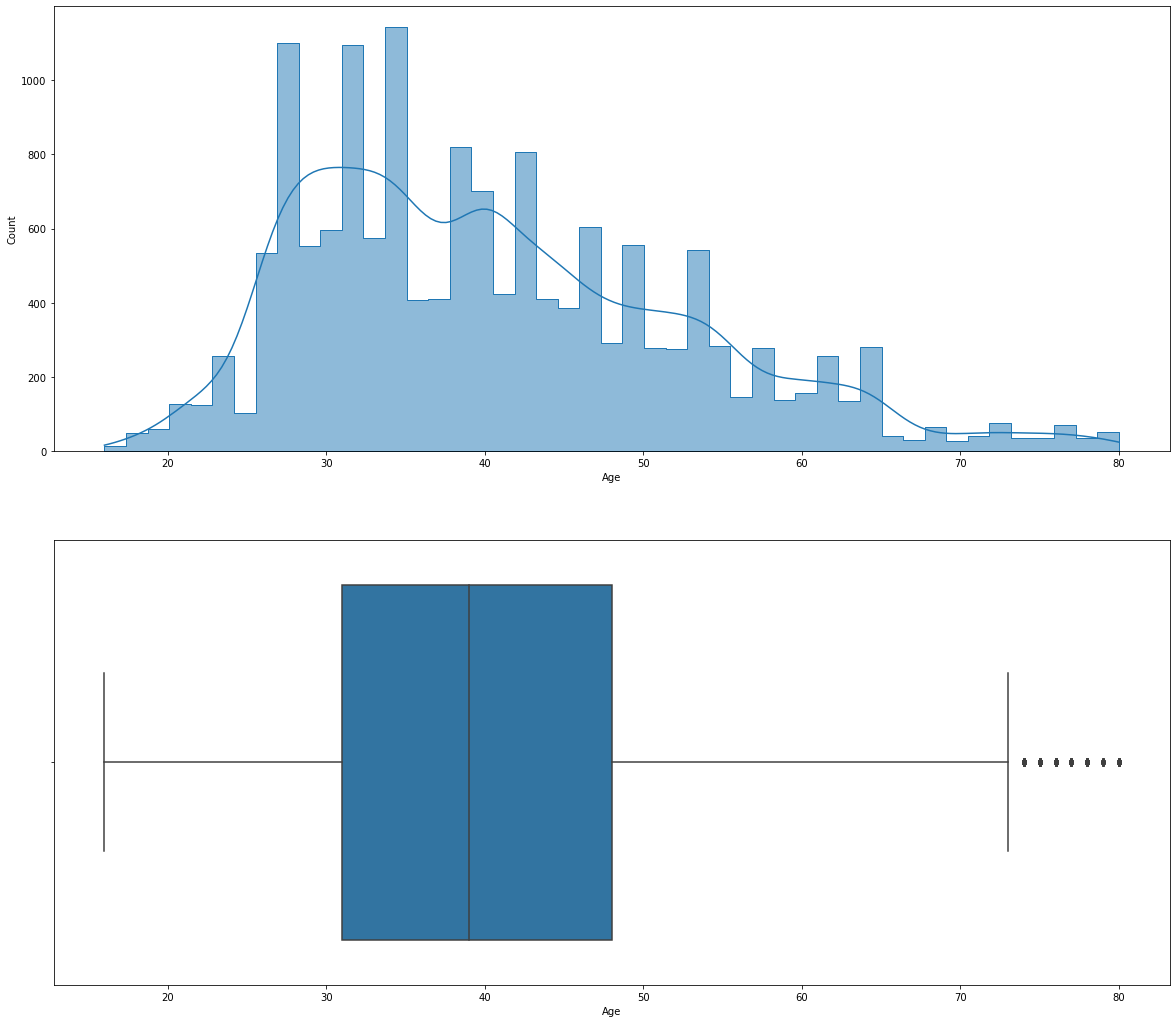

In [59]:
featureAnalysis('Age',dataset)

In [60]:
dataset['Age'] = dataset['Age'] / 10

# 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RepNumber'}>],
       [<AxesSubplot:title={'center':'Deductible'}>,
        <AxesSubplot:title={'center':'DriverRating'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

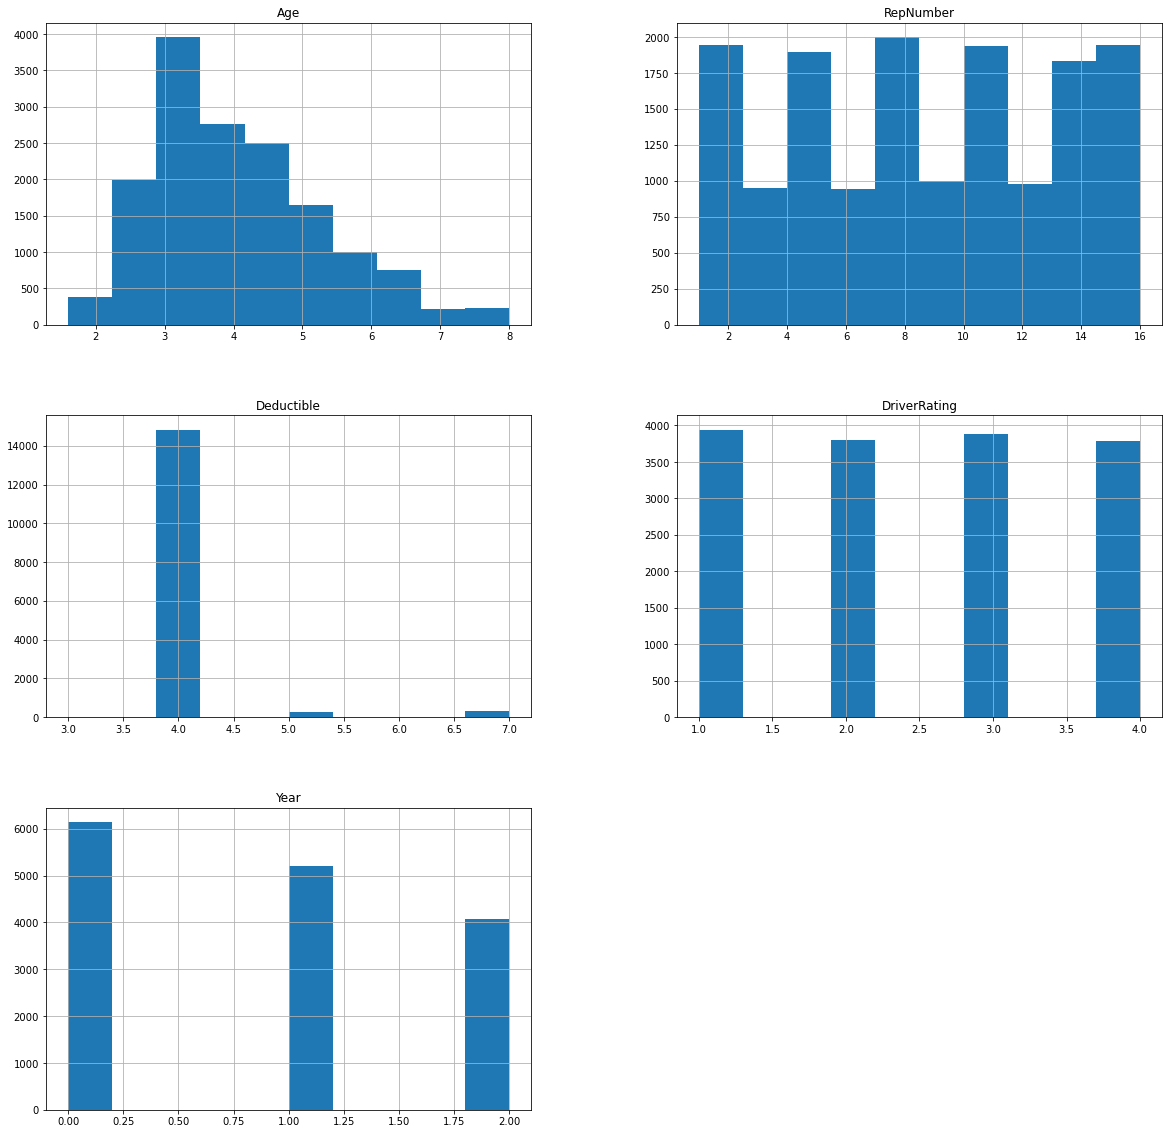

In [61]:
dataset[numericalOrginal].hist(figsize=(20,20))

In [62]:
dataset[numericalOrginal].describe()

,Age,RepNumber,Deductible,DriverRating,Year
count,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000
mean,4.068584,8.482846,4.077048,2.487840,0.866528
std,1.218189,4.599798,0.439524,1.119482,0.803309
min,1.600000,1.000000,3.000000,1.000000,0.000000
25%,3.100000,5.000000,4.000000,1.000000,0.000000
50%,3.900000,8.000000,4.000000,2.000000,1.000000
75%,4.800000,12.000000,4.000000,3.000000,2.000000
max,8.000000,16.000000,7.000000,4.000000,2.000000


# 

### B. Adding new features

In [63]:
numericalAdd = numericalOrginal.copy()

In [64]:
numericalAdd

['Age', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

In [65]:
#A ratio of age and number of accidents
dataset['ratio'] = dataset['RepNumber'] / dataset['Age']

,count,mean,std,min,25%,50%,75%,max
ratio,15419.0,2.273016,1.447594,0.125,1.111111,2.058824,3.2,9.375


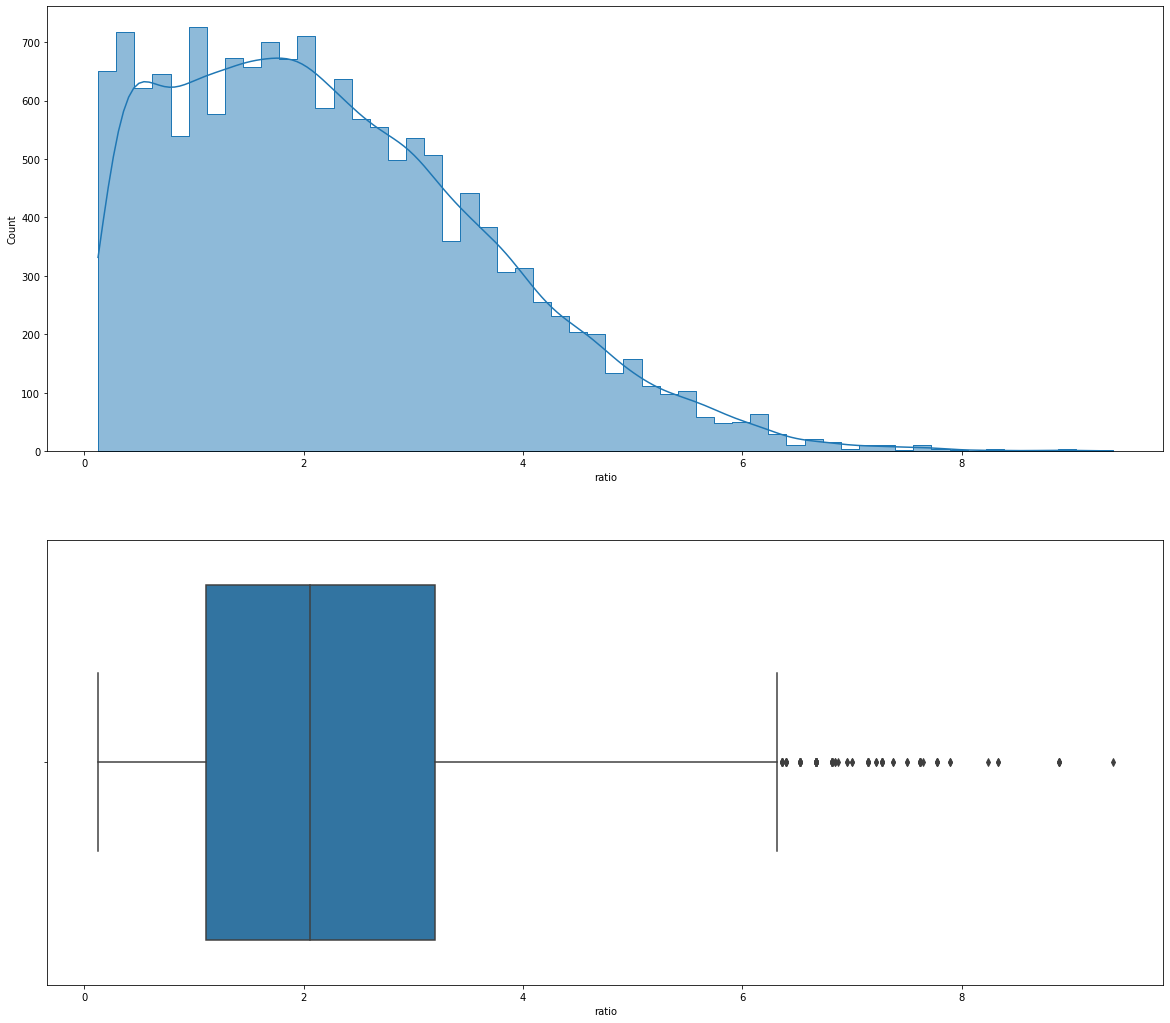

In [66]:
featureAnalysis('ratio',dataset)

In [67]:
numericalAdd.append('ratio')

In [68]:
dataset['DriverRating'].unique()

array([1, 4, 3, 2], dtype=int64)

In [69]:
# A ratio of DriverRating and the Age of client
dataset['ratioRating'] = dataset['DriverRating'] / dataset['Age']

,count,mean,std,min,25%,50%,75%,max
ratioRating,15419.0,0.665933,0.367062,0.125,0.357143,0.625,0.909091,2.352941


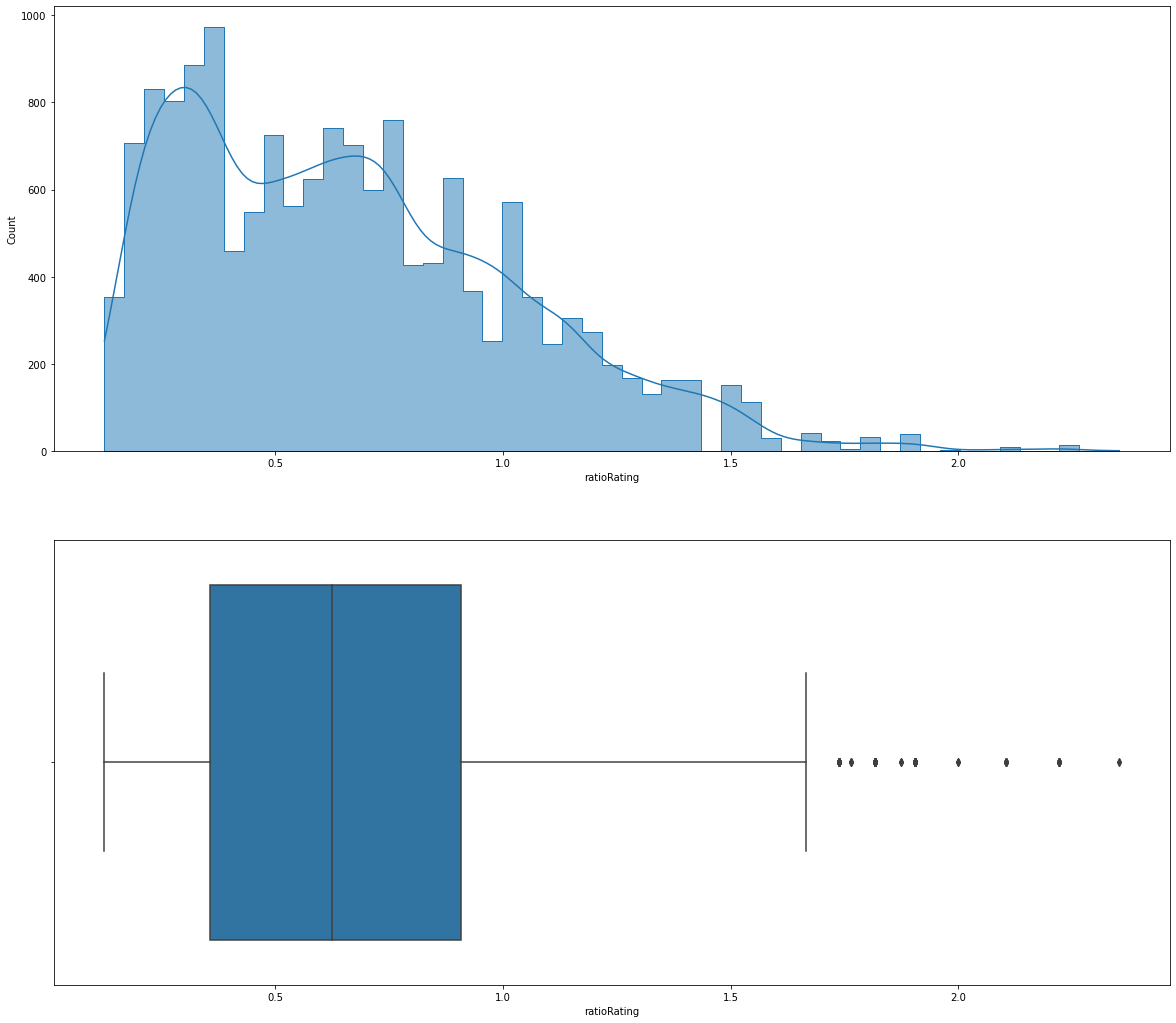

In [70]:
featureAnalysis('ratioRating',dataset)

In [71]:
numericalAdd.append('ratioRating')

In [72]:
numericalAdd

['Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year',
 'ratio',
 'ratioRating']

In [73]:
XNum = dataset[numericalAdd]
Y = dataset[target]
numericalData = pd.concat([XNum, Y], axis=1)

In [74]:
modelAddNumerical = Models_Startified(numericalData,'FraudFound_P',3)


DecisionTree.........................................

List of possible accuracy: dict_values([0.9077821011673152, 0.9153696498054474, 0.9112667834208991])

Maximum Accuracy That can be obtained from this model is: 91.53696498054474 %

Minimum Accuracy: 90.77821011673151 %

Overall Accuracy: 91.14728447978872 %

Standard Deviation is: 0.003797969135251155

List of possible F1-score: dict_values([0.07421875, 0.05228758169934641, 0.04602510460251046])

Maximum F1-score That can be obtained from this model is: 7.421875 %

Minimum F1-score: 4.602510460251046 %

Overall F1-score: 5.751047876728562 %

Standard Deviation is: 0.014804708728528291



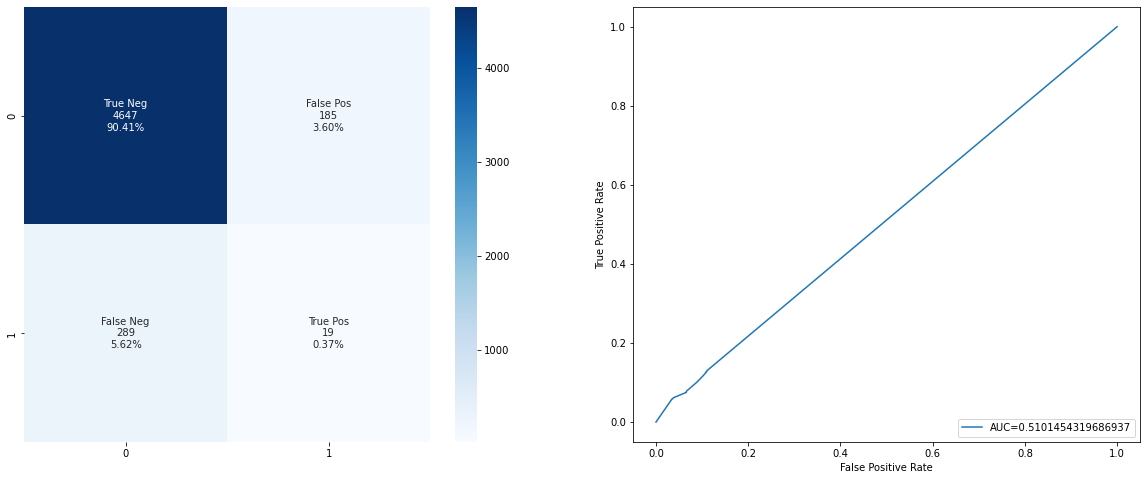

              precision    recall  f1-score   support

         Yes       0.94      0.96      0.95      4832
          No       0.09      0.06      0.07       308

    accuracy                           0.91      5140
   macro avg       0.52      0.51      0.51      5140
weighted avg       0.89      0.91      0.90      5140


Feature Importance...................................

7
Index(['Deductible', 'DriverRating', 'RepNumber', 'Age', 'ratioRating', 'Year',
       'ratio'],
      dtype='object')


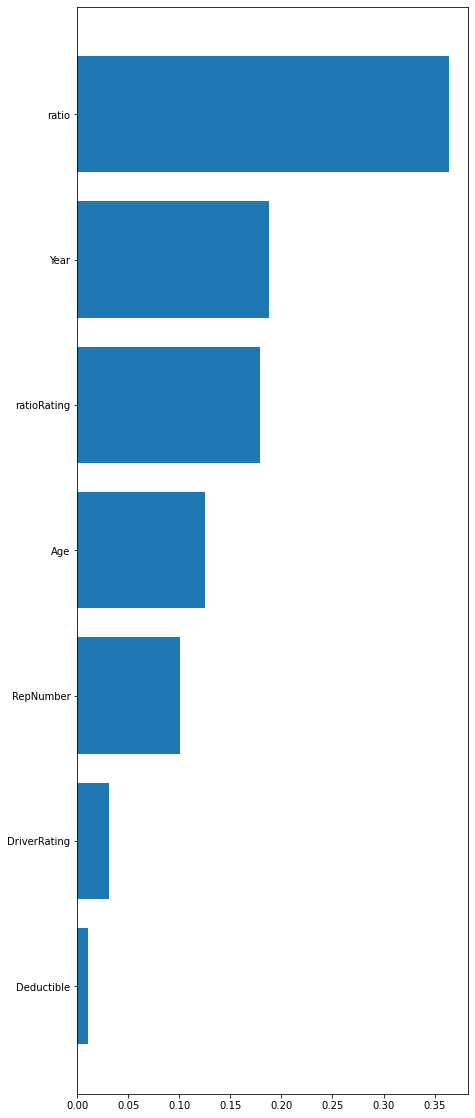

In [75]:
modelAddNumerical.DT(True)

# 

### **Let's check frauds**

In [76]:
def compare(feature,dataset):
    num_1 = len(dataset[dataset[target]==1])
    num_0 = len(dataset[dataset[target]==0])
    undersampled_dataset = pd.concat([dataset[dataset[target]==0].sample(num_1) ,dataset[dataset[target]==1] ])

    fraud = undersampled_dataset[undersampled_dataset['FraudFound_P'] == 1]
    NotFraud = undersampled_dataset[undersampled_dataset['FraudFound_P'] == 0]
    
    print("\n")
    print("\n")
    fig, ax = plt.subplots(2, 1, figsize=(20, 12))
    pyplot.hist(fraud[feature], alpha=0.5, label='Fraud')
    pyplot.hist(NotFraud[feature], alpha=0.5, label='Not')
    pyplot.legend(loc='upper right')
    sns.boxplot(x=target, y=feature, data=dataset,ax=ax[0]).set_title(str(feature),fontsize = 20)
    pyplot.show()
    print("\n")
    print("\n")


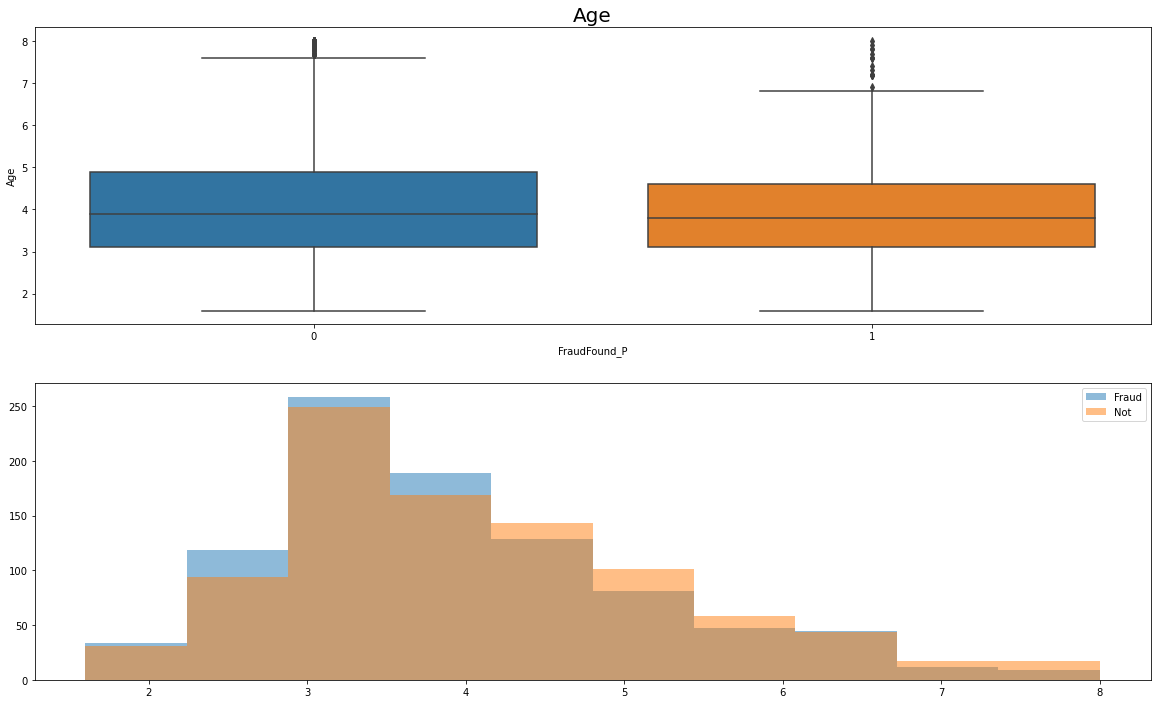

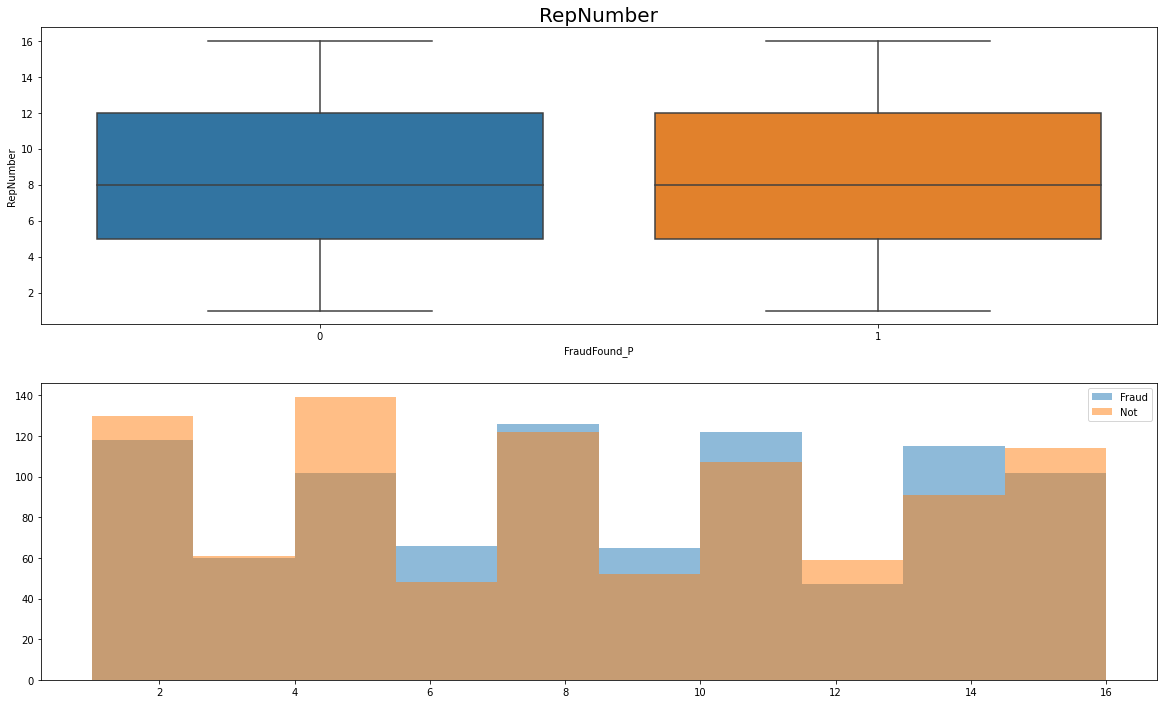

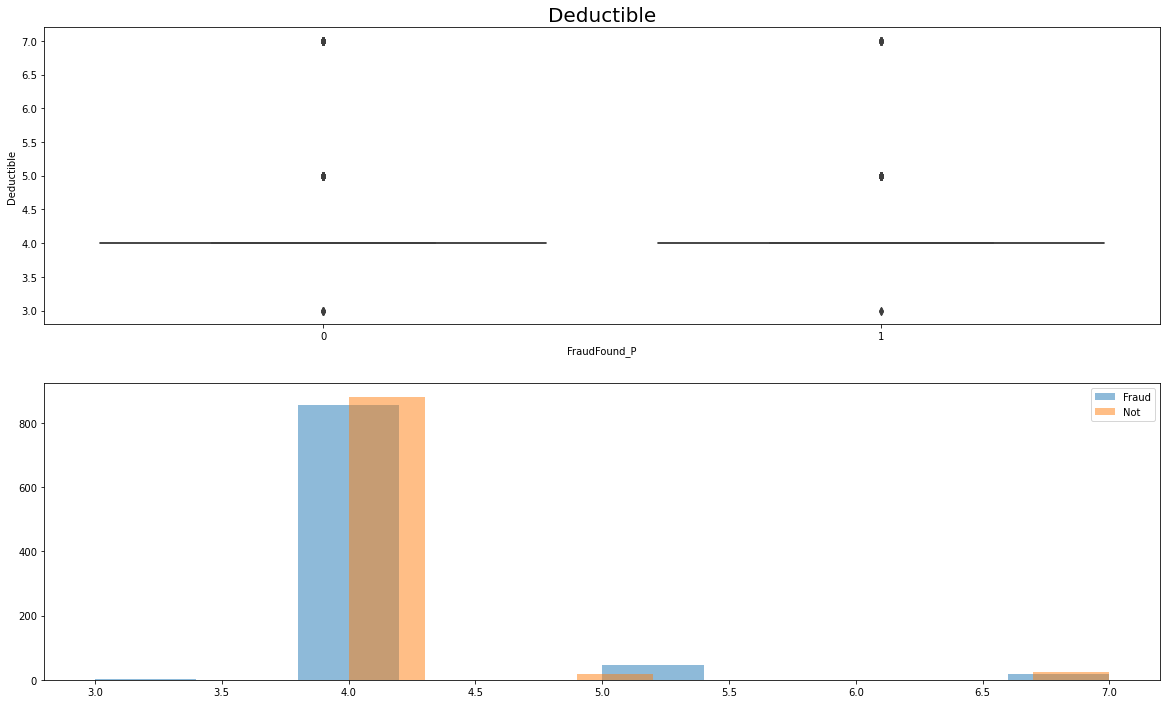

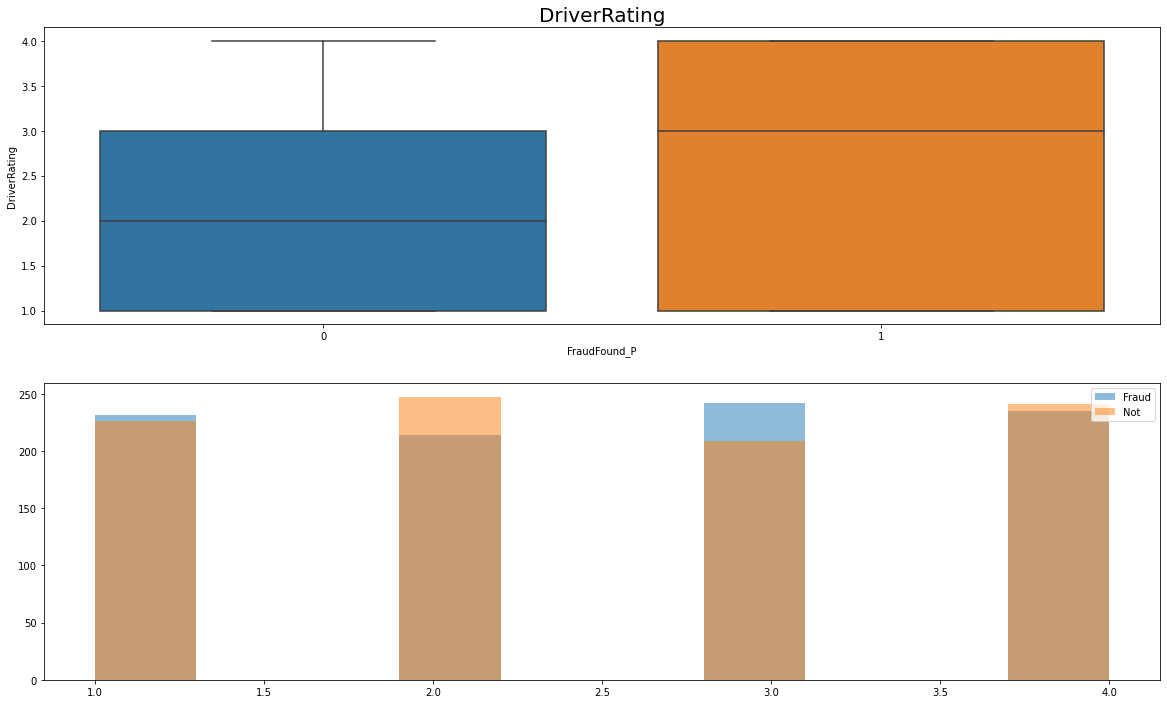

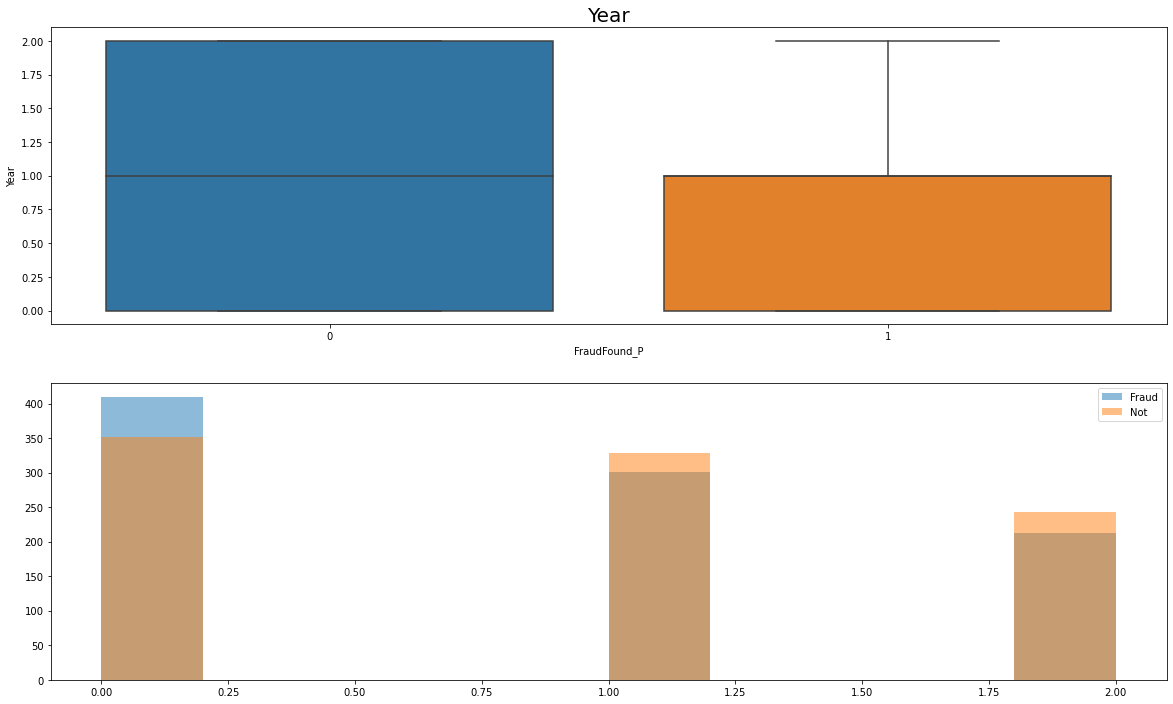

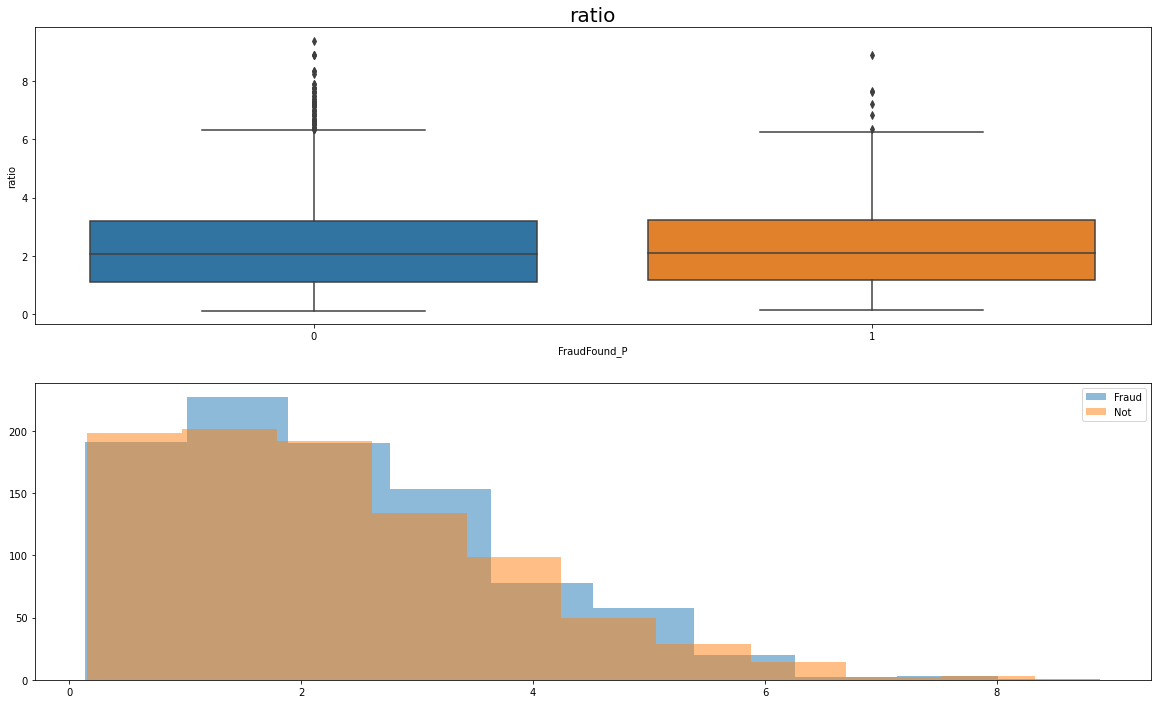

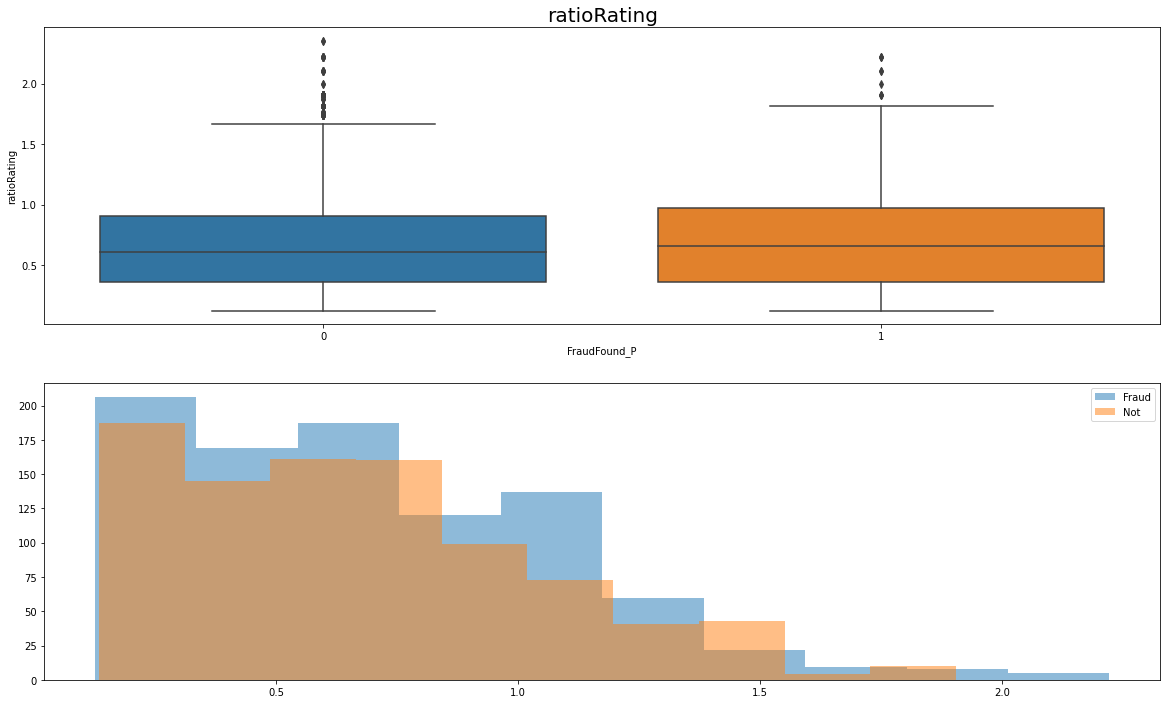

In [77]:
for feature in numericalAdd:
    compare(feature,dataset)

In [78]:
numericalData.describe()

,Age,RepNumber,Deductible,DriverRating,Year,ratio,ratioRating,FraudFound_P
count,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000
mean,4.068584,8.482846,4.077048,2.487840,0.866528,2.273016,0.665933,0.059861
std,1.218189,4.599798,0.439524,1.119482,0.803309,1.447594,0.367062,0.237237
min,1.600000,1.000000,3.000000,1.000000,0.000000,0.125000,0.125000,0.000000
25%,3.100000,5.000000,4.000000,1.000000,0.000000,1.111111,0.357143,0.000000
50%,3.900000,8.000000,4.000000,2.000000,1.000000,2.058824,0.625000,0.000000
75%,4.800000,12.000000,4.000000,3.000000,2.000000,3.200000,0.909091,0.000000
max,8.000000,16.000000,7.000000,4.000000,2.000000,9.375000,2.352941,1.000000


<a name="1.5.2"></a>
### 2.Ordinals

In [79]:
dataset_ordinal = dataset.copy()

In [80]:
ordinal

['Month',
 'DayOfWeek',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars']

### Adding Feature

In [81]:
XOrdinal= dataset[ordinal]
Y = dataset[target]
ordinalData = pd.concat([XOrdinal, Y], axis=1)


DecisionTree.........................................

List of possible accuracy: dict_values([0.8803501945525292, 0.8712062256809339, 0.8700136213271065])

Maximum Accuracy That can be obtained from this model is: 88.03501945525292 %

Minimum Accuracy: 87.00136213271065 %

Overall Accuracy: 87.38566805201899 %

Standard Deviation is: 0.005655074681410748

List of possible F1-score: dict_values([0.08345752608047691, 0.0881542699724518, 0.08493150684931508])

Maximum F1-score That can be obtained from this model is: 8.81542699724518 %

Minimum F1-score: 8.345752608047691 %

Overall F1-score: 8.551443430074793 %

Standard Deviation is: 0.0024020208381540626



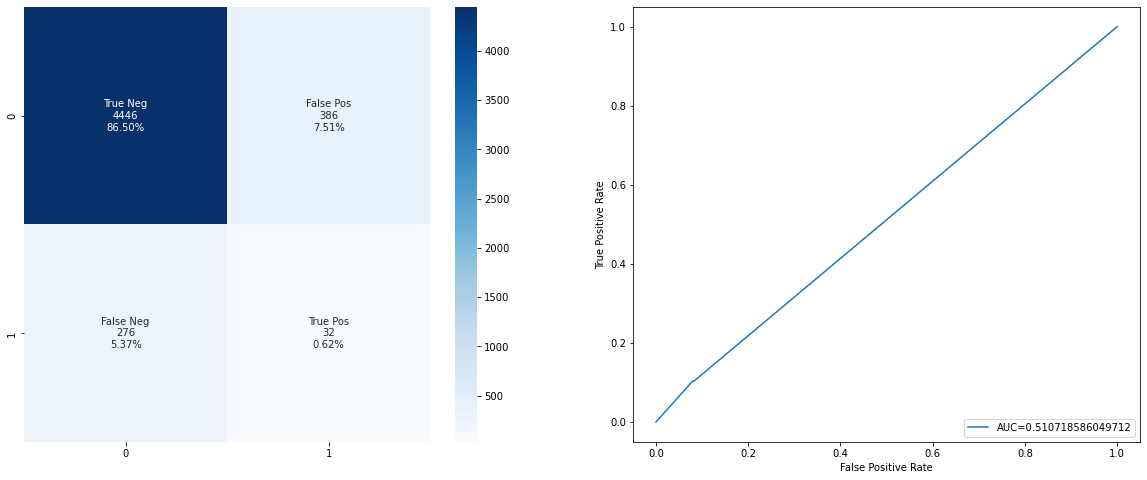

              precision    recall  f1-score   support

         Yes       0.94      0.92      0.93      4832
          No       0.08      0.10      0.09       308

    accuracy                           0.87      5140
   macro avg       0.51      0.51      0.51      5140
weighted avg       0.89      0.87      0.88      5140


Feature Importance...................................

13
Index(['Days_Policy_Claim', 'NumberOfCars', 'Days_Policy_Accident',
       'AddressChange_Claim', 'PastNumberOfClaims', 'VehiclePrice',
       'AgeOfVehicle', 'Month', 'NumberOfSuppliments', 'AgeOfPolicyHolder',
       'DayOfWeekClaimed', 'MonthClaimed', 'DayOfWeek'],
      dtype='object')


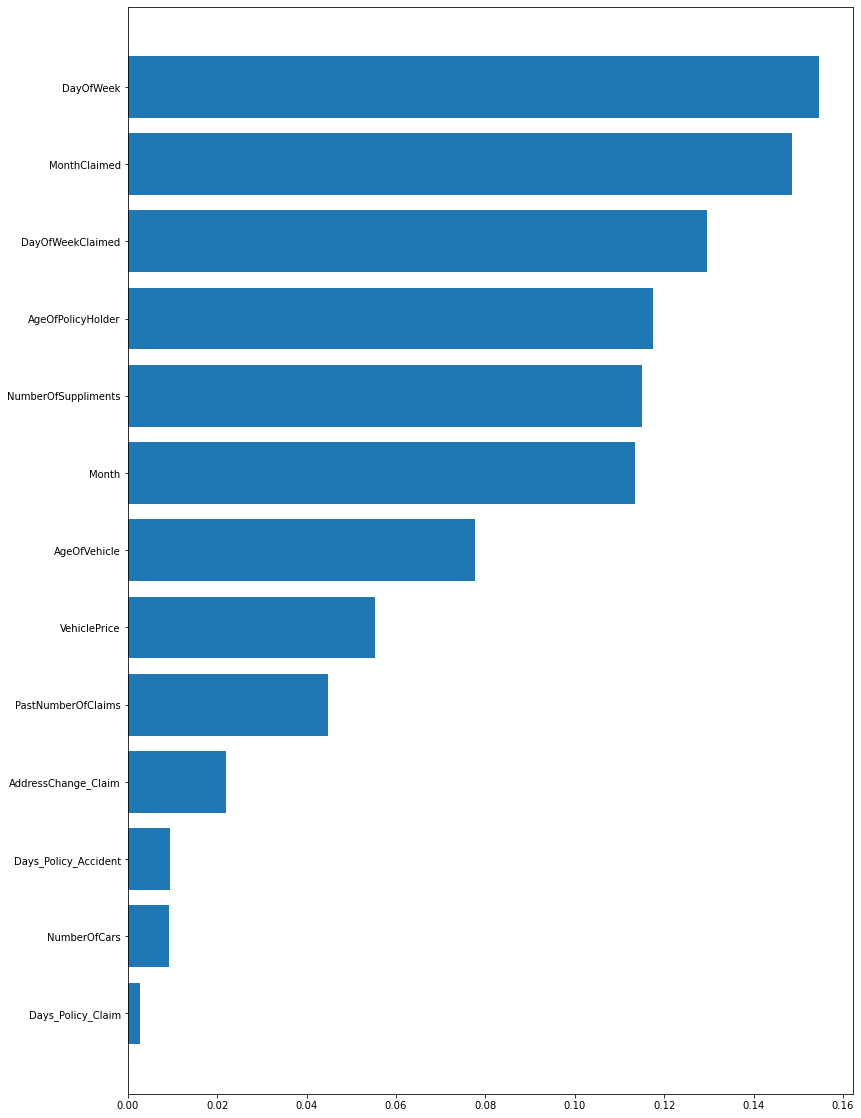

In [82]:
modelordinalData= Models_Startified(ordinalData,'FraudFound_P',3)
modelordinalData.DT(True)

In [83]:
ordinalAdd = ordinal

#### 1.RatioRepNumber

In [84]:
dataset['AgeOfPolicyHolder'].unique()

array([ 5,  6, 10, 15,  4,  7,  1, 20,  2], dtype=int64)

In [85]:
dataset['RepNumber'].unique()

array([12, 15,  7,  4,  3, 14,  1, 13, 11, 16,  6,  2,  8,  5,  9, 10],
      dtype=int64)

In [86]:
dataset['ratioRepNumber'] = dataset['RepNumber'] / dataset['AgeOfPolicyHolder']

In [87]:
ordinalAdd.append('ratioRepNumber')

#### 2.VehiclePrice per Brand

In [88]:
make = ['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge',
       'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus',
       'Make_Mazda', 'Make_Mecedes', 'Make_Mercury', 'Make_Nisson',
       'Make_Pontiac', 'Make_Porche', 'Make_Saab', 'Make_Saturn',
       'Make_Toyota', 'Make_VW']

In [89]:
meanBrand =  {}
medianBrand = {}

Make_Accura mean :  3.8728813559322033 median : 3.0


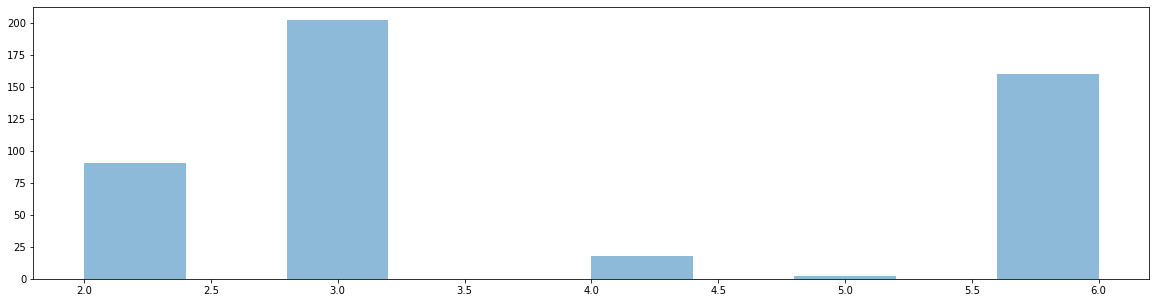

Make_BMW mean :  2.7333333333333334 median : 2.0


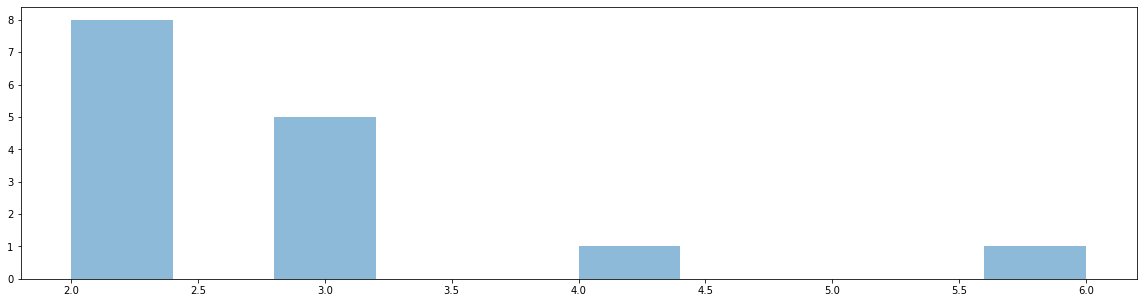

Make_Chevrolet mean :  3.3016061867935753 median : 3.0


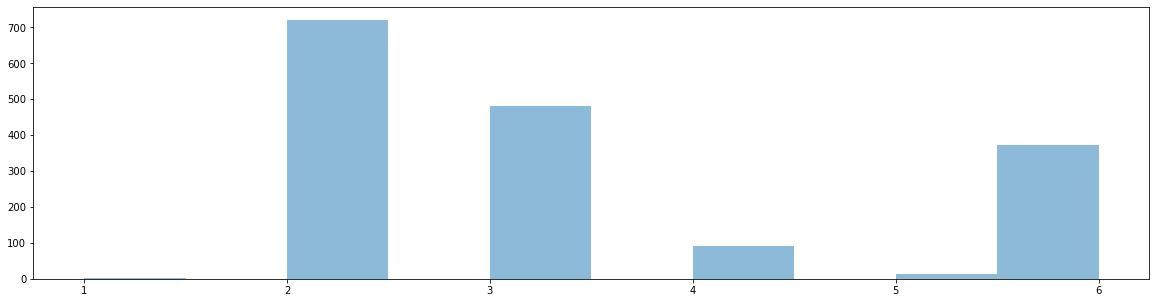

Make_Dodge mean :  2.8990825688073394 median : 3.0


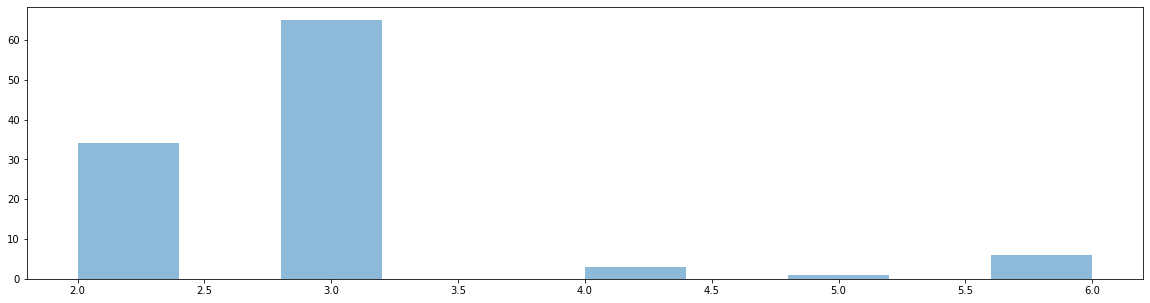

Make_Ferrari mean :  4.0 median : 4.0


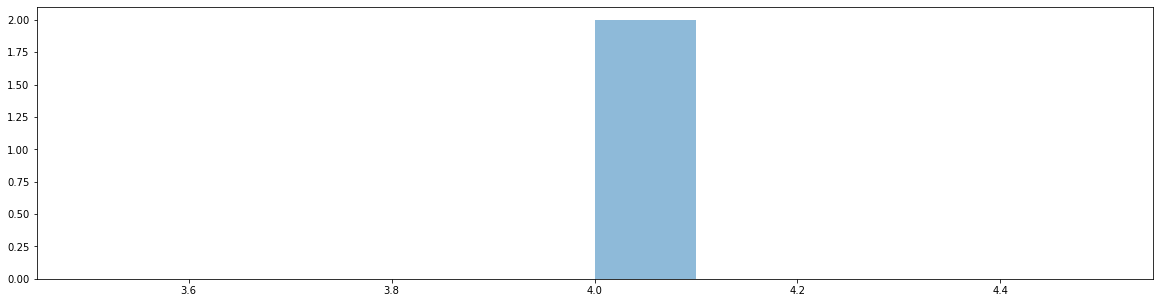

Make_Ford mean :  3.6844444444444444 median : 4.0


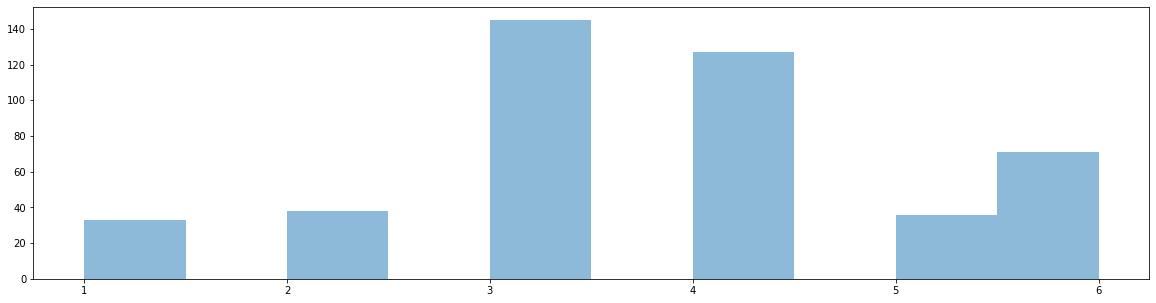

Make_Honda mean :  3.1560714285714284 median : 2.0


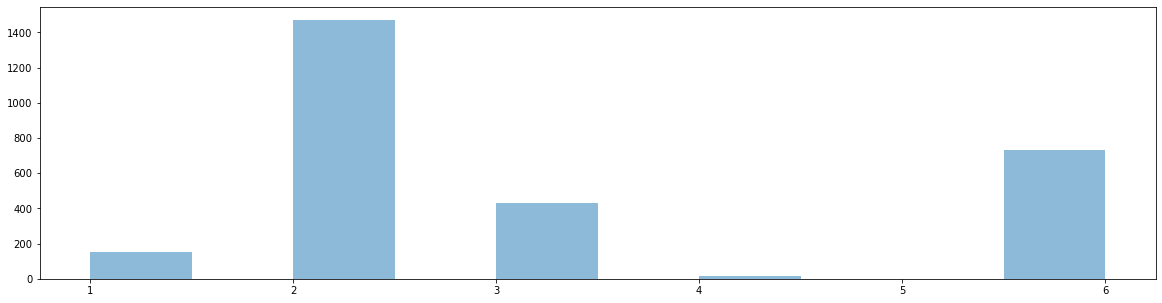

Make_Jaguar mean :  3.5 median : 3.5


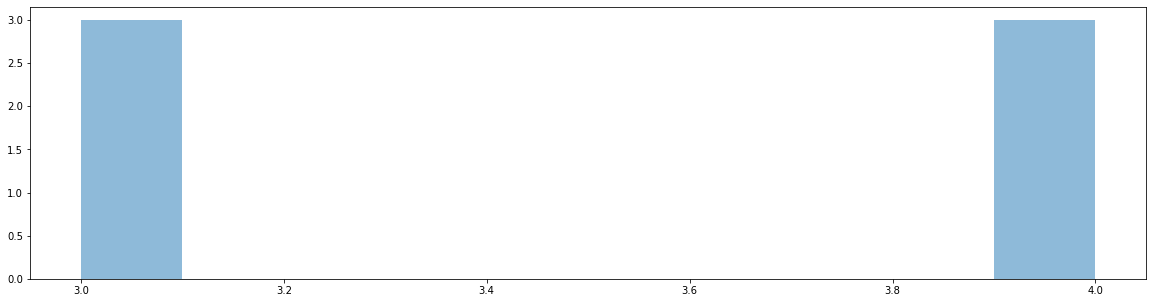

Make_Lexus mean :  6.0 median : 6.0


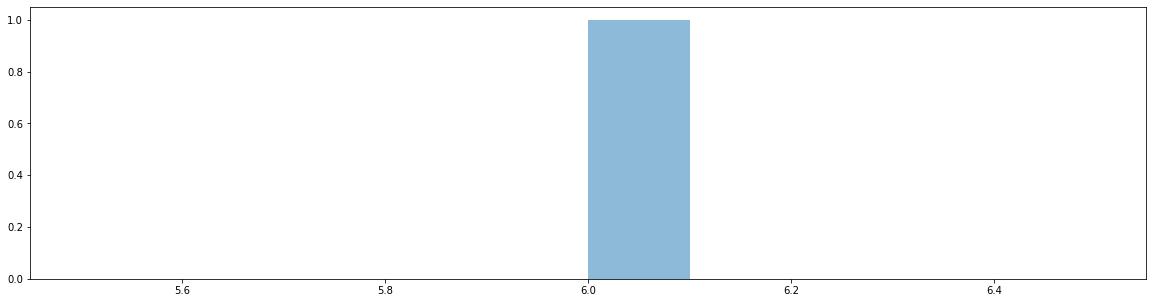

Make_Mazda mean :  2.7187765505522514 median : 2.0


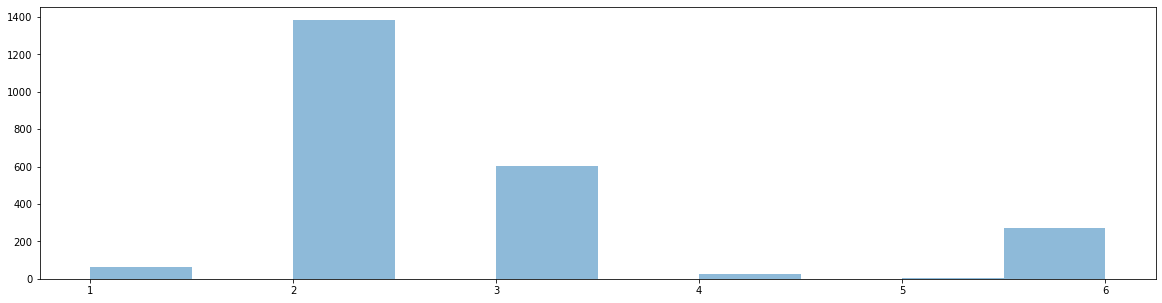

Make_Mecedes mean :  4.5 median : 4.5


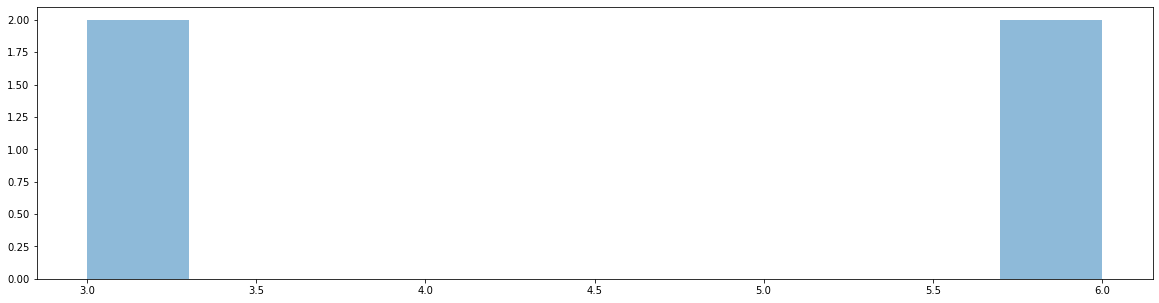

Make_Mercury mean :  3.1204819277108435 median : 2.0


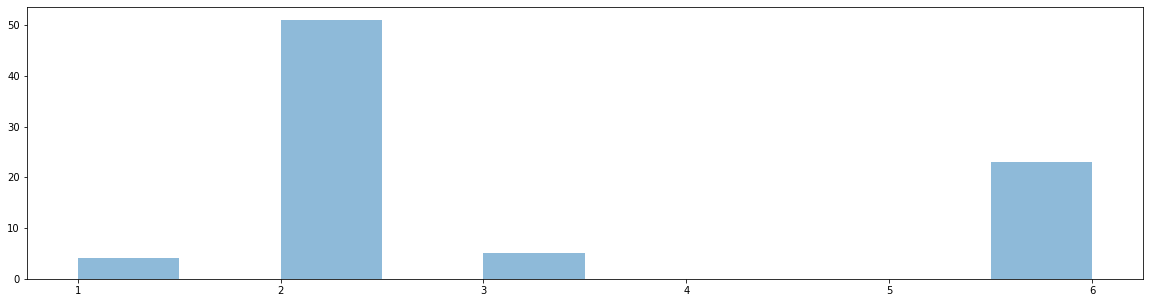

Make_Nisson mean :  4.333333333333333 median : 3.0


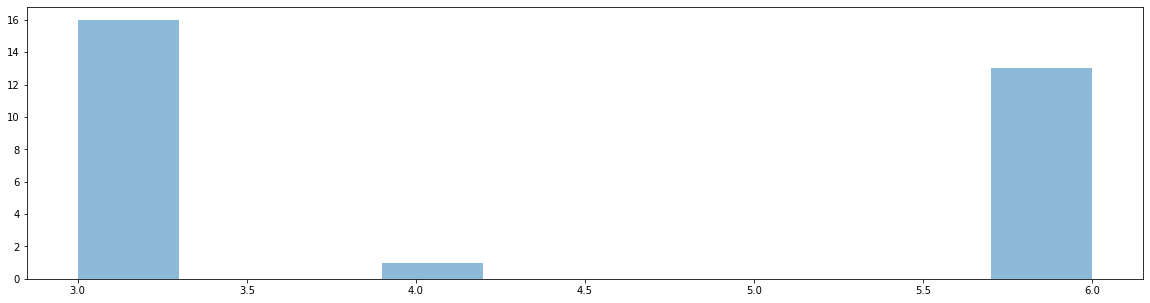

Make_Pontiac mean :  2.3471462079749803 median : 2.0


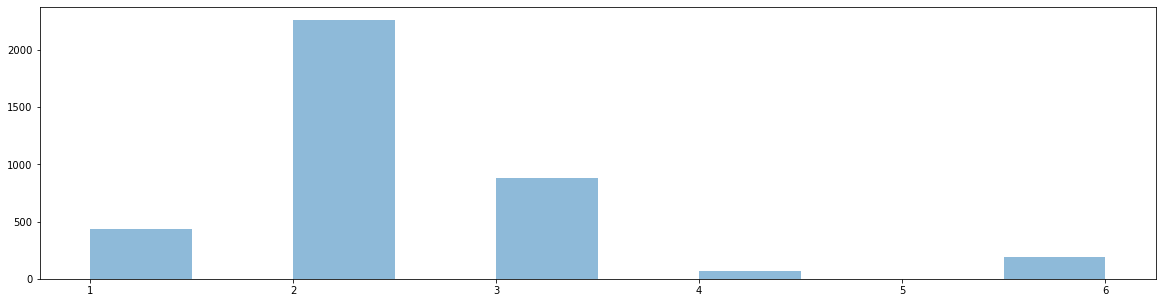

Make_Porche mean :  5.2 median : 6.0


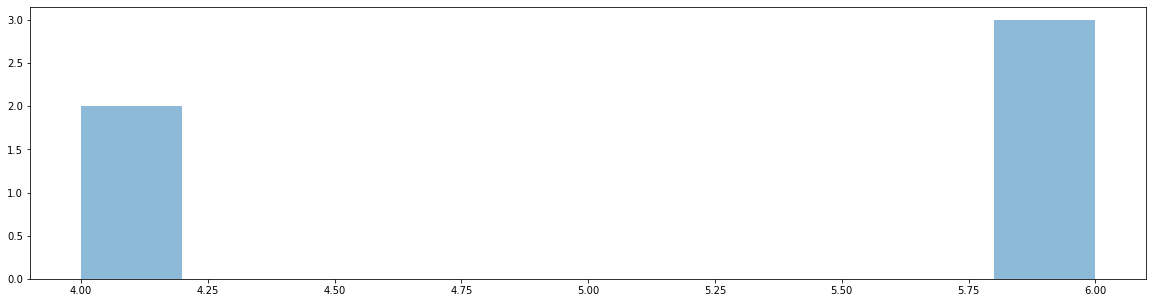

Make_Saab mean :  3.1666666666666665 median : 3.0


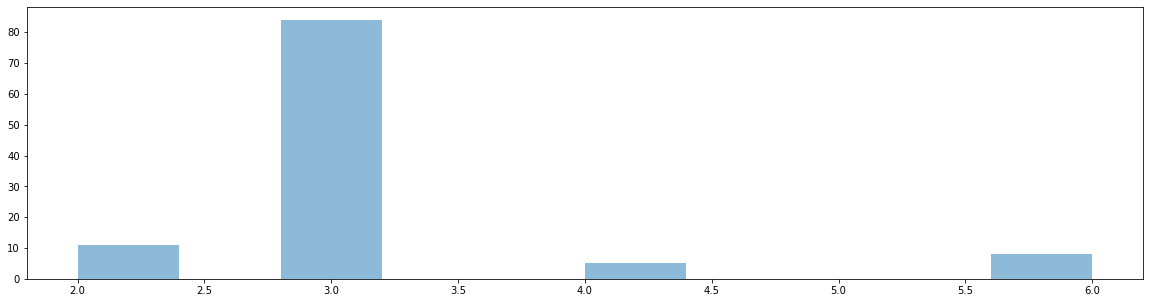

Make_Saturn mean :  3.086206896551724 median : 3.0


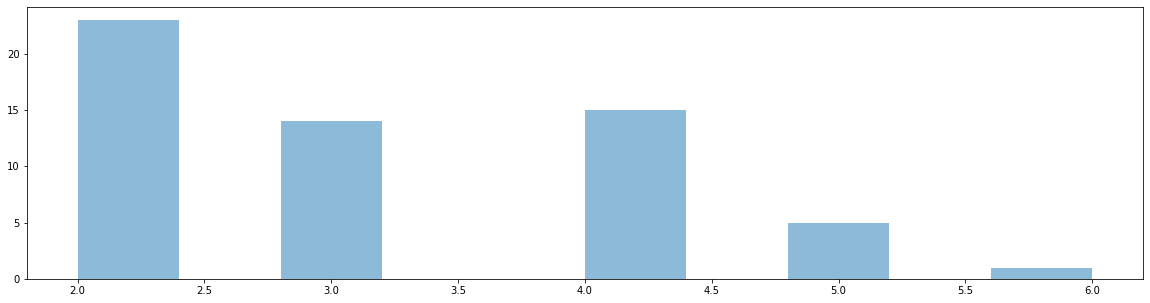

Make_Toyota mean :  2.3197693047100287 median : 2.0


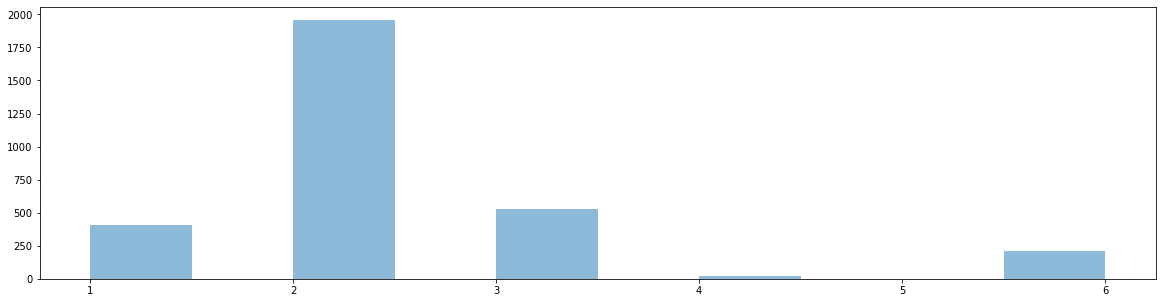

Make_VW mean :  4.3992932862190814 median : 4.0


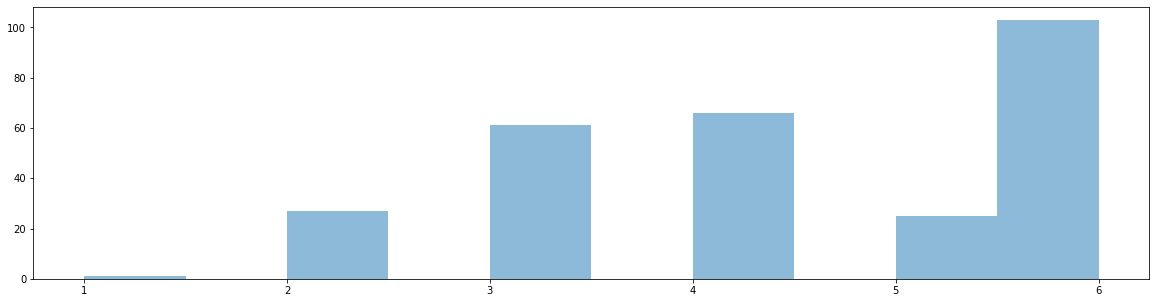

In [90]:
for i in range(19):
    data_brand = dataset[dataset[make[i]]==1]
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))
    print(str(make[i]) + " mean :  " +  str(np.mean(data_brand['VehiclePrice'])) + " median : " 
          +str(np.median(data_brand['VehiclePrice'])))
    
    meanBrand[make[i]] = np.mean(data_brand['VehiclePrice'])
    medianBrand[make[i]] =  np.median(data_brand['VehiclePrice'])

    pyplot.hist( data_brand['VehiclePrice'], alpha=0.5, label='Fraud')
    pyplot.show()


In [91]:
map_median = {}
map_mean = {}
for brand in make:
    brand_org = brand[5:]
    map_median[brand_org] = medianBrand[brand]
    map_mean[brand_org] = meanBrand[brand]

In [92]:
map_median

{'Accura': 3.0,
 'BMW': 2.0,
 'Chevrolet': 3.0,
 'Dodge': 3.0,
 'Ferrari': 4.0,
 'Ford': 4.0,
 'Honda': 2.0,
 'Jaguar': 3.5,
 'Lexus': 6.0,
 'Mazda': 2.0,
 'Mecedes': 4.5,
 'Mercury': 2.0,
 'Nisson': 3.0,
 'Pontiac': 2.0,
 'Porche': 6.0,
 'Saab': 3.0,
 'Saturn': 3.0,
 'Toyota': 2.0,
 'VW': 4.0}

In [93]:
dataset['median_brand']=orginal.Make.map(map_median)
dataset['mean_brand']=orginal.Make.map(map_mean)

In [94]:
ordinalAdd.append('median_brand')
ordinalAdd.append('mean_brand')

#### 3.Wealth

In [95]:
dataset['AgeOfVehicle'].unique()

array([3, 6, 7, 9, 5, 1, 4, 2], dtype=int64)

In [96]:
dataset['NumberOfCars'].unique()

array([ 3.5,  1. ,  2. ,  6.5, 10. ])

In [97]:
dataset['wealth1'] = dataset['NumberOfCars'] * (dataset['VehiclePrice']/dataset['AgeOfVehicle'])

In [98]:
ordinalAdd.append('wealth1')

In [99]:
dataset['wealth2'] = dataset['NumberOfCars'] * dataset['VehiclePrice']

In [100]:
ordinalAdd.append('wealth2')

#### 4.RatioPolicy

In [101]:
dataset['ratioPolicy'] = dataset['AgeOfVehicle'] / dataset['AgeOfPolicyHolder']

In [102]:
ordinalAdd.append('ratioPolicy')

In [103]:
len(ordinalAdd)

19

In [104]:
ordinalAdd

['Month',
 'DayOfWeek',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'ratioRepNumber',
 'median_brand',
 'mean_brand',
 'wealth1',
 'wealth2',
 'ratioPolicy']

In [105]:
ordinalAdd.append(target)

In [106]:
ordinalDataAdd = dataset[ordinalAdd]


DecisionTree.........................................

List of possible accuracy: dict_values([0.8797665369649805, 0.867704280155642, 0.8744892002335085])

Maximum Accuracy That can be obtained from this model is: 87.97665369649805 %

Minimum Accuracy: 86.7704280155642 %

Overall Accuracy: 87.3986672451377 %

Standard Deviation is: 0.006046809940991085

List of possible F1-score: dict_values([0.1146131805157593, 0.06593406593406594, 0.06926406926406926])

Maximum F1-score That can be obtained from this model is: 11.46131805157593 %

Minimum F1-score: 6.593406593406594 %

Overall F1-score: 8.327043857129816 %

Standard Deviation is: 0.027194628789381753



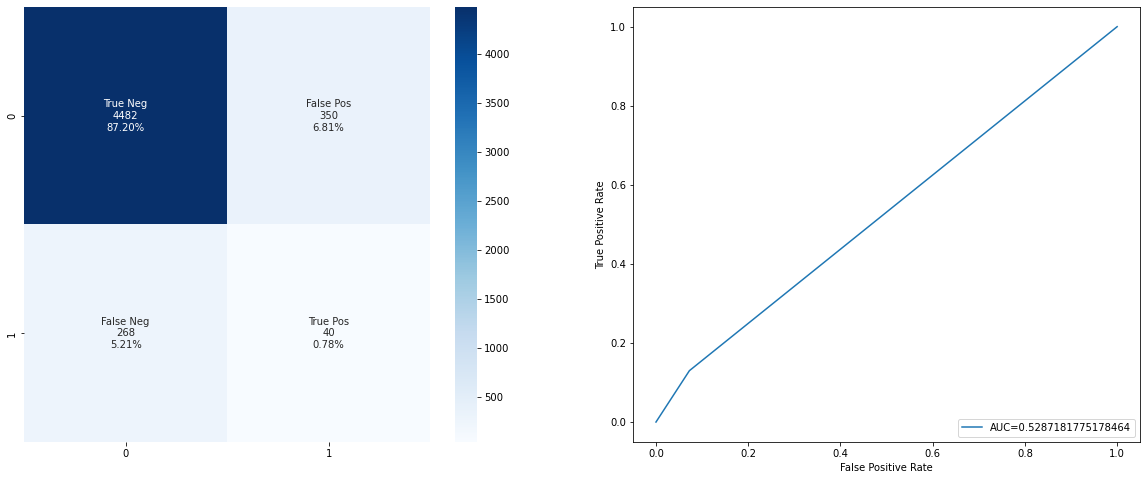

              precision    recall  f1-score   support

         Yes       0.94      0.93      0.94      4832
          No       0.10      0.13      0.11       308

    accuracy                           0.88      5140
   macro avg       0.52      0.53      0.53      5140
weighted avg       0.89      0.88      0.89      5140


Feature Importance...................................

19
Index(['Days_Policy_Accident', 'Days_Policy_Claim', 'NumberOfCars', 'wealth2',
       'AddressChange_Claim', 'VehiclePrice', 'median_brand', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'NumberOfSuppliments', 'ratioPolicy', 'wealth1',
       'PastNumberOfClaims', 'DayOfWeekClaimed', 'MonthClaimed', 'DayOfWeek',
       'mean_brand', 'Month', 'ratioRepNumber'],
      dtype='object')


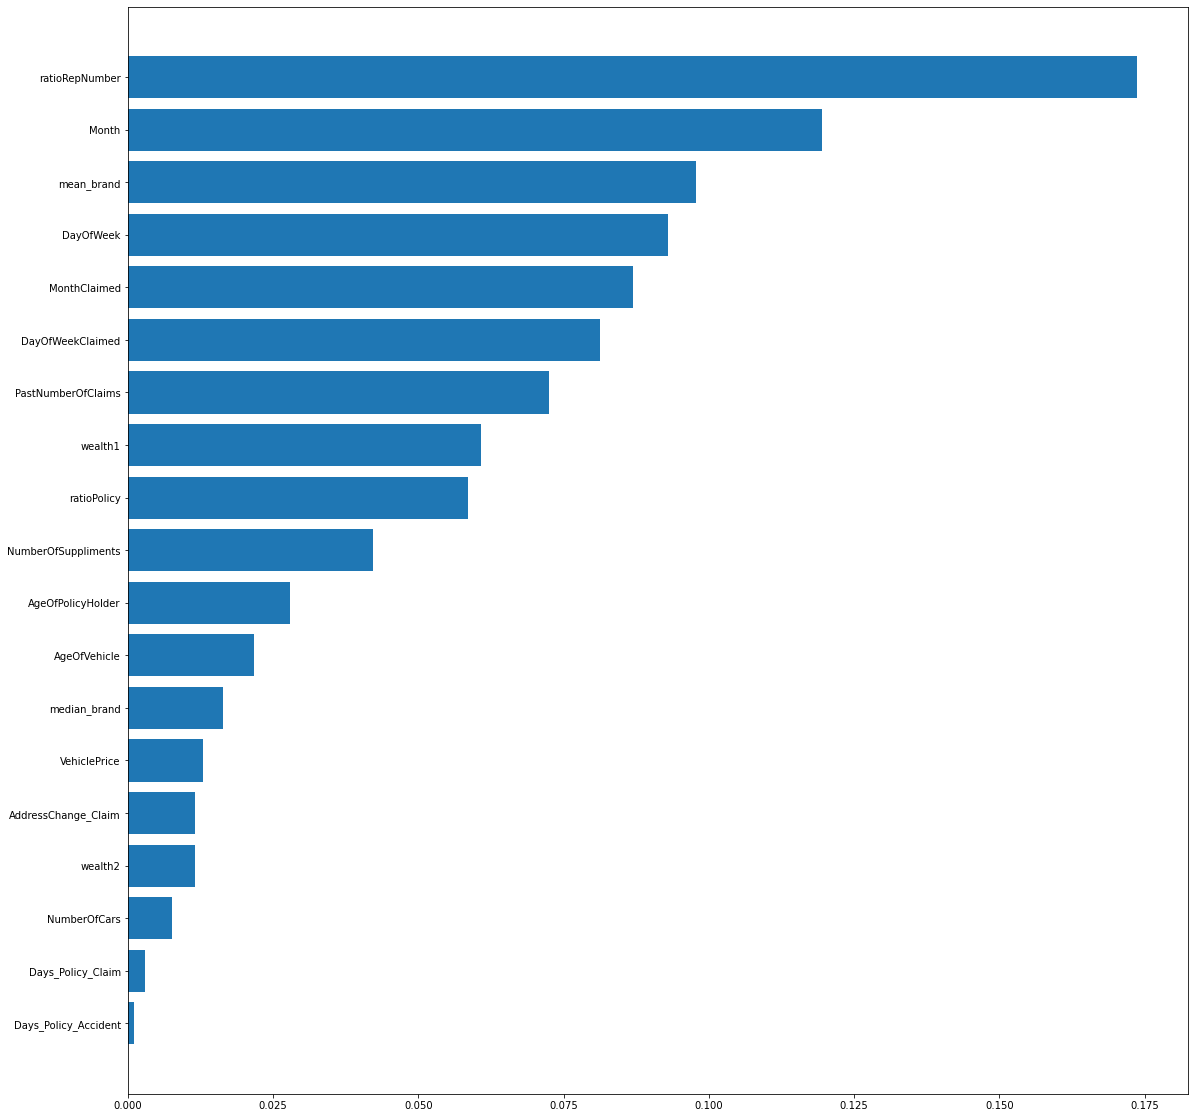

In [107]:
DataAdd = Models_Startified(ordinalDataAdd,'FraudFound_P',3)
DataAdd.DT(True)

##### It looks like defines wealth, considering age of vehicle was better choice

In [108]:
dataset.drop('wealth2', inplace=True, axis=1)
ordinalAdd.remove('wealth2')

In [109]:
dataset.drop('median_brand', inplace=True, axis=1)
ordinalAdd.remove('median_brand')

In [110]:
ordinalAdd

['Month',
 'DayOfWeek',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'ratioRepNumber',
 'mean_brand',
 'wealth1',
 'ratioPolicy',
 'FraudFound_P']

<AxesSubplot:>

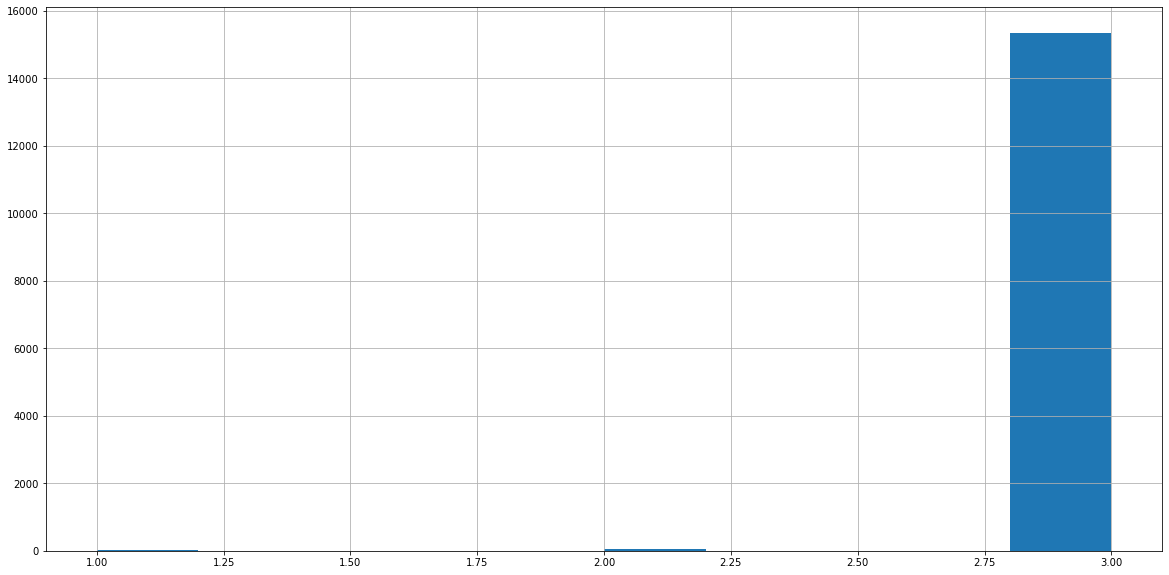

In [111]:
dataset['Days_Policy_Claim'].hist(figsize=(20,10))

In [112]:
dataset['Days_Policy_Claim'].unique()

array([3, 2, 1], dtype=int64)

# 

<AxesSubplot:xlabel='FraudFound_P', ylabel='Count'>

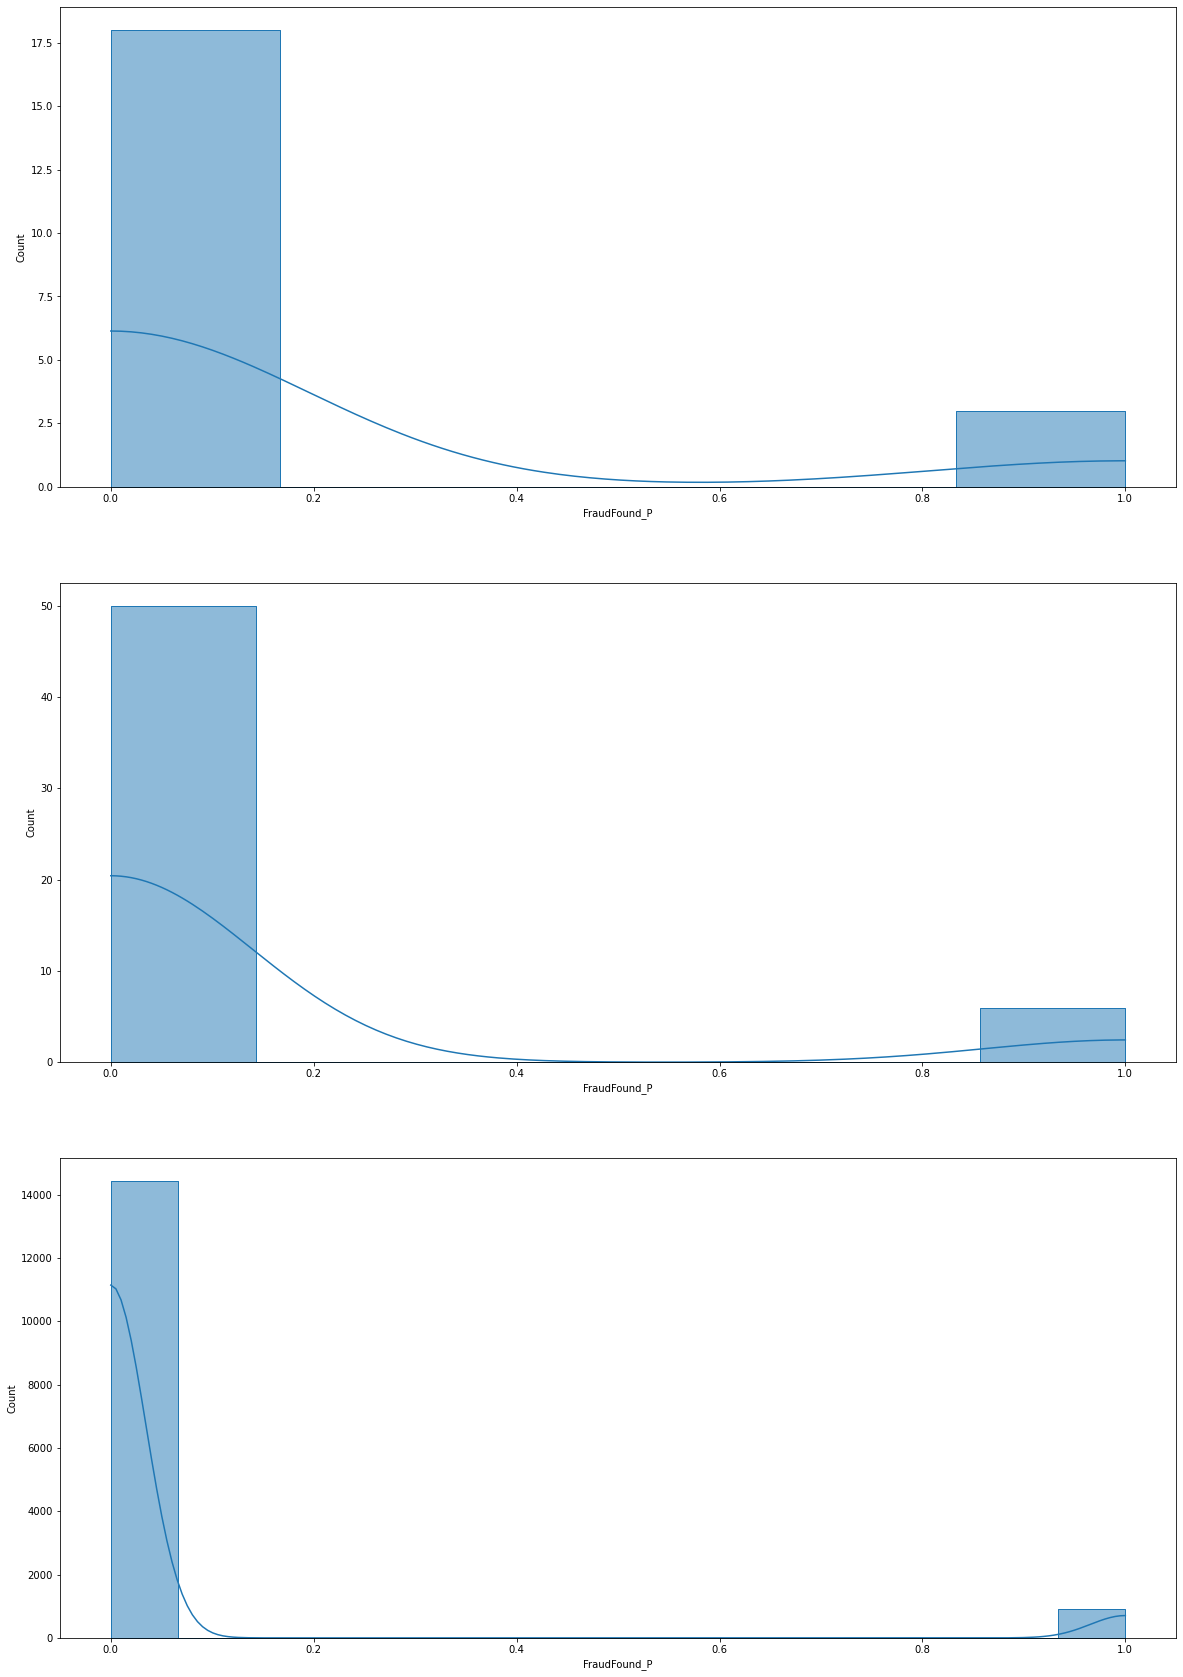

In [113]:
fig, ax = plt.subplots(3, 1, figsize=(20, 30))
sns.histplot(x=dataset[dataset['Days_Policy_Claim'] == 1].loc[:,target], data=dataset[dataset['Days_Policy_Claim'] == 1], kde=True, element="step",ax=ax[0])
sns.histplot(x=dataset[dataset['Days_Policy_Claim'] == 2].loc[:,target], data=dataset[dataset['Days_Policy_Claim'] == 2], kde=True, element="step",ax=ax[1])
sns.histplot(x=dataset[dataset['Days_Policy_Claim'] == 3].loc[:,target], data=dataset[dataset['Days_Policy_Claim'] == 3], kde=True, element="step",ax=ax[2])

In [114]:
dataset.drop('Days_Policy_Claim', inplace=True, axis=1)

In [115]:
ordinalAdd.remove('Days_Policy_Claim')

In [116]:
datasetOrdinalAdd = dataset[ordinalAdd]


DecisionTree.........................................

List of possible accuracy: dict_values([0.8772373540856031, 0.8729571984435798, 0.876629694493092])

Maximum Accuracy That can be obtained from this model is: 87.72373540856032 %

Minimum Accuracy: 87.29571984435798 %

Overall Accuracy: 87.56080823407582 %

Standard Deviation is: 0.00231575076861328

List of possible F1-score: dict_values([0.11001410437235543, 0.0917941585535466, 0.10704225352112677])

Maximum F1-score That can be obtained from this model is: 11.001410437235542 %

Minimum F1-score: 9.17941585535466 %

Overall F1-score: 10.29501721490096 %

Standard Deviation is: 0.00977499124690675



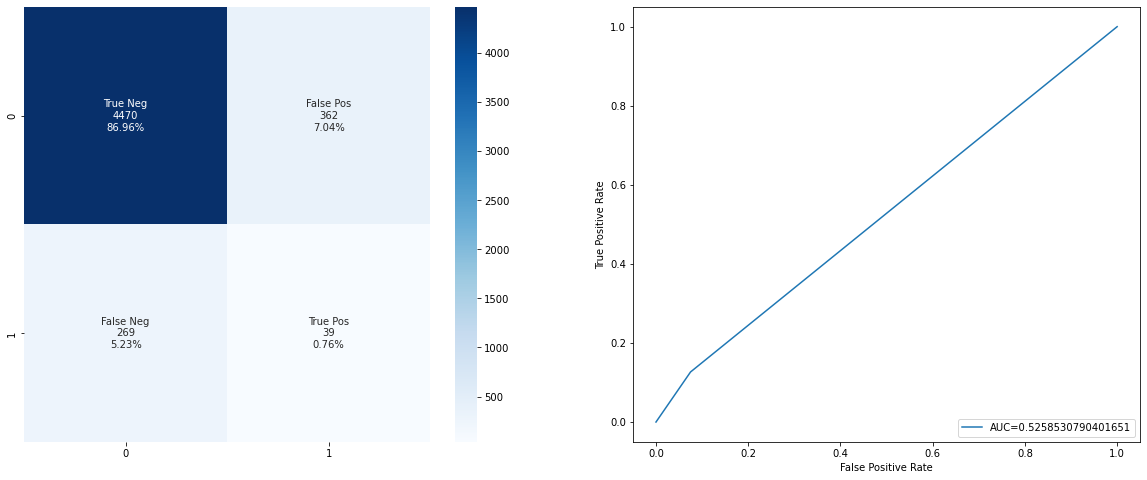

              precision    recall  f1-score   support

         Yes       0.94      0.93      0.93      4832
          No       0.10      0.13      0.11       308

    accuracy                           0.88      5140
   macro avg       0.52      0.53      0.52      5140
weighted avg       0.89      0.88      0.88      5140


Feature Importance...................................

16
Index(['Days_Policy_Accident', 'NumberOfCars', 'AddressChange_Claim',
       'VehiclePrice', 'AgeOfVehicle', 'NumberOfSuppliments',
       'AgeOfPolicyHolder', 'ratioPolicy', 'wealth1', 'PastNumberOfClaims',
       'DayOfWeekClaimed', 'MonthClaimed', 'DayOfWeek', 'mean_brand', 'Month',
       'ratioRepNumber'],
      dtype='object')


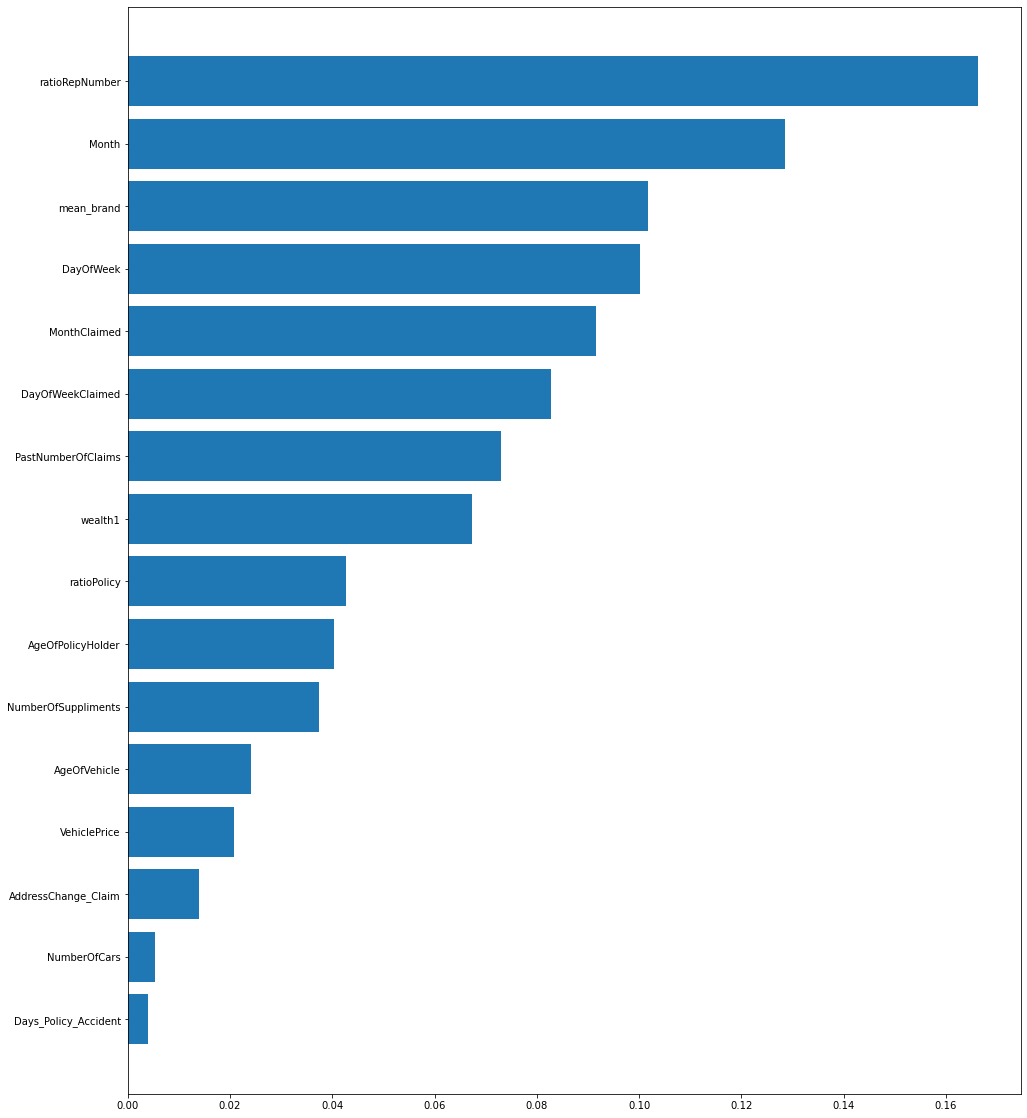

In [117]:
modelordinalDataAdd = Models_Startified(datasetOrdinalAdd,'FraudFound_P',3)
modelordinalDataAdd.DT(True)

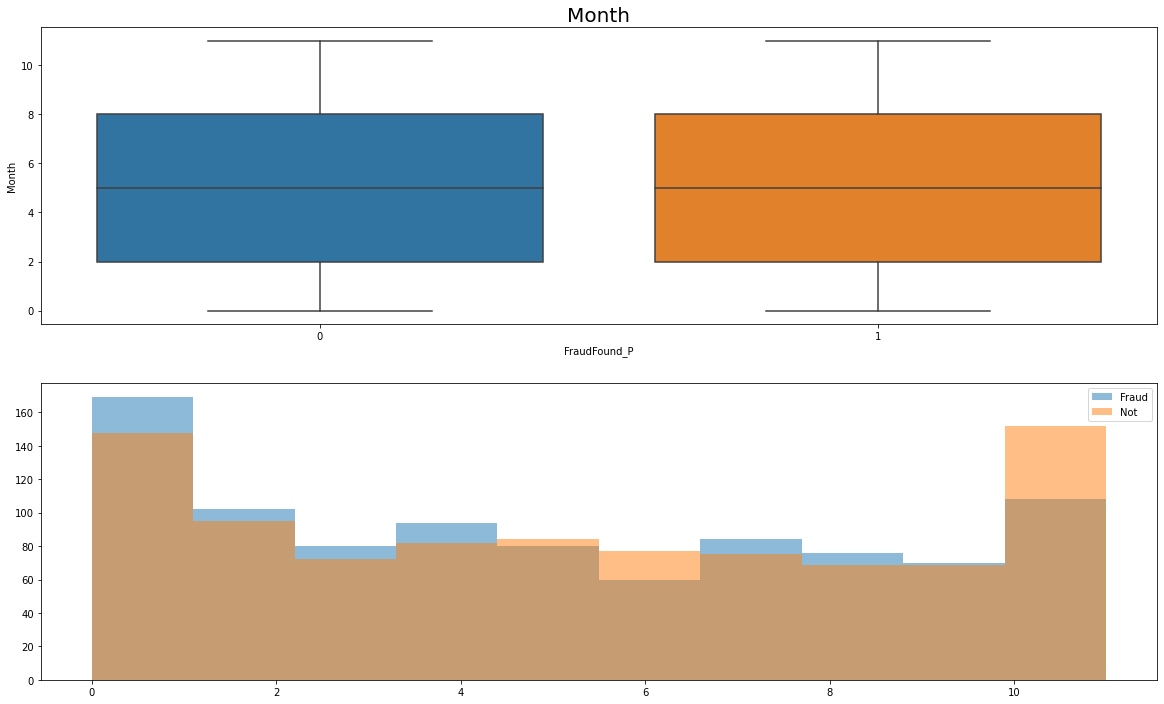

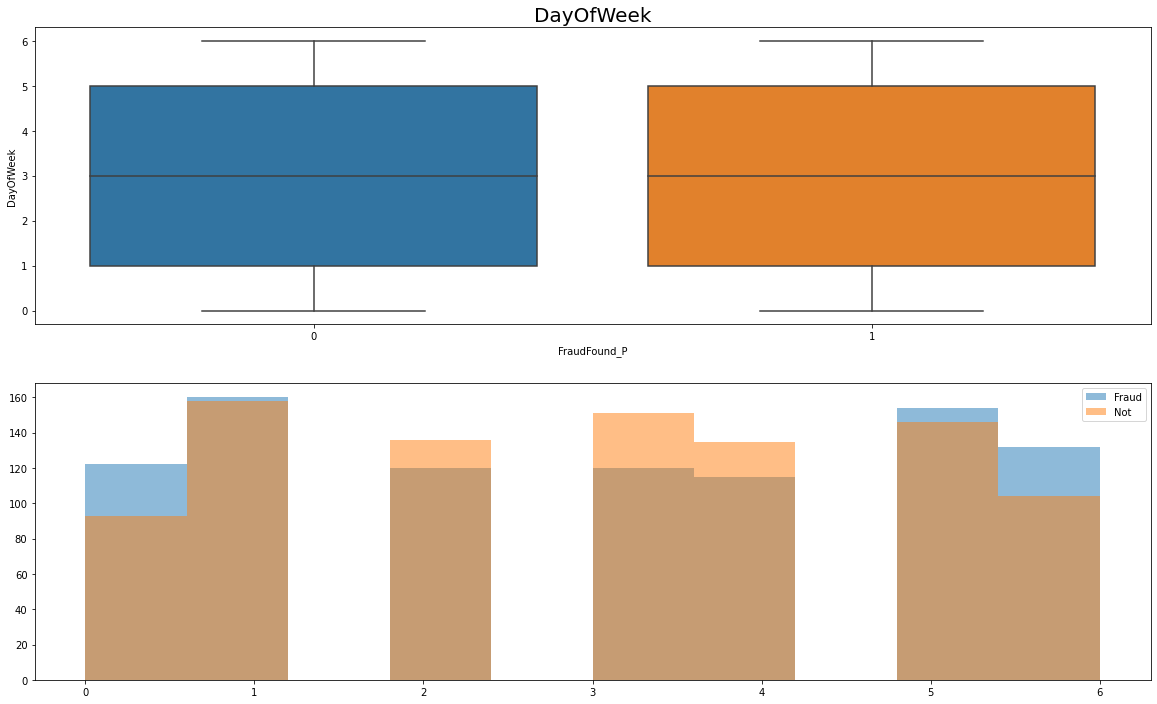

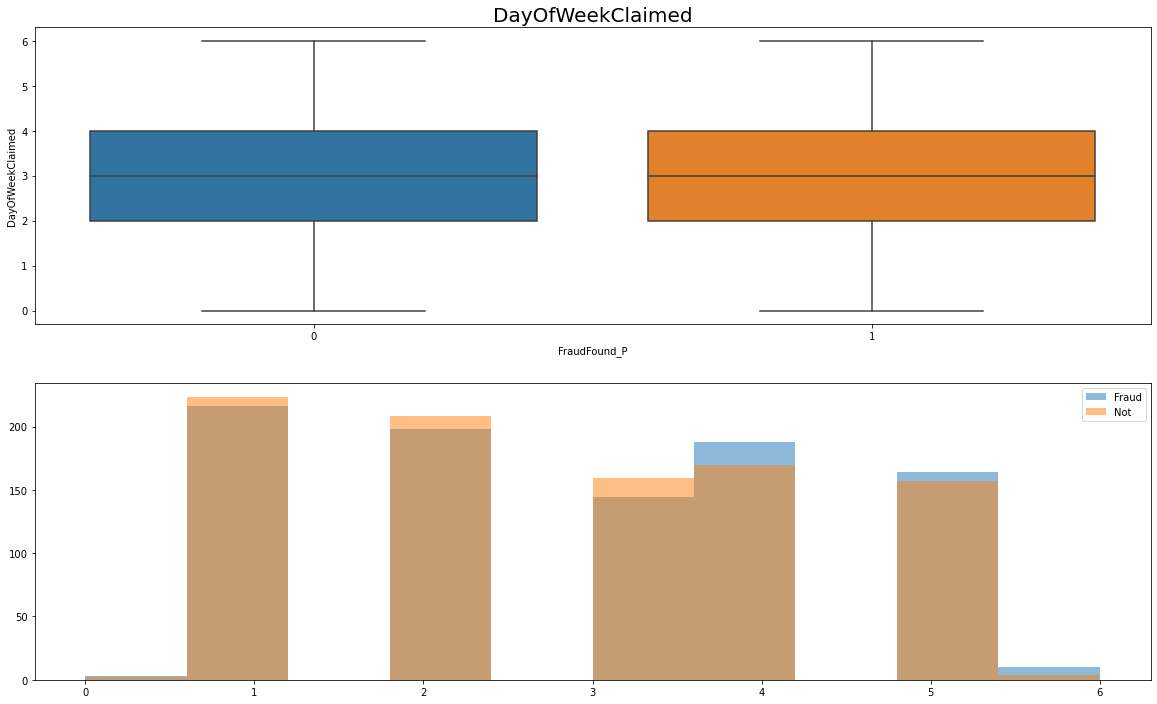

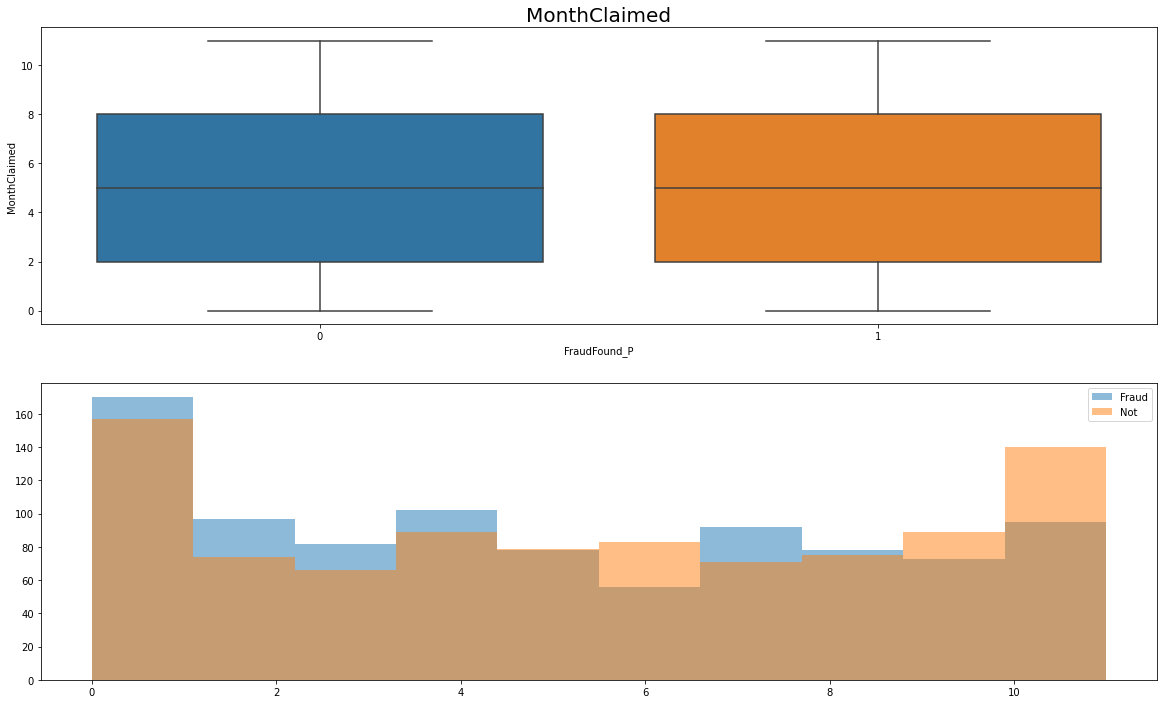

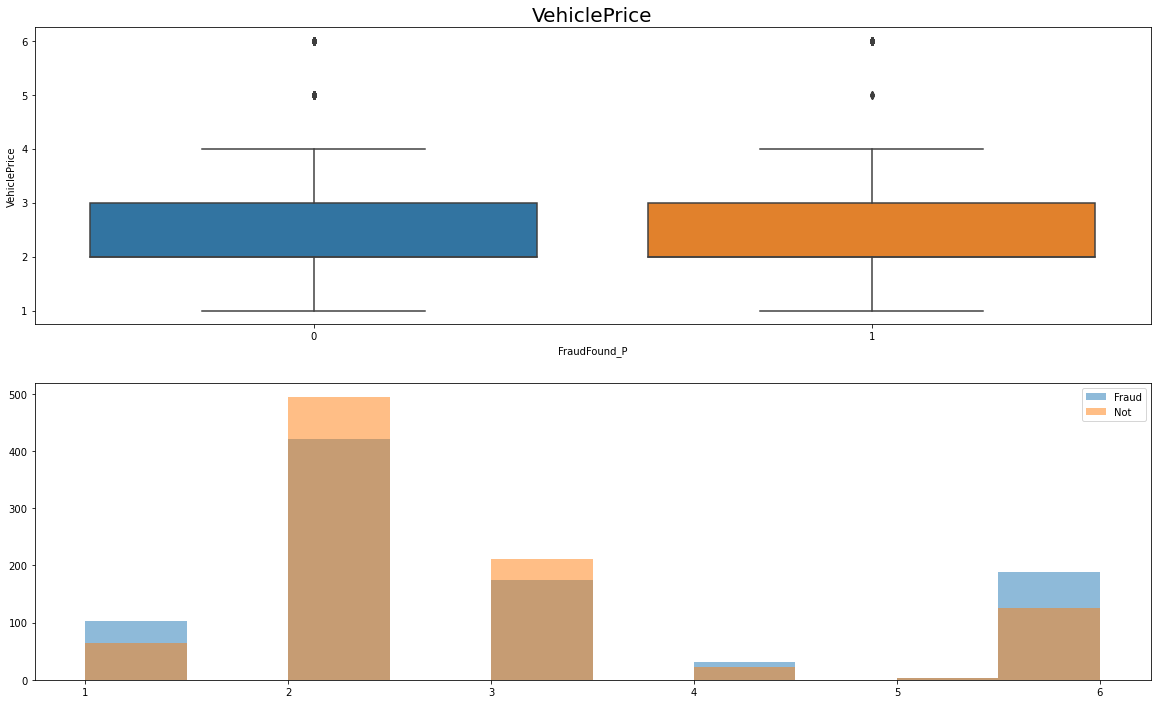

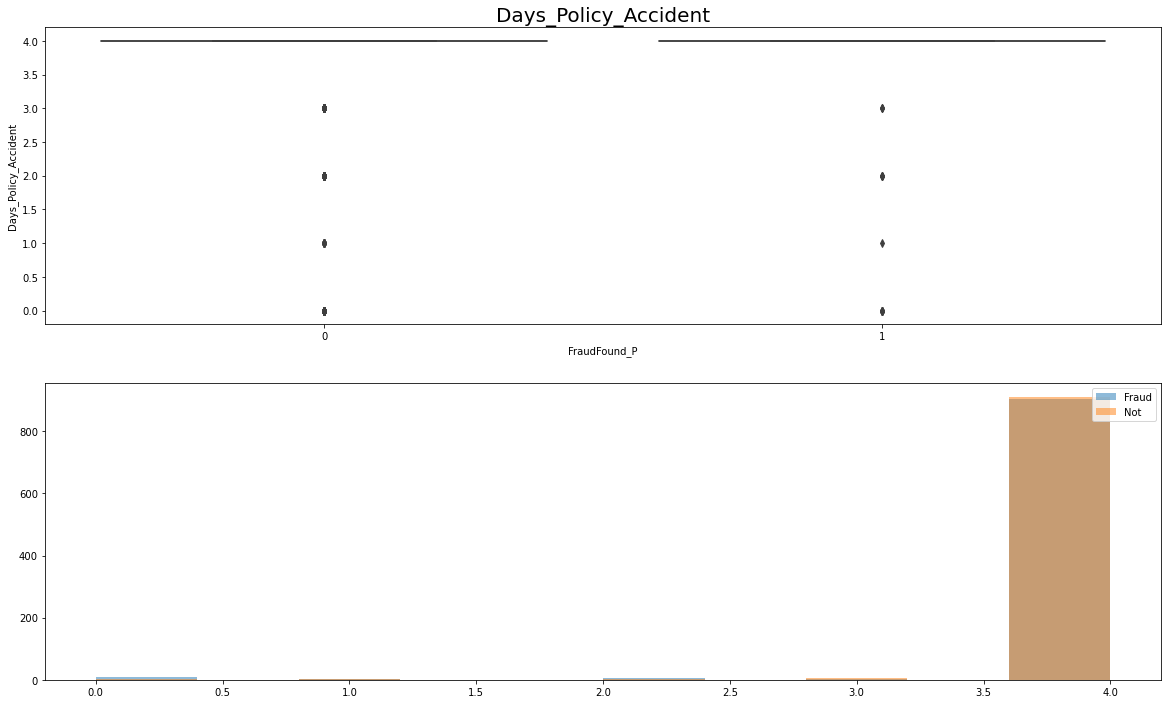

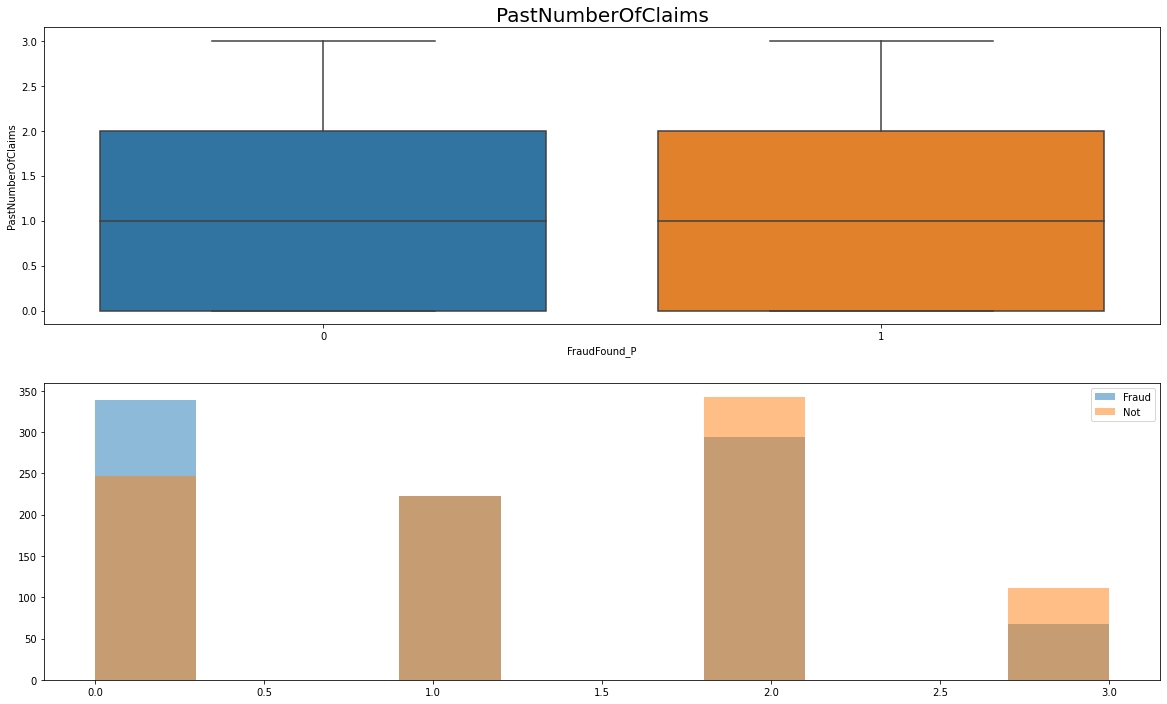

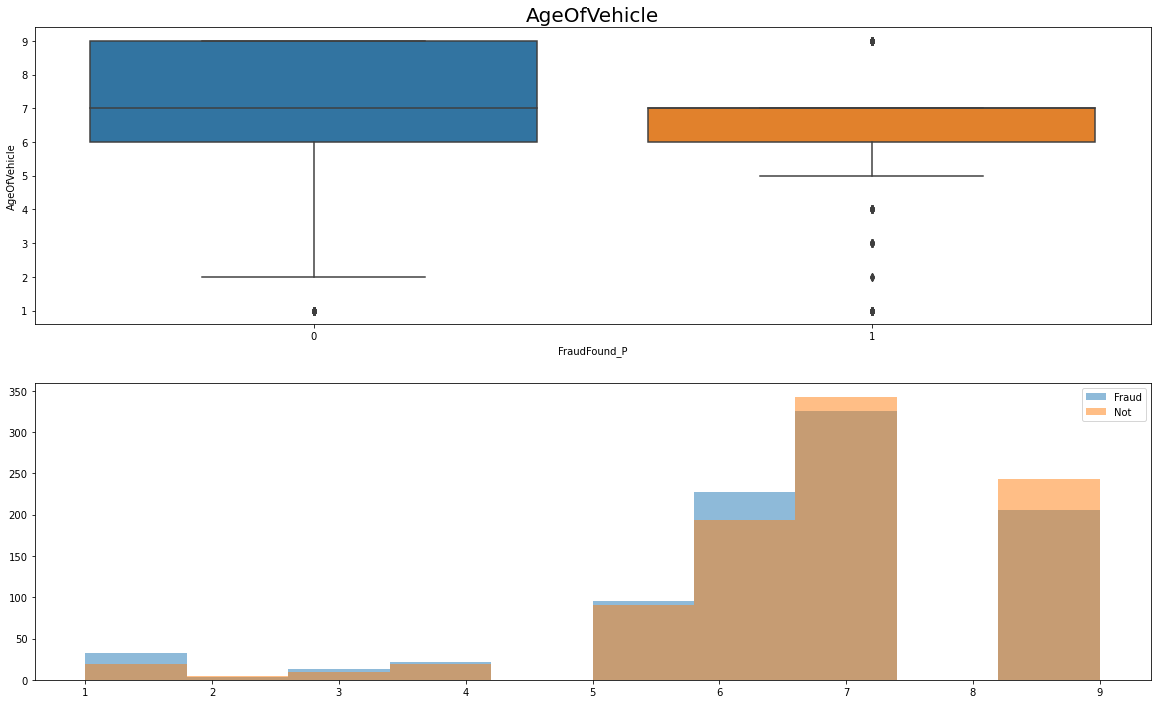

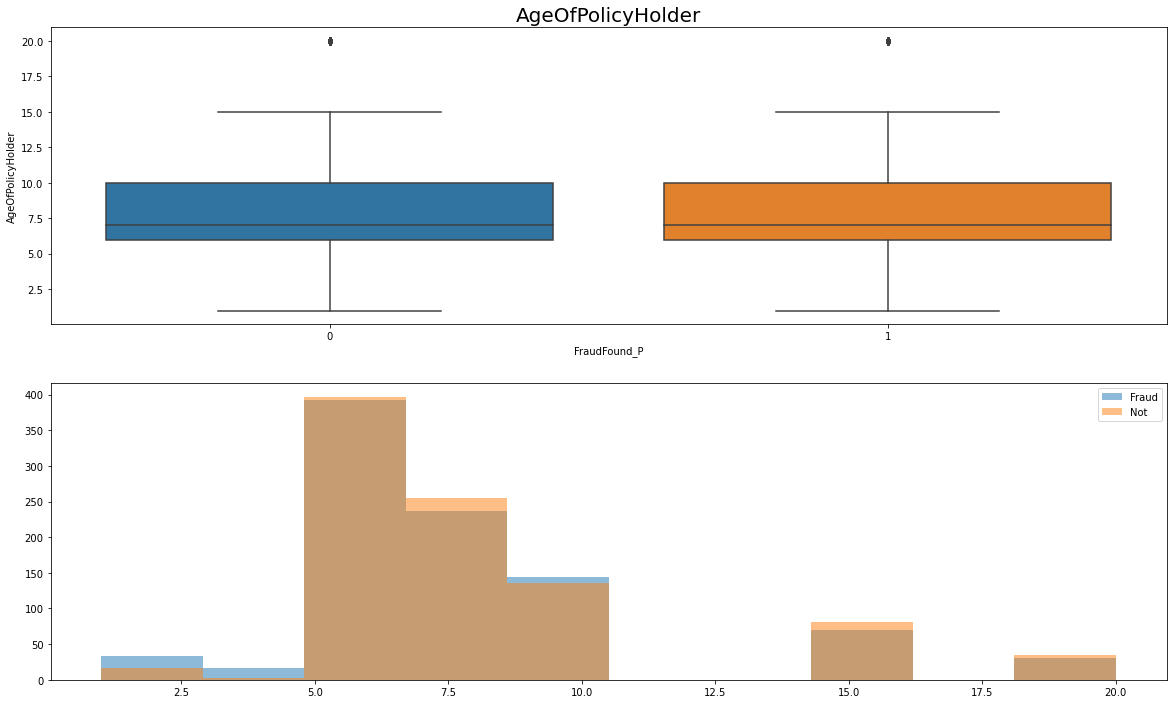

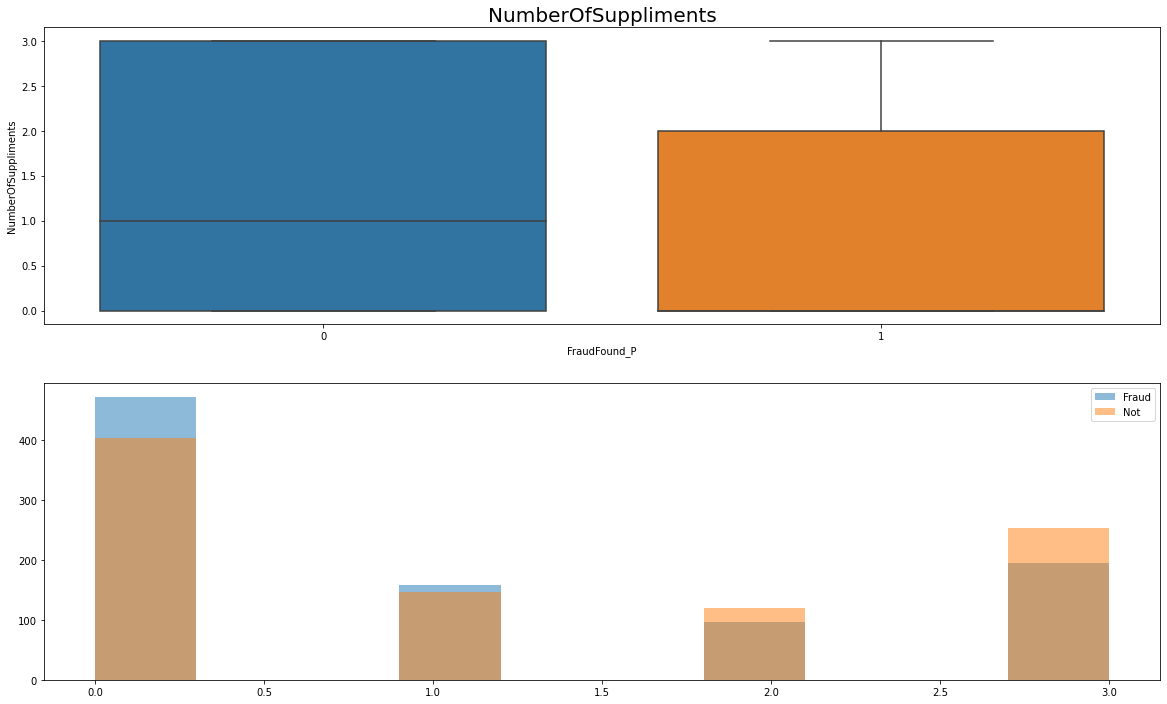

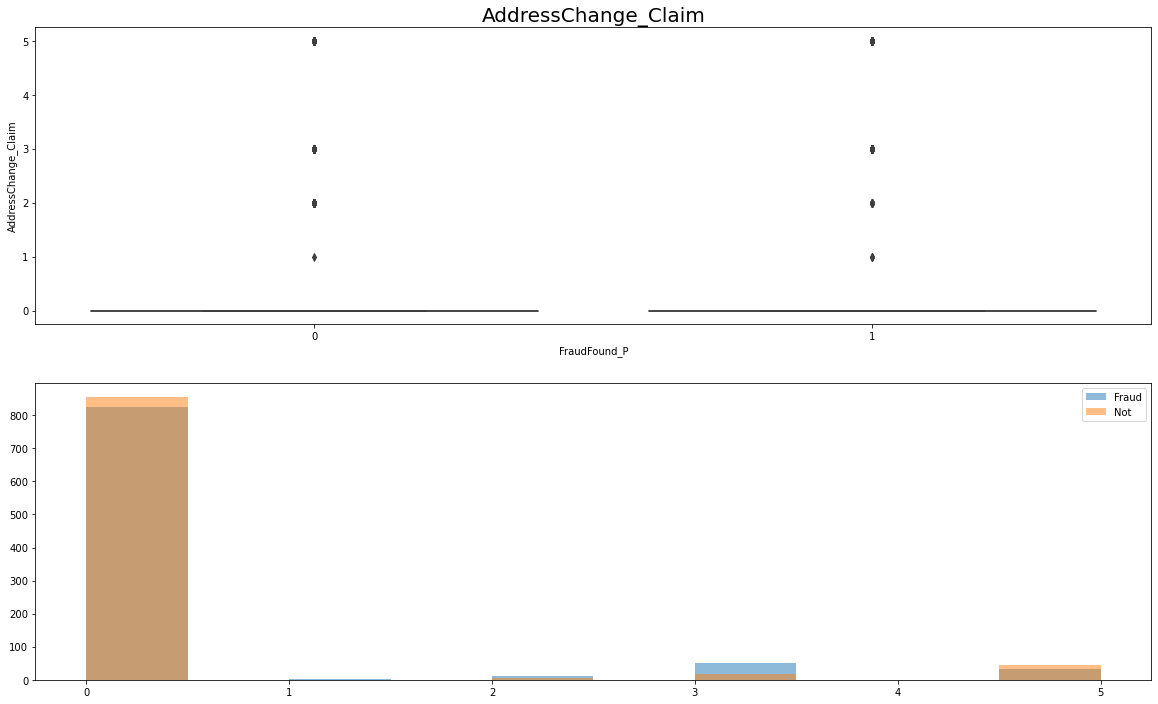

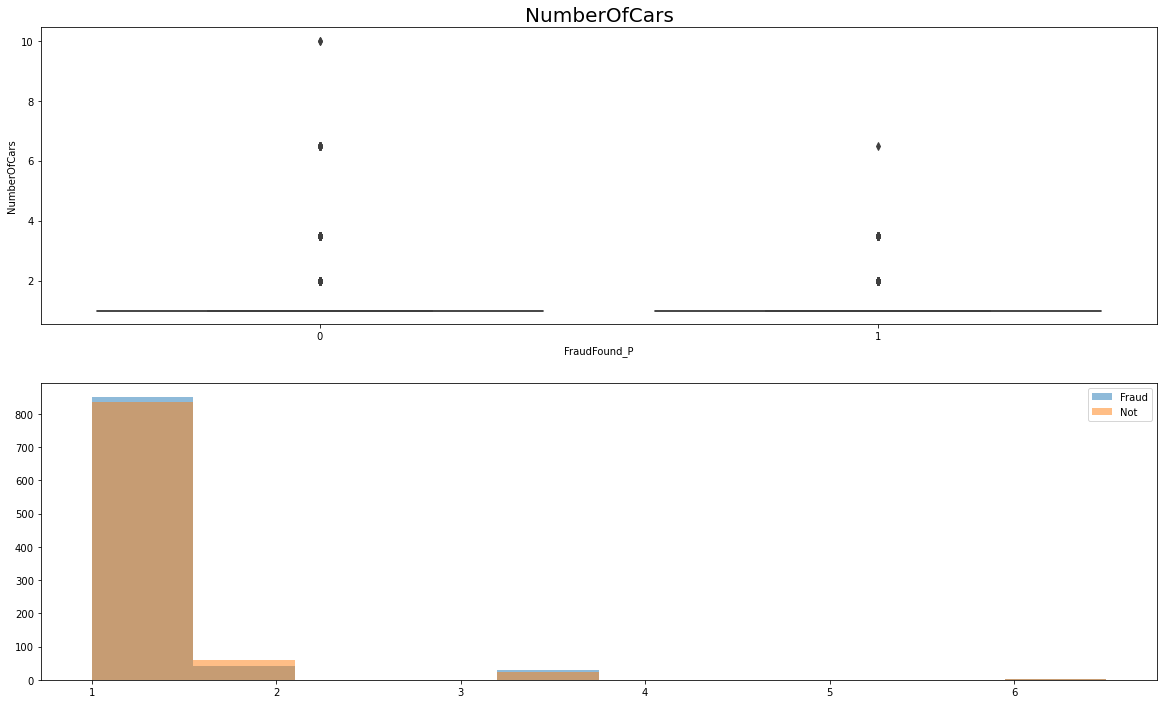

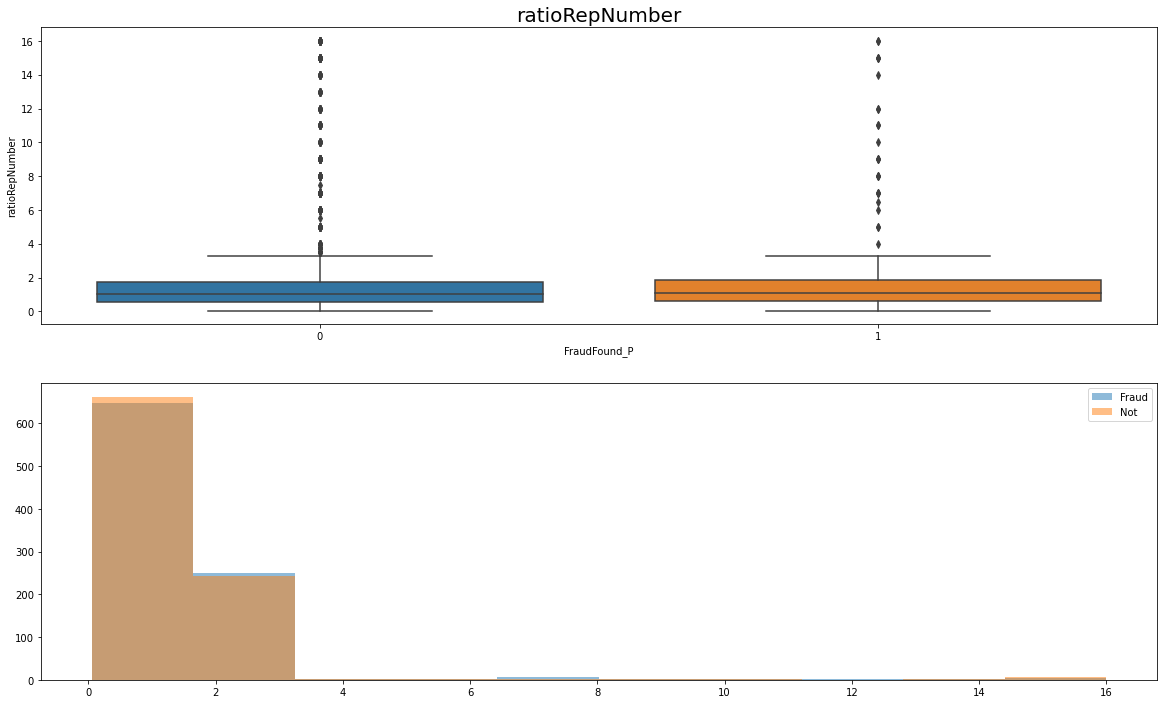

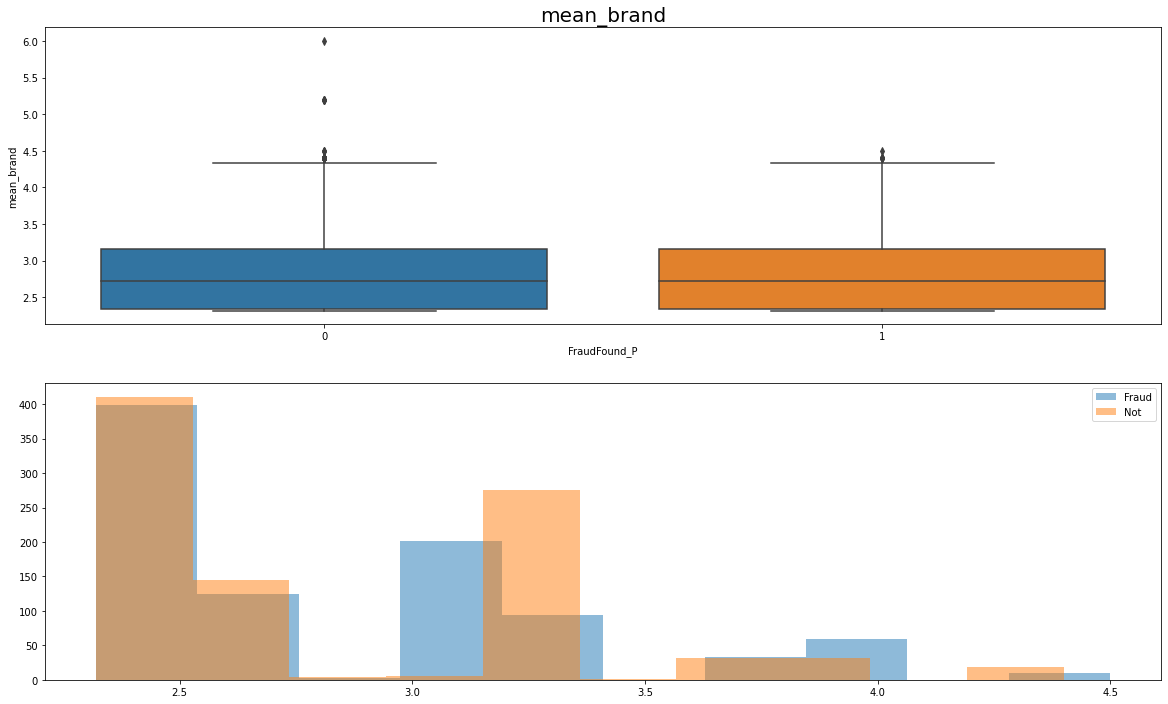

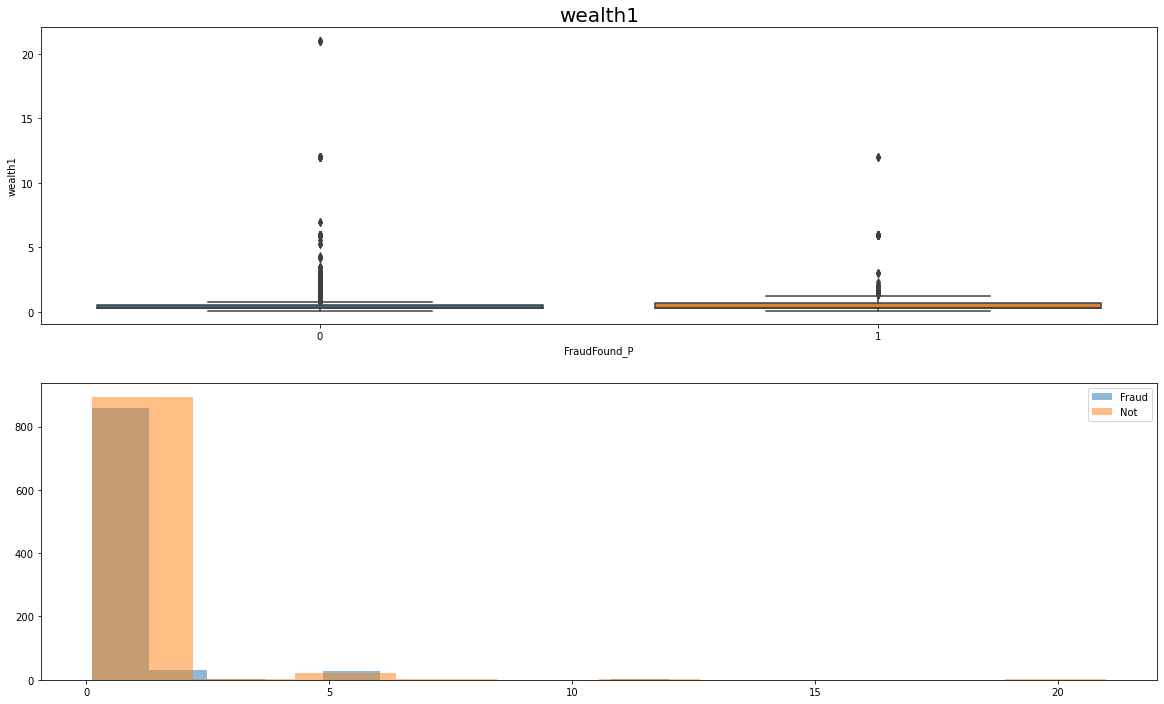

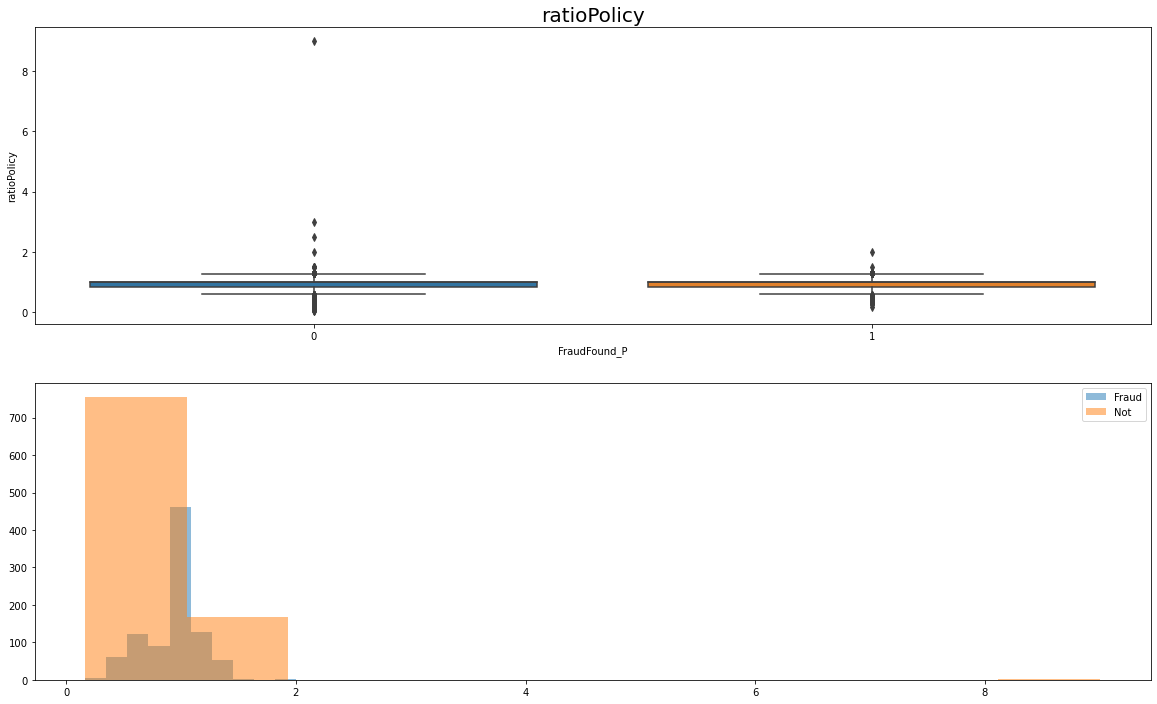

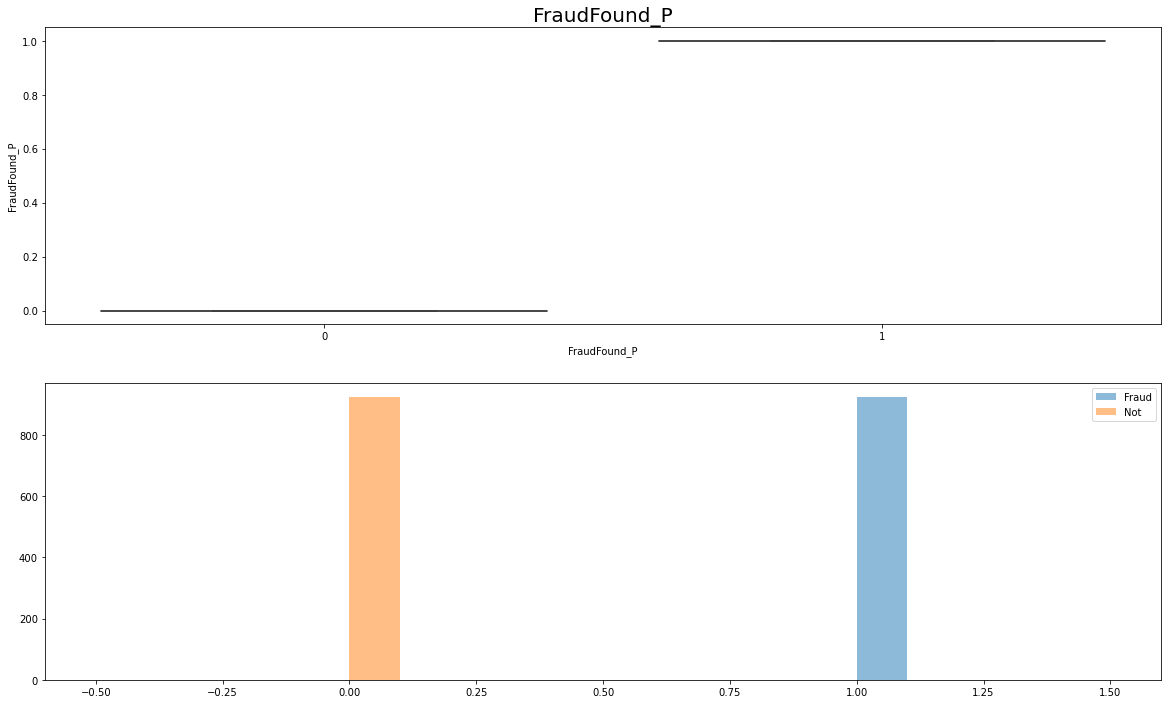

In [118]:
for feature in ordinalAdd:
    compare(feature,dataset)

In [119]:
num_1 = len(dataset[dataset[target]==1])
num_0 = len(dataset[dataset[target]==0])
undersampled_dataset = pd.concat([dataset[dataset[target]==0].sample(num_1) ,dataset[dataset[target]==1] ])
fraud = undersampled_dataset[undersampled_dataset['FraudFound_P'] == 1]

### Test new datast

In [221]:
dataset

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,Fault_Policy Holder,Fault_Third Party,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AccidentArea_Rural,AccidentArea_Urban,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Sex_Female,Sex_Male,AgentType_External,AgentType_Internal,ratio,ratioRating,ratioRepNumber,mean_brand,wealth1,ratioPolicy
0,11,5,4,2.0,0.0,1,2.1,6,0,12,3.0,1,4,0,3,5,0,2,3.5,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,5.714286,0.476190,2.400000,3.156071,7.000000,0.600000
1,0,3,4,1.0,0.0,4,3.4,6,0,15,4.0,4,4,0,6,6,0,0,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,4.411765,1.176471,2.500000,3.156071,1.000000,1.000000
2,9,5,5,3.0,10.0,2,4.7,6,0,7,4.0,3,4,1,7,10,0,0,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1.489362,0.638298,0.700000,3.156071,0.857143,0.700000
3,5,2,6,5.0,6.0,1,6.5,2,0,4,4.0,2,4,1,9,15,3,0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.615385,0.307692,0.266667,2.319769,0.222222,0.600000
4,0,5,1,2.0,1.0,2,2.7,6,0,3,4.0,1,4,0,5,6,0,0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1.111111,0.370370,0.500000,3.156071,1.200000,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10,4,5,2.0,10.0,5,3.5,2,1,5,4.0,4,4,2,6,6,0,0,1.0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1.428571,1.142857,0.833333,2.319769,0.333333,1.000000
15416,10,5,3,5.0,11.0,1,3.0,3,0,11,4.0,3,4,3,6,6,3,0,3.5,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,3.666667,1.000000,1.833333,2.347146,1.750000,1.000000
15417,10,5,3,5.0,11.0,1,2.4,2,1,4,4.0,4,4,3,5,5,1,0,1.0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1.666667,1.666667,0.800000,2.319769,0.400000,1.000000
15418,11,1,1,3.0,11.0,2,3.4,2,0,6,4.0,4,4,0,2,6,3,0,1.0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1.764706,1.176471,1.000000,2.319769,1.000000,0.333333



LogisticRegression...................................

List of possible accuracy: dict_values([0.9400778210116731, 0.9400778210116731, 0.9400661607316598])

Maximum Accuracy That can be obtained from this model is: 94.00778210116731 %

Minimum Accuracy: 94.00661607316599 %

Overall Accuracy: 94.00739342516687 %

Standard Deviation is: 6.73206580451369e-06

List of possible F1-score: dict_values([0.0, 0.0, 0.0])

Maximum F1-score That can be obtained from this model is: 0.0 %

Minimum F1-score: 0.0 %

Overall F1-score: 0.0 %

Standard Deviation is: 0.0



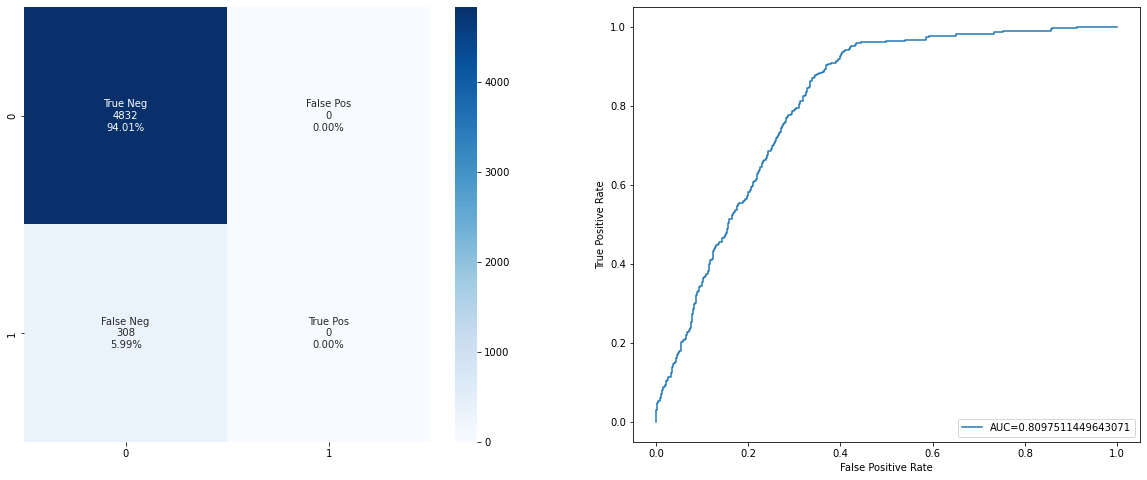

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       1.00      0.00      0.00       308

    accuracy                           0.94      5140
   macro avg       0.97      0.50      0.48      5140
weighted avg       0.94      0.94      0.91      5140


DecisionTree.........................................

List of possible accuracy: dict_values([0.8988326848249028, 0.9056420233463035, 0.8877213465654796])

Maximum Accuracy That can be obtained from this model is: 90.56420233463035 %

Minimum Accuracy: 88.77213465654796 %

Overall Accuracy: 89.73986849122286 %

Standard Deviation is: 0.009045989768005048

List of possible F1-score: dict_values([0.2571428571428571, 0.22893481717011127, 0.15519765739385066])

Maximum F1-score That can be obtained from this model is: 25.71428571428571 %

Minimum F1-score: 15.519765739385067 %

Overall F1-score: 21.375844390227304 %

Standard Deviation is: 0.05263979167074821



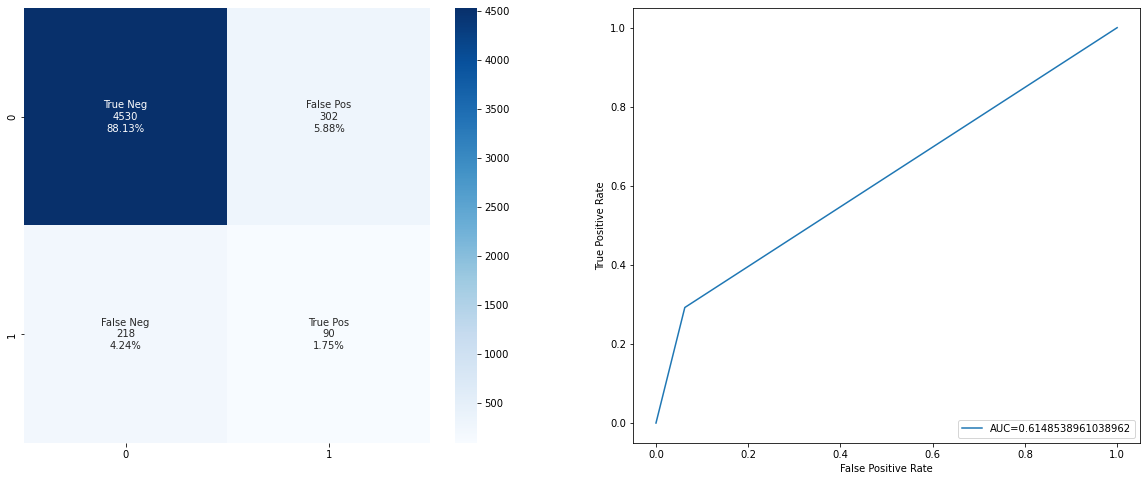

              precision    recall  f1-score   support

         Yes       0.95      0.94      0.95      4832
          No       0.23      0.29      0.26       308

    accuracy                           0.90      5140
   macro avg       0.59      0.61      0.60      5140
weighted avg       0.91      0.90      0.90      5140


RandomForest.........................................

List of possible accuracy: dict_values([0.9398832684824903, 0.9400778210116731, 0.9396769799571901])

Maximum Accuracy That can be obtained from this model is: 94.00778210116731 %

Minimum Accuracy: 93.967697995719 %

Overall Accuracy: 93.98793564837845 %

Standard Deviation is: 0.00020044915948980448

List of possible F1-score: dict_values([0.0, 0.0064516129032258064, 0.0])

Maximum F1-score That can be obtained from this model is: 0.6451612903225806 %

Minimum F1-score: 0.0 %

Overall F1-score: 0.21505376344086022 %

Standard Deviation is: 0.0037248404463846824



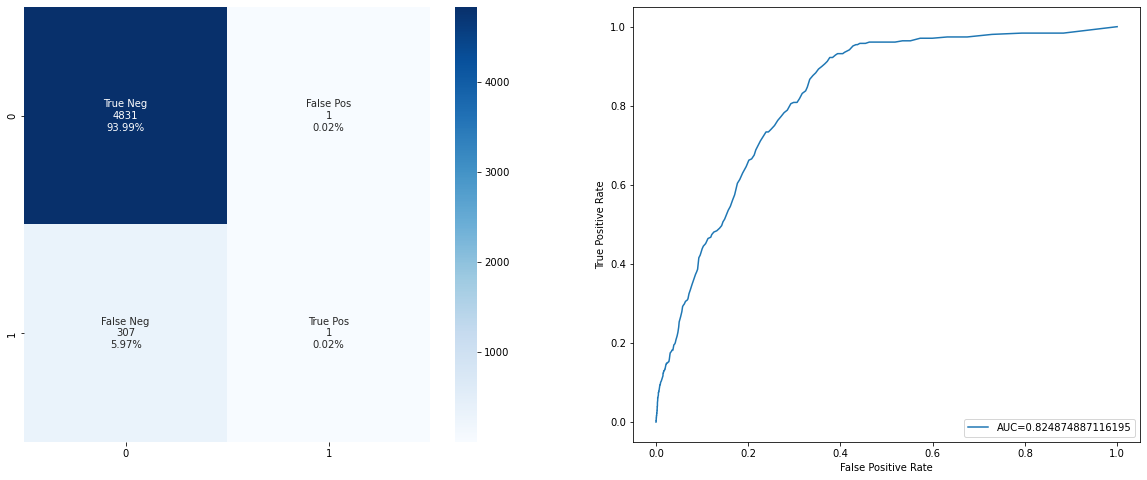

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       0.50      0.00      0.01       308

    accuracy                           0.94      5140
   macro avg       0.72      0.50      0.49      5140
weighted avg       0.91      0.94      0.91      5140


KNN..................................................

List of possible accuracy: dict_values([0.9365758754863813, 0.9365758754863813, 0.9369527145359019])

Maximum Accuracy That can be obtained from this model is: 93.6952714535902 %

Minimum Accuracy: 93.65758754863813 %

Overall Accuracy: 93.67014885028881 %

Standard Deviation is: 0.00021756812668186496

List of possible F1-score: dict_values([0.018072289156626505, 0.012121212121212123, 0.0061349693251533735])

Maximum F1-score That can be obtained from this model is: 1.8072289156626504 %

Minimum F1-score: 0.6134969325153373 %

Overall F1-score: 1.2109490200997335 %

Standard Deviation is: 0.005968668548535809

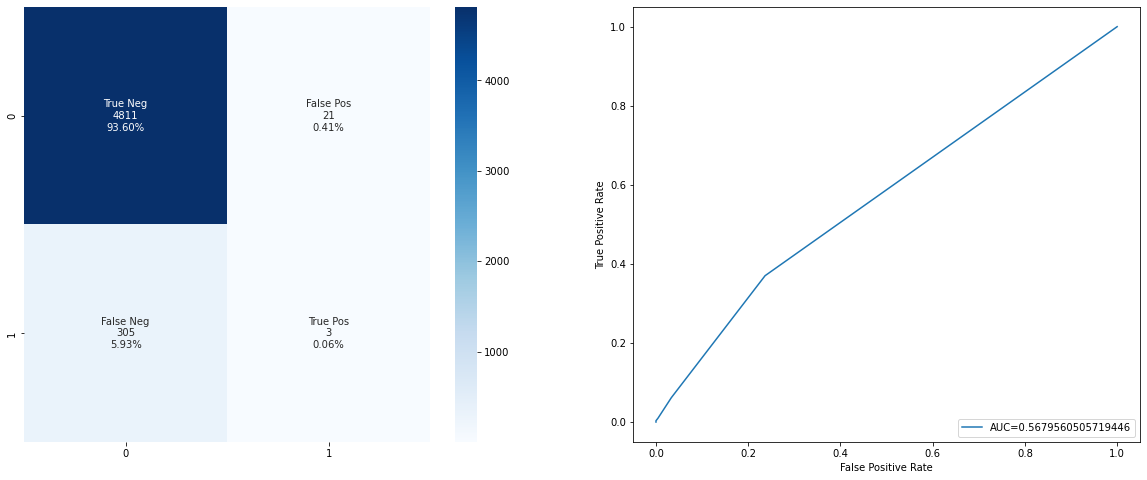

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       0.12      0.01      0.02       308

    accuracy                           0.94      5140
   macro avg       0.53      0.50      0.49      5140
weighted avg       0.89      0.94      0.91      5140


SVC..................................................

List of possible accuracy: dict_values([0.9400778210116731, 0.9400778210116731, 0.9402607511188947])

Maximum Accuracy That can be obtained from this model is: 94.02607511188947 %

Minimum Accuracy: 94.00778210116731 %

Overall Accuracy: 94.01387977140804 %

Standard Deviation is: 0.00010561474664727239

List of possible F1-score: dict_values([0.0, 0.0, 0.0])

Maximum F1-score That can be obtained from this model is: 0.0 %

Minimum F1-score: 0.0 %

Overall F1-score: 0.0 %

Standard Deviation is: 0.0



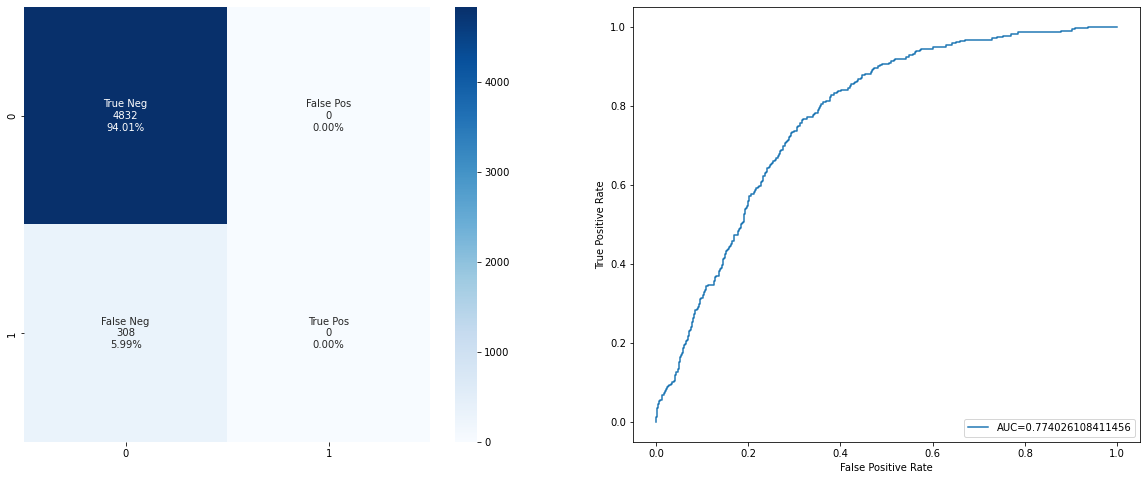

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       1.00      0.00      0.00       308

    accuracy                           0.94      5140
   macro avg       0.97      0.50      0.48      5140
weighted avg       0.94      0.94      0.91      5140


F1-Score.............................................

                    0          1
0        DecisionTree  25.714286
1                 KNN   1.807229
2        RandomForest   0.645161
3  LogisticRegression   0.000000
4                 SVC   0.000000

Accuracy.............................................

                    0          1
0                 SVC  94.026075
1  LogisticRegression  94.007782
2        RandomForest  94.007782
3                 KNN  93.695271
4        DecisionTree  90.564202


In [222]:
modelFeatureAdding = Models_Startified(dataset,'FraudFound_P',3)
modelFeatureAdding.testClassification()

In [123]:
def select_features(X_train, y_train, X_test, k_value='all'):
    fs = SelectKBest(score_func=chi2, k=k_value)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# 

<a name="1.6"></a>
## Handle Imbalanced datasets
- [New Models](#1.4.0)
- [Random Oversampling and Undersampling](#1.4.1)
- [Oversampling](#1.4.2)
- [Class weights](#1.4.3)

<a name="1.4.0"></a>
### Ensemble Learning

In [120]:
X = dataset[dataset.columns.difference([target])]
Y = dataset[target]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=1)

In [122]:
trainSplitted = pd.concat([X_train, y_train], axis=1)
testSplitted = pd.concat([X_test, y_test], axis=1)

In [123]:
def confusionMat(Y_test, y_pred,y_prob):
    cf_matrix = confusion_matrix(Y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fpr, tpr, thresh = roc_curve(Y_test, y_prob, pos_label=1)
    auc = roc_auc_score(Y_test, y_prob)
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',ax=ax[0])
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [124]:
def ROC_AUC(Y_test,y_pred):
    fpr, tpr, thresh = roc_curve(Y_test, y_pred, pos_label=1)
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### 1.AdaBoost

In [243]:
clf = AdaBoostClassifier(n_estimators=50,random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [244]:
clf.score(X_train, y_train)

0.9364410214835833

In [245]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

In [246]:
targetNames = ['Yes', 'No']
print('F1-Score : ' + str(f1_score(y_test, y_pred)))
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred, target_names=targetNames))

F1-Score : 0.039603960396039604
Accuracy : 0.937094682230869

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      2899
          No       0.24      0.02      0.04       185

    accuracy                           0.94      3084
   macro avg       0.59      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084



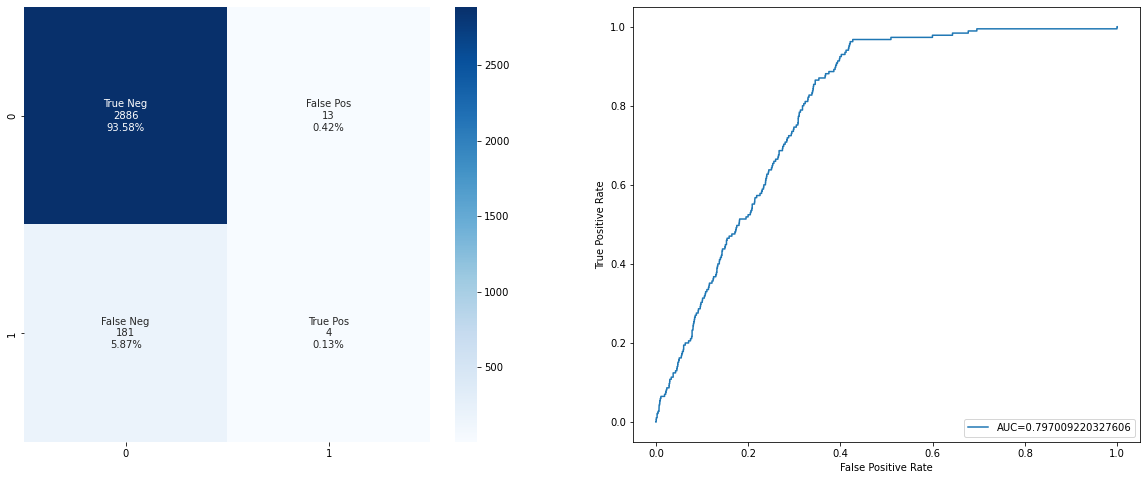

In [249]:
confusionMat(y_test, y_pred,y_prob)

#### DecisionTree Base estimatior

In [250]:
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto")
ABC = AdaBoostClassifier(base_estimator = DTC)

In [251]:
ABC.fit(X_train, y_train)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features='auto',
                                                         random_state=11))

In [252]:
y_pred = ABC.predict(X_test)
y_prob = ABC.predict_proba(X_test)[:, 1]

In [253]:
targetNames = ['Yes', 'No']
print('F1-Score : ' + str(f1_score(y_test, y_pred)))
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred, target_names=targetNames))

F1-Score : 0.16790123456790124
Accuracy : 0.8907263294422828

              precision    recall  f1-score   support

         Yes       0.95      0.94      0.94      2899
          No       0.15      0.18      0.17       185

    accuracy                           0.89      3084
   macro avg       0.55      0.56      0.55      3084
weighted avg       0.90      0.89      0.90      3084



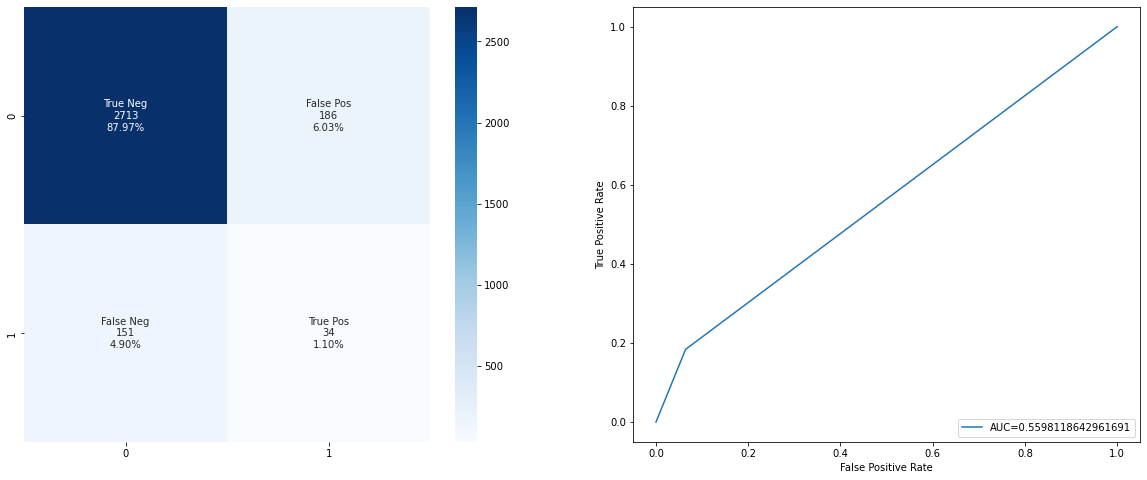

In [254]:
confusionMat(y_test, y_pred,y_prob)

### 2.XGBoost

In [255]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [256]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [257]:
targetNames = ['Yes', 'No']
print('F1-Score : ' + str(f1_score(y_test, y_pred)))
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred, target_names=targetNames))

F1-Score : 0.16363636363636364
Accuracy : 0.940337224383917

              precision    recall  f1-score   support

         Yes       0.95      0.99      0.97      2899
          No       0.51      0.10      0.16       185

    accuracy                           0.94      3084
   macro avg       0.73      0.55      0.57      3084
weighted avg       0.92      0.94      0.92      3084



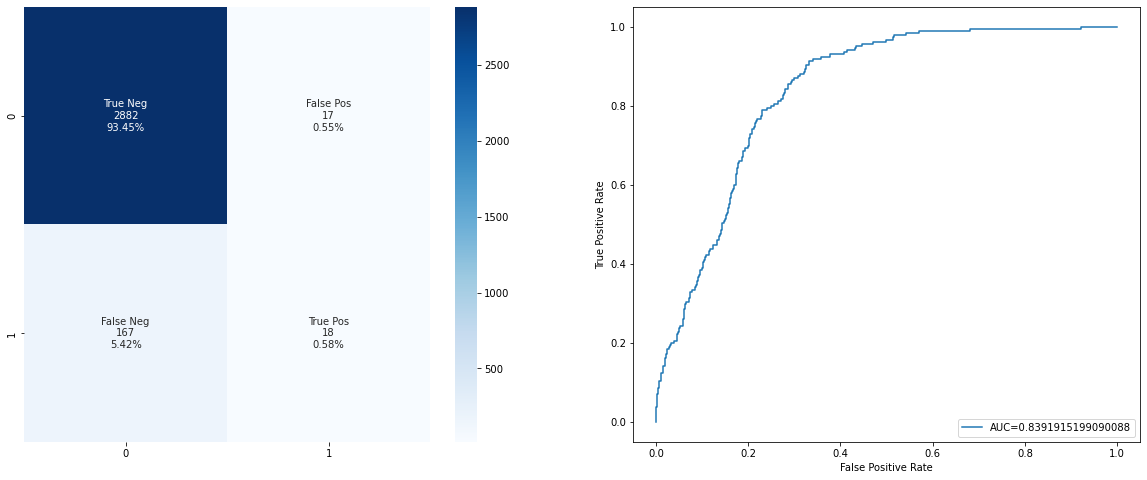

In [258]:
confusionMat(y_test, y_pred,y_prob)

#### Using grid search on it

In [259]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [260]:
parameters = {
    'max_depth': range (2, 20, 1),
    'n_estimators': range(60, 300, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [261]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1_micro',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

In [ ]:
targetNames = ['Yes', 'No']
print('F1-Score : ' + str(f1_score(y_test, y_pred)))
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred, target_names=targetNames))

In [ ]:
confusionMat(y_test, y_pred,y_prob)

#### 3.Gradient boosting

In [ ]:
gradientBoosting = GradientBoostingClassifier()

In [ ]:
gradientBoosting.fit(X_train, y_train)

In [ ]:
y_pred = gradientBoosting.predict(X_test)
y_prob = gradientBoosting.predict_proba(X_test)[:, 1]

In [ ]:
targetNames = ['Yes', 'No']
print('F1-Score : ' + str(f1_score(y_test, y_pred)))
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred, target_names=targetNames))

In [ ]:
confusionMat(y_test, y_pred,y_prob)

<a name="1.4.1"></a>
### Random Undersampling and Oversampling

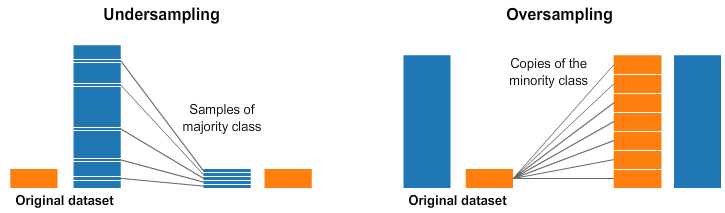

- [Models](#1.1.2)
- [Models_stratifed](#1.4)
- [Models_sampling](#1.4.1)
- [Models_weighted](#1.4.3)

In [139]:
class Models_Sampling():
    
    def __init__(self, train , test, target):
        self.target = target
      
        self.X_train= train[train.columns.difference([self.target])]
        self.X_test = test[test.columns.difference([self.target])]
        self.Y_train = train[self.target] 
        self.Y_test = test[self.target]
        self.dictAccuracy = {}
        self.dictF1       = {}

    
    #Method for display confusion matrix and ROC a AUC 
    def confusionMat(self, Y_test, y_pred,y_prob):
        cf_matrix = confusion_matrix(Y_test, y_pred)
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        fpr, tpr, thresh = roc_curve(Y_test, y_prob, pos_label=1)
        auc = roc_auc_score(Y_test, y_prob)
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))
        sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',ax=ax[0])
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)

        plt.show()
   
    def Logistic(self):
        logreg = LogisticRegression(random_state=16, max_iter=1000)
        logreg.fit(self.X_train, self.Y_train)
        y_pred = logreg.predict(self.X_test)
        y_prob = logreg.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        print("\nLogisticRegression...................................\n") 
        print("Accuracy:", accuracy)
        self.dictAccuracy['LogisticRegression'] = accuracy
        print("F1-Score:", f1)
        self.dictF1['LogisticRegression'] = f1
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames,zero_division=1))
    

    
    #Decison Tree
    def DT(self,plt):
        dtc = DecisionTreeClassifier()
        dtc.fit(self.X_train, self.Y_train)
        y_pred = dtc.predict(self.X_test)
        y_prob = dtc.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        self.dictAccuracy['DecisionTree'] = accuracy
        self.dictF1['DecisionTree'] = f1
        print("\nDecisionTree.........................................\n") 
        print("Accuracy:", accuracy)
        print("F1-Score:", f1)
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames))
        dtc.feature_importances_
        if plt:
            self.decisonFeature(self.dataset.columns.difference([target])
                           ,dtc.feature_importances_ )
            
            

    #Random forest 
    def RF(self):
        rf = RandomForestClassifier(n_estimators=500, random_state=42)
        rf.fit(self.X_train, self.Y_train)
        y_pred = rf.predict(self.X_test)
        y_prob = rf.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        self.dictAccuracy['Random forest'] = accuracy
        self.dictF1['Random forest'] = f1
        print("\nRandomForest.........................................\n") 
        print("Accuracy:", accuracy)
        print("F1-Score:", f1)
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames))
    
    #KNN
    def KNN(self):
        knn = KNeighborsClassifier()
        knn.fit(self.X_train, self.Y_train)
        y_pred = knn.predict(self.X_test)
        y_prob = knn.predict_proba(self.X_test)[:, 1]

        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        self.dictAccuracy['KNN'] = accuracy
        self.dictF1['KNN'] = f1
        print("\nKNN..................................................\n") 
        print("Accuracy:", accuracy)
        print("F1-Score:", str(f1))
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames))
    
    #SVC
    def SVC(self):
        clf = SVC(kernel='linear', probability=True)
        clf.fit(self.X_train,self.Y_train)
        y_pred = clf.predict(self.X_test)
        y_prob = clf.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.Y_test, y_pred)
        f1 = f1_score(self.Y_test, y_pred)
        self.dictAccuracy['SVC'] = accuracy
        self.dictF1['SVC'] = f1
        print("\nSVC..................................................\n") 
        print("Accuracy:", accuracy)
        print("F1-Score:", f1)
        targetNames = ['Yes', 'No']
        self.confusionMat(self.Y_test, y_pred,y_prob)
        print(classification_report(self.Y_test, y_pred, target_names=targetNames , zero_division=1))
        
    #Metric Table 
    def table(self):
        self.dictF1 = sorted(self.dictF1.items(), key=lambda x:x[1],reverse=True)
        self.dictAccuracy = sorted(self.dictAccuracy.items(), key=lambda x:x[1] ,reverse=True)
        acc = pd.DataFrame.from_dict(self.dictAccuracy)
        f1 = pd.DataFrame.from_dict(self.dictF1)

        print("\nF1-Score.............................................\n")
        print(f1)
     
        print("\nAccuracy.............................................\n")
        print(acc)
            
    #Feature importance
    def decisonFeature(self ,features ,importances ):
        print("\nFeature Importance...................................\n") 
        wid = len(features) 
        print(len(features), len(importances))
        print(wid)
        figure(figsize=(20,wid))
        sorted_idx = importances.argsort()
        print(features[sorted_idx])
        plt.barh(features[sorted_idx], importances[sorted_idx])
        plt.show()
        
    
    def ROC_AUC(self,Y_test,y_pred):
        fpr, tpr, thresh = roc_curve(Y_test, y_pred, pos_label=1)
        plt.figure(figsize=(8,5))
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    #Output
    def testClassification(self):
        self.Logistic()
        self.DT(False)
        self.RF()
        self.KNN()
       # self.SVC()
        self.table()

        
    
    
    

In [126]:
def getZeroOne(dataset):
    target =  'FraudFound_P'
    num0 = len(dataset[dataset[target]==0])
    num1 = len(dataset[dataset[target]==1])
    percent0 = (num0 / dataset.shape[0]) * 100
    percent1 = (num1 / dataset.shape[0]) * 100
    print("dataset shape   : " + str(dataset.shape))
    print("Number of zeros : " + str(num0) + " " + str(percent0) ) 
    print("Number of ones  : " + str(num1) + " " + str(percent1) ) 

In [127]:
num_1 = len(dataset[dataset[target]==1])
num_0 = len(dataset[dataset[target]==0])

In [128]:
dataset.shape[0]

15419

In [129]:
getZeroOne(dataset)

dataset shape   : (15419, 76)
Number of zeros : 14496 94.01387898047862
Number of ones  : 923 5.98612101952137


In [130]:
target =  'FraudFound_P'

In [131]:
X = dataset[dataset.columns.difference([target])]
Y = dataset[target]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=1)

In [133]:
trainSplitted = pd.concat([X_train, y_train], axis=1)

In [134]:
testSplitted = pd.concat([X_test, y_test], axis=1)

In [135]:
num_1 = len(trainSplitted[trainSplitted[target]==1])
num_0 = len(trainSplitted[trainSplitted[target]==0])

## Random undersample

In [136]:
undersampled_dataset = pd.concat([trainSplitted[trainSplitted[target]==0].sample(num_1) ,
                                  trainSplitted[trainSplitted[target]==1] ])

In [137]:
getZeroOne(testSplitted)

dataset shape   : (3084, 76)
Number of zeros : 2899 94.00129701686122
Number of ones  : 185 5.998702983138781


### Test with stratified test


LogisticRegression...................................

Accuracy: 0.6442931258106356
F1-Score: 0.23017543859649123


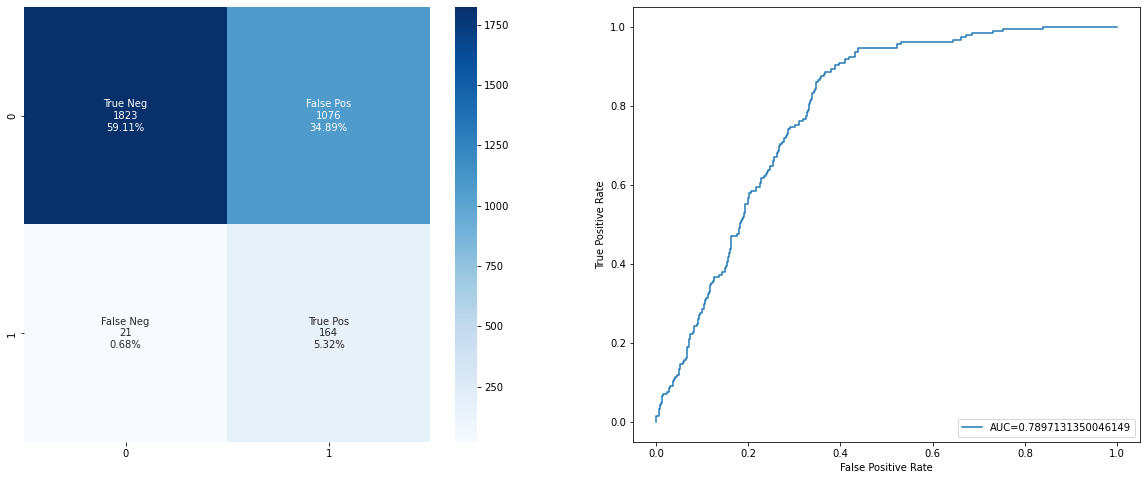

              precision    recall  f1-score   support

         Yes       0.99      0.63      0.77      2899
          No       0.13      0.89      0.23       185

    accuracy                           0.64      3084
   macro avg       0.56      0.76      0.50      3084
weighted avg       0.94      0.64      0.74      3084


DecisionTree.........................................

Accuracy: 0.6802853437094682
F1-Score: 0.2035541195476575


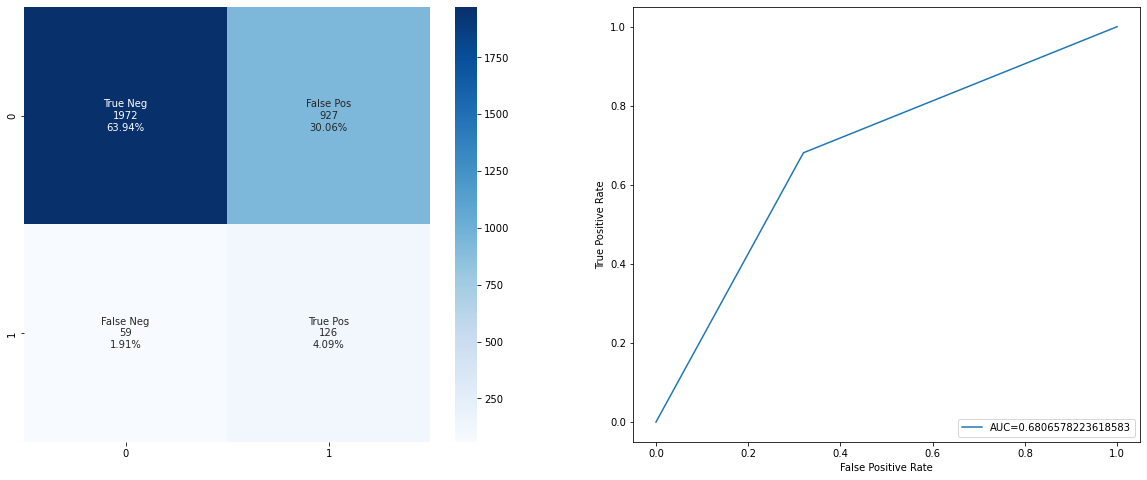

              precision    recall  f1-score   support

         Yes       0.97      0.68      0.80      2899
          No       0.12      0.68      0.20       185

    accuracy                           0.68      3084
   macro avg       0.55      0.68      0.50      3084
weighted avg       0.92      0.68      0.76      3084


RandomForest.........................................

Accuracy: 0.6465629053177692
F1-Score: 0.23562412342215988


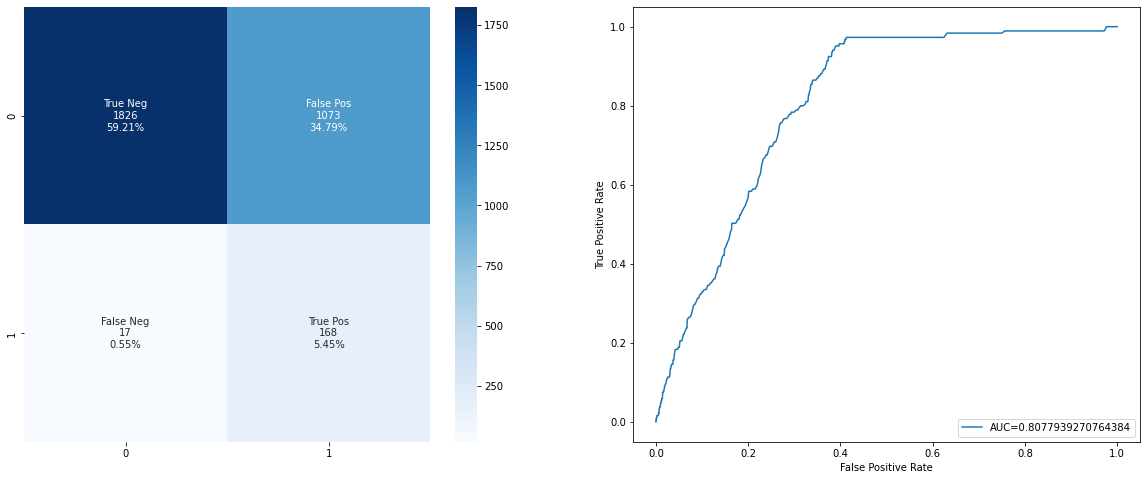

              precision    recall  f1-score   support

         Yes       0.99      0.63      0.77      2899
          No       0.14      0.91      0.24       185

    accuracy                           0.65      3084
   macro avg       0.56      0.77      0.50      3084
weighted avg       0.94      0.65      0.74      3084


KNN..................................................

Accuracy: 0.5658236057068742
F1-Score: 0.14984126984126986


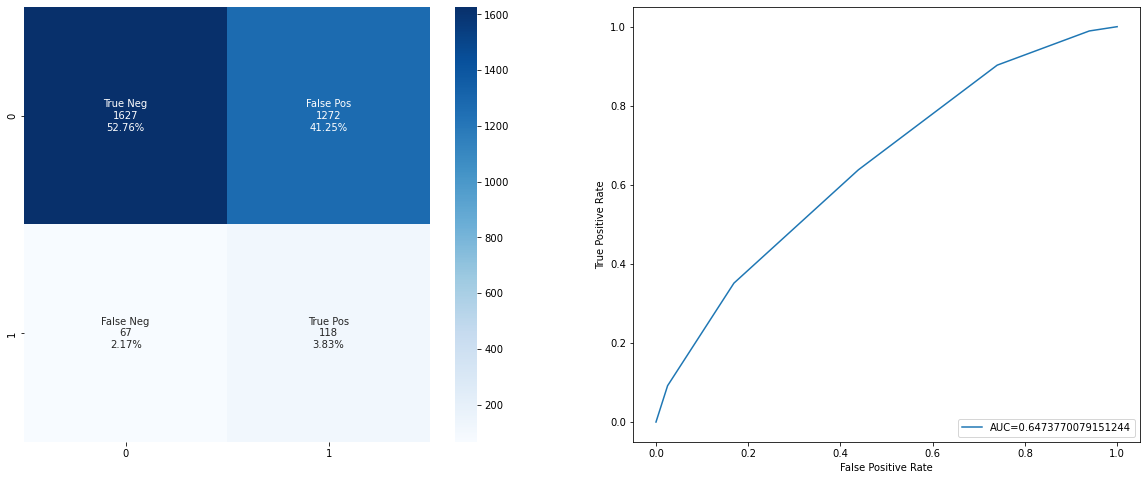

              precision    recall  f1-score   support

         Yes       0.96      0.56      0.71      2899
          No       0.08      0.64      0.15       185

    accuracy                           0.57      3084
   macro avg       0.52      0.60      0.43      3084
weighted avg       0.91      0.57      0.67      3084


SVC..................................................

Accuracy: 0.6024643320363164
F1-Score: 0.21611253196930943


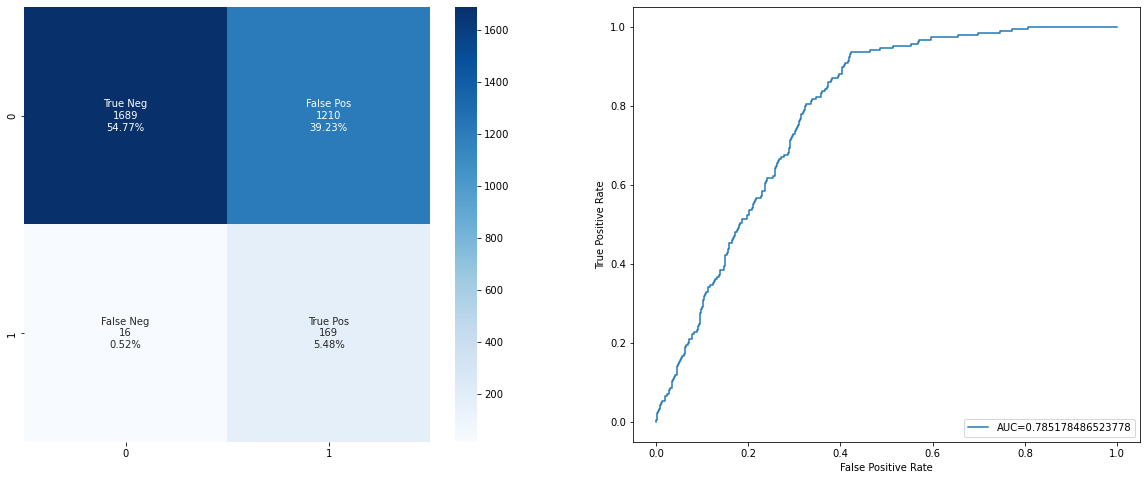

              precision    recall  f1-score   support

         Yes       0.99      0.58      0.73      2899
          No       0.12      0.91      0.22       185

    accuracy                           0.60      3084
   macro avg       0.56      0.75      0.47      3084
weighted avg       0.94      0.60      0.70      3084


F1-Score.............................................

                    0         1
0       Random forest  0.235624
1  LogisticRegression  0.230175
2                 SVC  0.216113
3        DecisionTree  0.203554
4                 KNN  0.149841

Accuracy.............................................

                    0         1
0        DecisionTree  0.680285
1       Random forest  0.646563
2  LogisticRegression  0.644293
3                 SVC  0.602464
4                 KNN  0.565824


In [138]:
modelFeatureAdding = Models_Sampling(undersampled_dataset,testSplitted,'FraudFound_P')
modelFeatureAdding.testClassification()

### Test without stratified 


LogisticRegression...................................

List of possible accuracy: dict_values([0.7532467532467533, 0.7577235772357723, 0.734959349593496])

Maximum Accuracy That can be obtained from this model is: 75.77235772357723 %

Minimum Accuracy: 73.4959349593496 %

Overall Accuracy: 74.86432266920072 %

Standard Deviation is: 0.012060135056977353

List of possible F1-score: dict_values([0.7764705882352942, 0.7766116941529235, 0.7681365576102419])

Maximum F1-score That can be obtained from this model is: 77.66116941529235 %

Minimum F1-score: 76.8136557610242 %

Overall F1-score: 77.373961333282 %

Standard Deviation is: 0.0048529014818696785



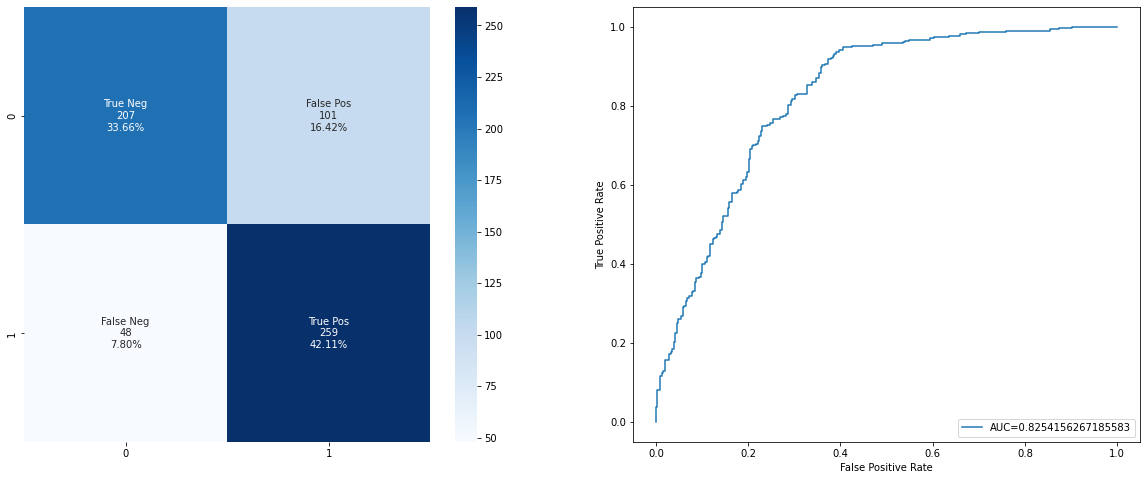

              precision    recall  f1-score   support

         Yes       0.81      0.67      0.74       308
          No       0.72      0.84      0.78       307

    accuracy                           0.76       615
   macro avg       0.77      0.76      0.76       615
weighted avg       0.77      0.76      0.76       615


DecisionTree.........................................

List of possible accuracy: dict_values([0.6672077922077922, 0.7089430894308943, 0.6943089430894309])

Maximum Accuracy That can be obtained from this model is: 70.89430894308944 %

Minimum Accuracy: 66.72077922077922 %

Overall Accuracy: 69.01532749093725 %

Standard Deviation is: 0.021175715857846007

List of possible F1-score: dict_values([0.6611570247933884, 0.7041322314049586, 0.6977491961414791])

Maximum F1-score That can be obtained from this model is: 70.41322314049586 %

Minimum F1-score: 66.11570247933885 %

Overall F1-score: 68.76794841132754 %

Standard Deviation is: 0.023189791311587934



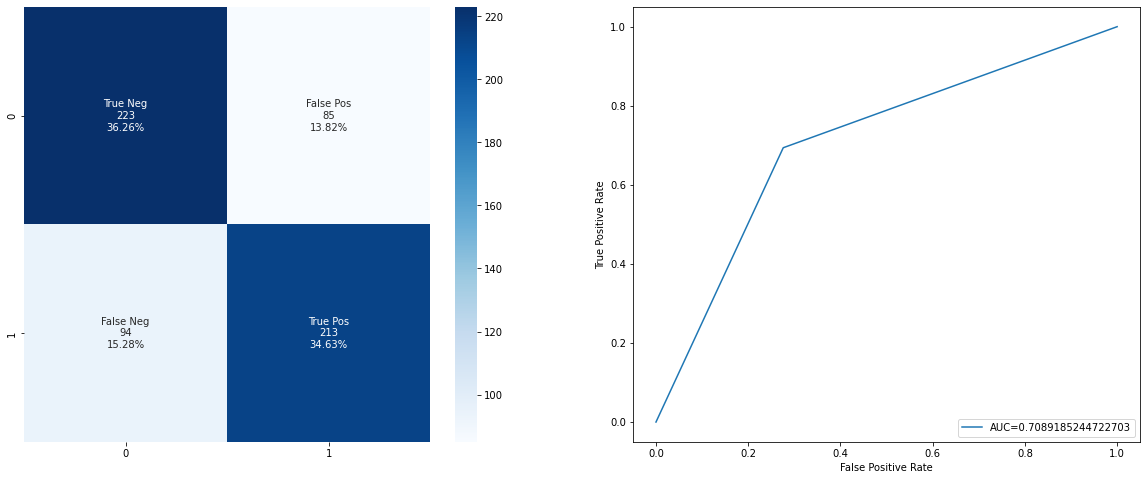

              precision    recall  f1-score   support

         Yes       0.70      0.72      0.71       308
          No       0.71      0.69      0.70       307

    accuracy                           0.71       615
   macro avg       0.71      0.71      0.71       615
weighted avg       0.71      0.71      0.71       615


RandomForest.........................................

List of possible accuracy: dict_values([0.762987012987013, 0.7837398373983739, 0.7609756097560976])

Maximum Accuracy That can be obtained from this model is: 78.3739837398374 %

Minimum Accuracy: 76.09756097560975 %

Overall Accuracy: 76.92341533804948 %

Standard Deviation is: 0.012602483380637693

List of possible F1-score: dict_values([0.7890173410404625, 0.7987897125567321, 0.79382889200561])

Maximum F1-score That can be obtained from this model is: 79.87897125567322 %

Minimum F1-score: 78.90173410404626 %

Overall F1-score: 79.38786485342682 %

Standard Deviation is: 0.00488637575787082



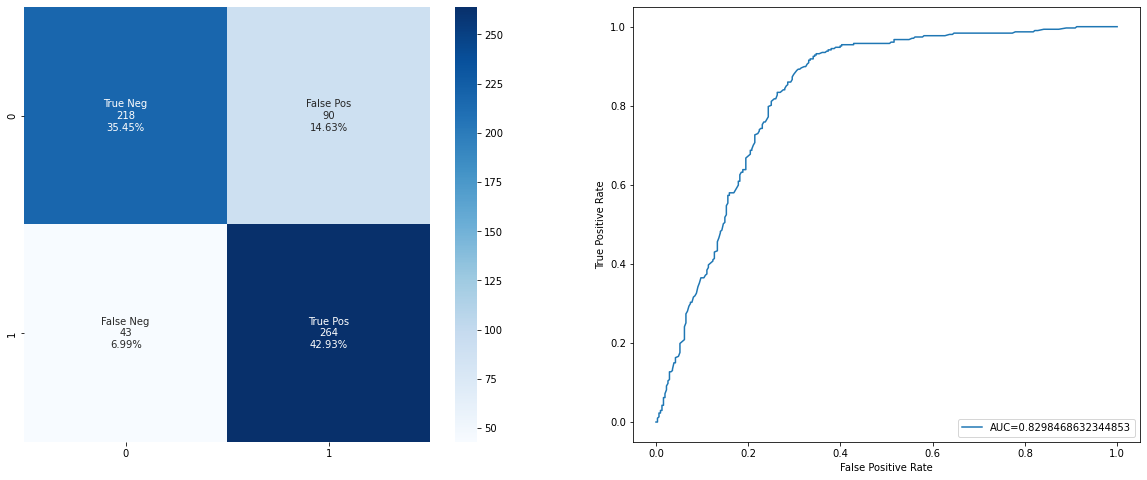

              precision    recall  f1-score   support

         Yes       0.84      0.71      0.77       308
          No       0.75      0.86      0.80       307

    accuracy                           0.78       615
   macro avg       0.79      0.78      0.78       615
weighted avg       0.79      0.78      0.78       615


KNN..................................................

List of possible accuracy: dict_values([0.5422077922077922, 0.5577235772357724, 0.583739837398374])

Maximum Accuracy That can be obtained from this model is: 58.3739837398374 %

Minimum Accuracy: 54.22077922077923 %

Overall Accuracy: 56.12237356139795 %

Standard Deviation is: 0.020986091249504544

List of possible F1-score: dict_values([0.5422077922077922, 0.5641025641025642, 0.6037151702786377])

Maximum F1-score That can be obtained from this model is: 60.371517027863774 %

Minimum F1-score: 54.22077922077923 %

Overall F1-score: 57.0008508862998 %

Standard Deviation is: 0.03117610506337271



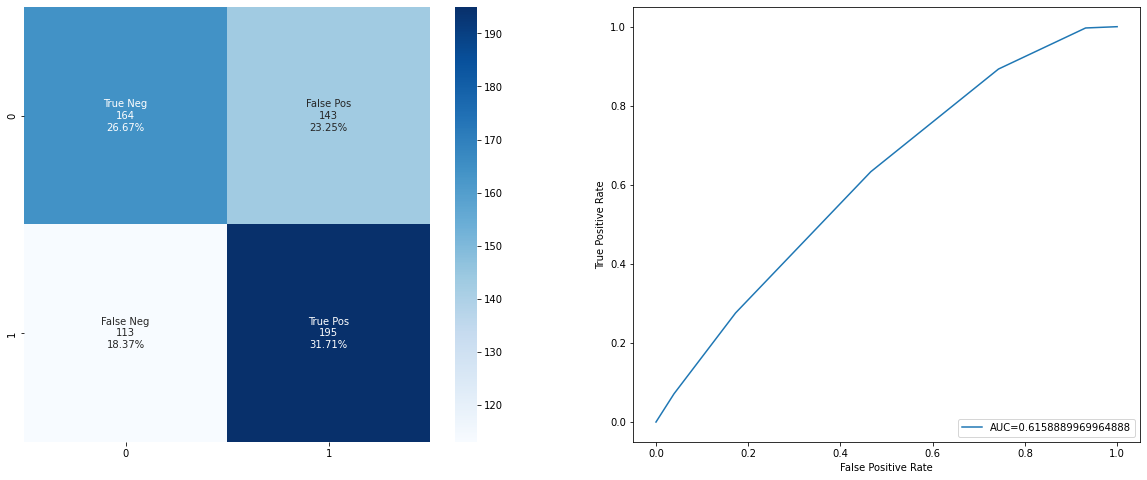

              precision    recall  f1-score   support

         Yes       0.59      0.53      0.56       307
          No       0.58      0.63      0.60       308

    accuracy                           0.58       615
   macro avg       0.58      0.58      0.58       615
weighted avg       0.58      0.58      0.58       615


SVC..................................................

List of possible accuracy: dict_values([0.7467532467532467, 0.759349593495935, 0.7284552845528456])

Maximum Accuracy That can be obtained from this model is: 75.9349593495935 %

Minimum Accuracy: 72.84552845528455 %

Overall Accuracy: 74.48527082673424 %

Standard Deviation is: 0.015534594174617703

List of possible F1-score: dict_values([0.7808988764044943, 0.7879656160458453, 0.7690179806362379])

Maximum F1-score That can be obtained from this model is: 78.79656160458453 %

Minimum F1-score: 76.9017980636238 %

Overall F1-score: 77.92941576955258 %

Standard Deviation is: 0.009575205663850582



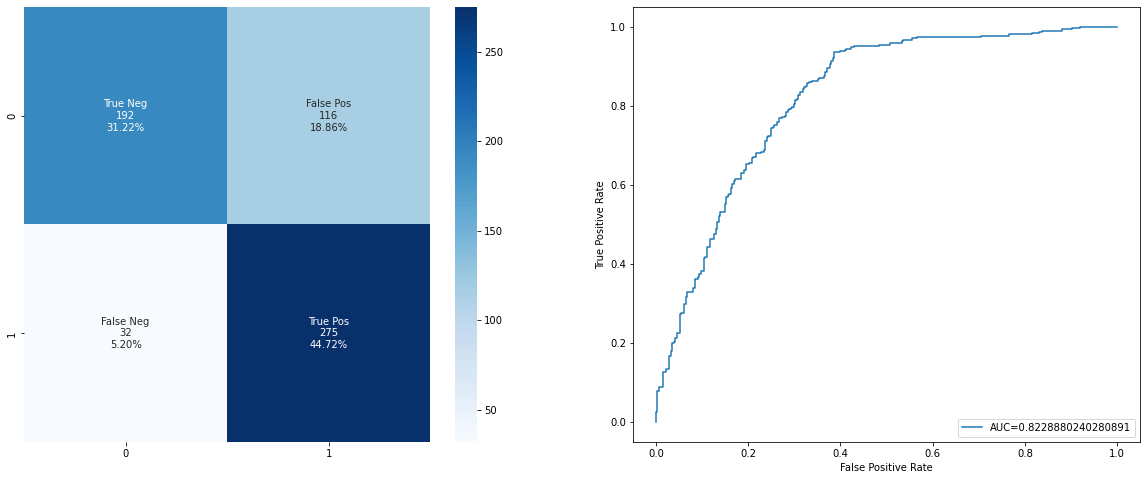

              precision    recall  f1-score   support

         Yes       0.86      0.62      0.72       308
          No       0.70      0.90      0.79       307

    accuracy                           0.76       615
   macro avg       0.78      0.76      0.75       615
weighted avg       0.78      0.76      0.75       615


F1-Score.............................................

                    0          1
0        RandomForest  79.878971
1                 SVC  78.796562
2  LogisticRegression  77.661169
3        DecisionTree  70.413223
4                 KNN  60.371517

Accuracy.............................................

                    0          1
0        RandomForest  78.373984
1                 SVC  75.934959
2  LogisticRegression  75.772358
3        DecisionTree  70.894309
4                 KNN  58.373984


In [139]:
num_1 = len(dataset[dataset[target]==1])
undersample = pd.concat([dataset[dataset[target]==0].sample(num_1) ,
                                  dataset[dataset[target]==1] ])
under = Models_Startified(undersample,'FraudFound_P',3)
under.testClassification()

## Random Oversample 

In [140]:
oversampled_dataset = pd.concat([trainSplitted[trainSplitted[target]==0] , 
                                 trainSplitted[trainSplitted[target]==1].sample(num_0, replace=True) ])

### Stratified


LogisticRegression...................................

Accuracy: 0.642023346303502
F1-Score: 0.2247191011235955


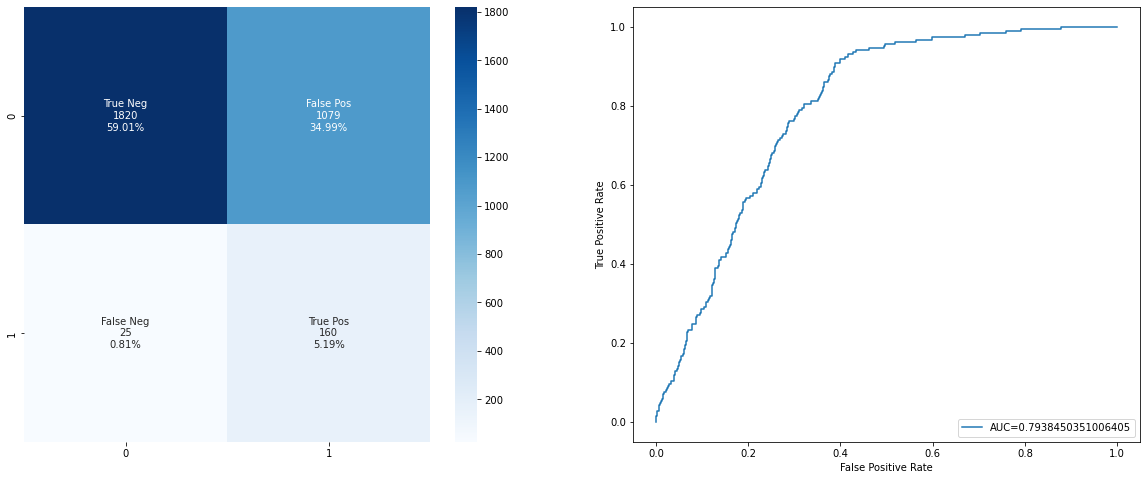

              precision    recall  f1-score   support

         Yes       0.99      0.63      0.77      2899
          No       0.13      0.86      0.22       185

    accuracy                           0.64      3084
   macro avg       0.56      0.75      0.50      3084
weighted avg       0.94      0.64      0.73      3084


DecisionTree.........................................

Accuracy: 0.9014267185473411
F1-Score: 0.18716577540106952


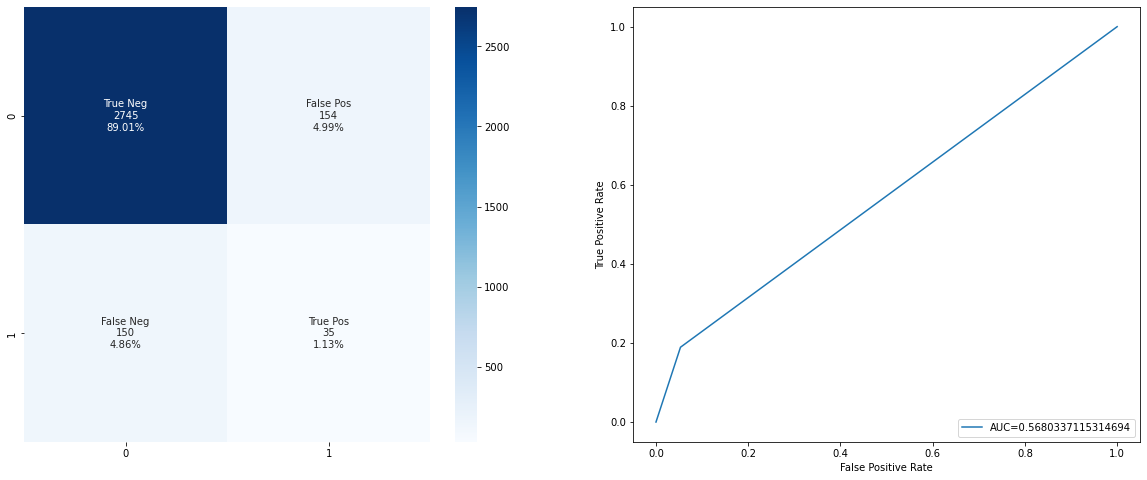

              precision    recall  f1-score   support

         Yes       0.95      0.95      0.95      2899
          No       0.19      0.19      0.19       185

    accuracy                           0.90      3084
   macro avg       0.57      0.57      0.57      3084
weighted avg       0.90      0.90      0.90      3084


RandomForest.........................................

Accuracy: 0.9409857328145266
F1-Score: 0.08080808080808081


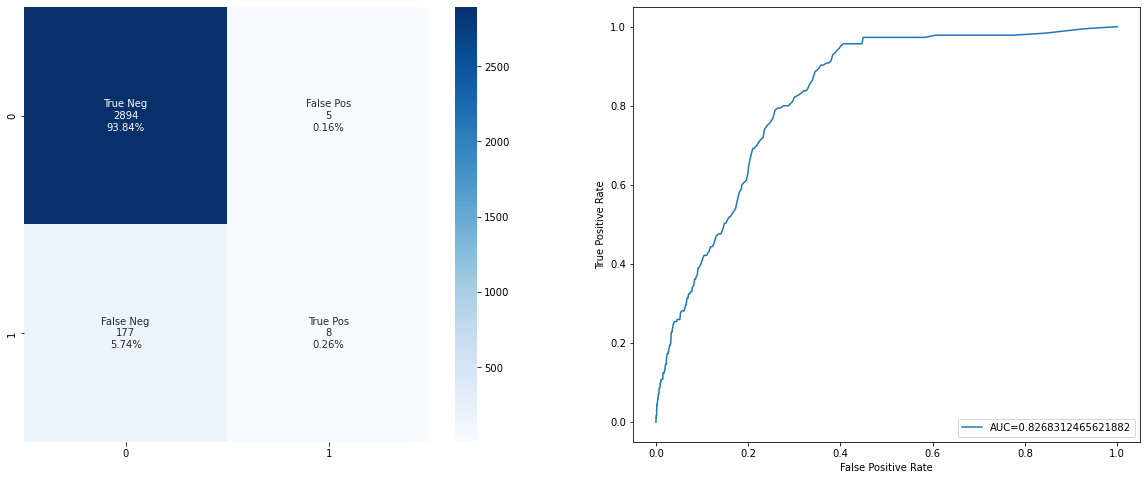

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      2899
          No       0.62      0.04      0.08       185

    accuracy                           0.94      3084
   macro avg       0.78      0.52      0.53      3084
weighted avg       0.92      0.94      0.92      3084


KNN..................................................

Accuracy: 0.8067444876783398
F1-Score: 0.12609970674486803


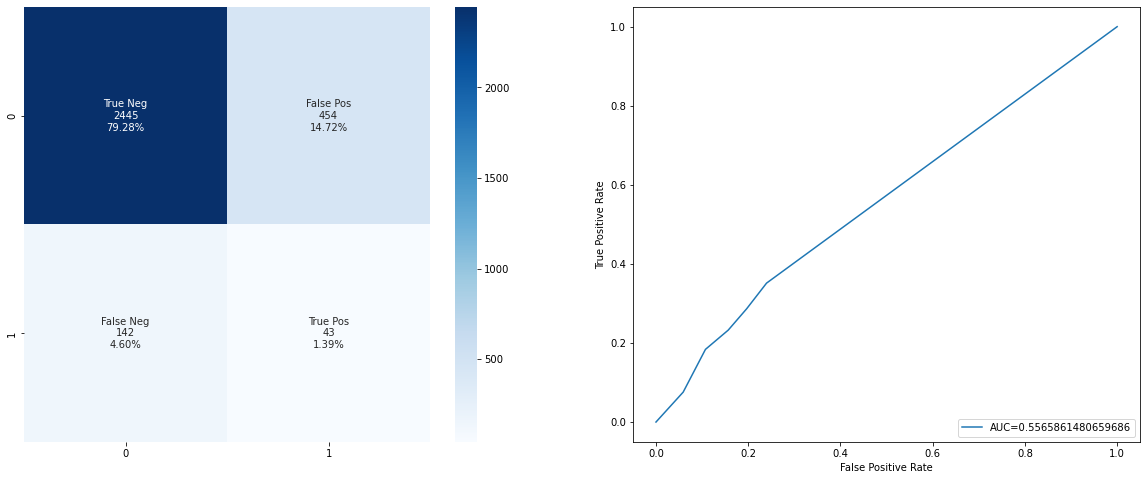

              precision    recall  f1-score   support

         Yes       0.95      0.84      0.89      2899
          No       0.09      0.23      0.13       185

    accuracy                           0.81      3084
   macro avg       0.52      0.54      0.51      3084
weighted avg       0.89      0.81      0.85      3084


SVC..................................................

Accuracy: 0.6092736705577172
F1-Score: 0.22006472491909387


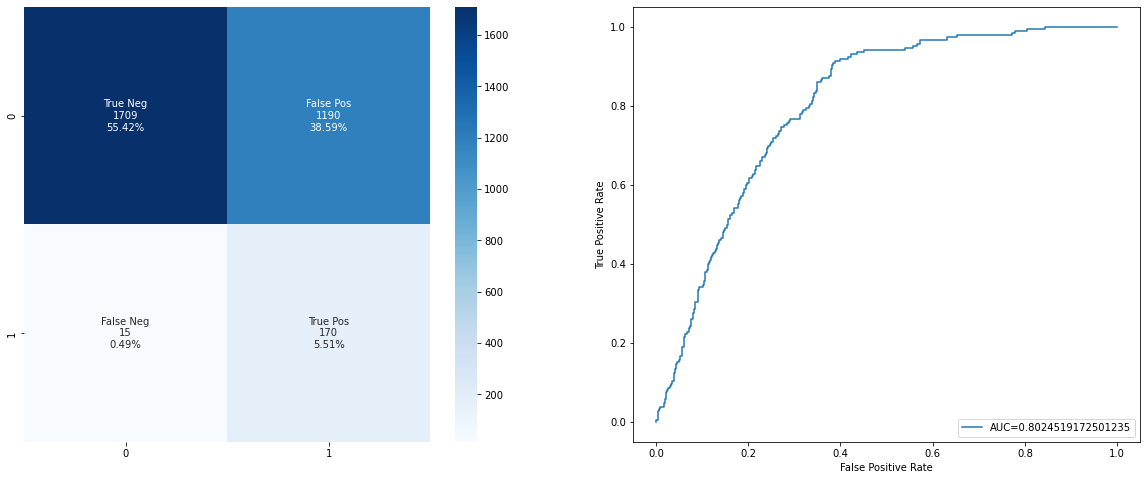

              precision    recall  f1-score   support

         Yes       0.99      0.59      0.74      2899
          No       0.12      0.92      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.75      0.48      3084
weighted avg       0.94      0.61      0.71      3084


F1-Score.............................................

                    0         1
0  LogisticRegression  0.224719
1                 SVC  0.220065
2        DecisionTree  0.187166
3                 KNN  0.126100
4       Random forest  0.080808

Accuracy.............................................

                    0         1
0       Random forest  0.940986
1        DecisionTree  0.901427
2                 KNN  0.806744
3  LogisticRegression  0.642023
4                 SVC  0.609274


In [141]:
oversample = Models_Sampling(oversampled_dataset,testSplitted,'FraudFound_P')
oversample.testClassification()

### Without stratified

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression...................................

List of possible accuracy: dict_values([0.7526903973509934, 0.7510347682119205, 0.7469991721854304])

Maximum Accuracy That can be obtained from this model is: 75.26903973509934 %

Minimum Accuracy: 74.69991721854305 %

Overall Accuracy: 75.02414459161147 %

Standard Deviation is: 0.0029273761579358343

List of possible F1-score: dict_values([0.7826086956521738, 0.7805945650191501, 0.7782312925170067])

Maximum F1-score That can be obtained from this model is: 78.26086956521738 %

Minimum F1-score: 77.82312925170068 %

Overall F1-score: 78.04781843961102 %

Standard Deviation is: 0.0021910209695498264



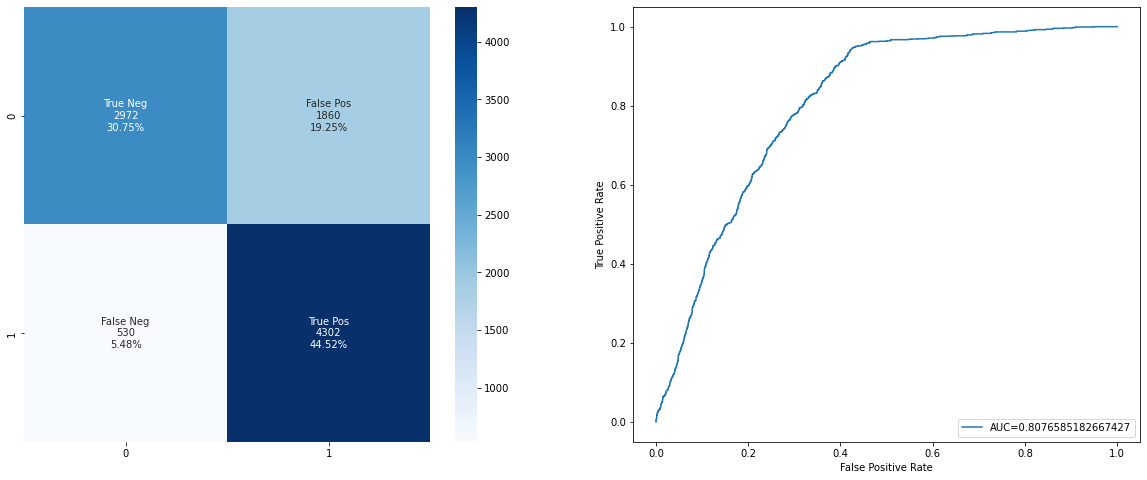

              precision    recall  f1-score   support

         Yes       0.85      0.62      0.71      4832
          No       0.70      0.89      0.78      4832

    accuracy                           0.75      9664
   macro avg       0.77      0.75      0.75      9664
weighted avg       0.77      0.75      0.75      9664


DecisionTree.........................................

List of possible accuracy: dict_values([0.9640935430463576, 0.9680256622516556, 0.9639900662251656])

Maximum Accuracy That can be obtained from this model is: 96.80256622516556 %

Minimum Accuracy: 96.39900662251655 %

Overall Accuracy: 96.5369757174393 %

Standard Deviation is: 0.0023006630995657125

List of possible F1-score: dict_values([0.965338128059135, 0.9690163441291488, 0.9651791074644788])

Maximum F1-score That can be obtained from this model is: 96.90163441291489 %

Minimum F1-score: 96.51791074644788 %

Overall F1-score: 96.65111932175876 %

Standard Deviation is: 0.00217098081627948



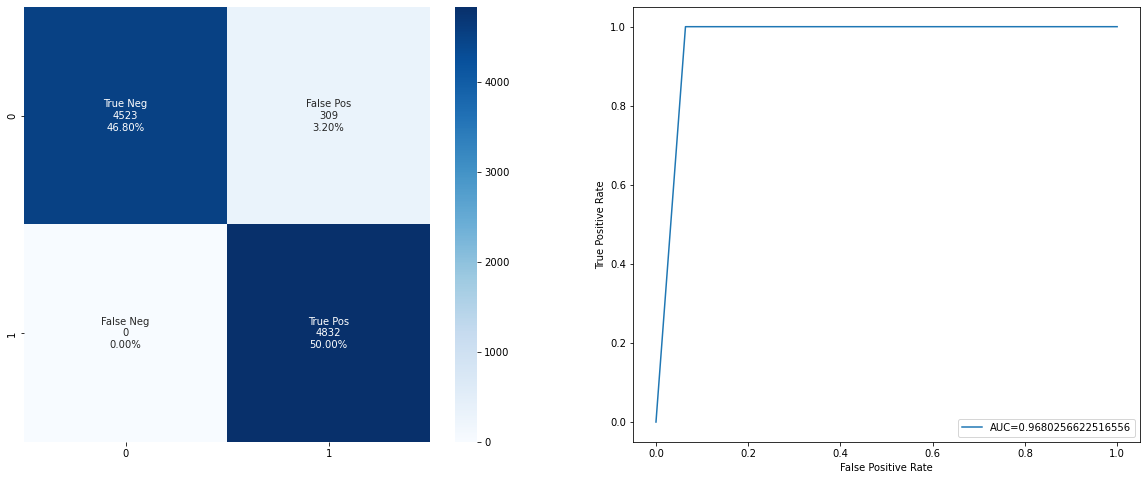

              precision    recall  f1-score   support

         Yes       1.00      0.94      0.97      4832
          No       0.94      1.00      0.97      4832

    accuracy                           0.97      9664
   macro avg       0.97      0.97      0.97      9664
weighted avg       0.97      0.97      0.97      9664


RandomForest.........................................

List of possible accuracy: dict_values([0.9965852649006622, 0.9976200331125827, 0.9955504966887417])

Maximum Accuracy That can be obtained from this model is: 99.76200331125827 %

Minimum Accuracy: 99.55504966887418 %

Overall Accuracy: 99.65852649006622 %

Standard Deviation is: 0.0010347682119205004

List of possible F1-score: dict_values([0.9965968856347325, 0.9976256839062662, 0.995570207067065])

Maximum F1-score That can be obtained from this model is: 99.76256839062661 %

Minimum F1-score: 99.5570207067065 %

Overall F1-score: 99.65975922026878 %

Standard Deviation is: 0.0010277386017620424



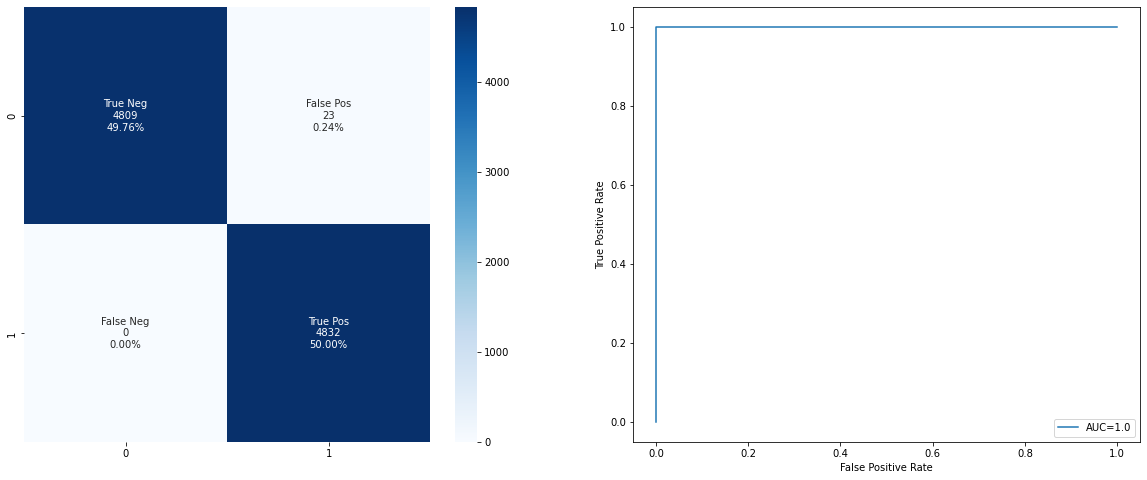

              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00      4832
          No       1.00      1.00      1.00      4832

    accuracy                           1.00      9664
   macro avg       1.00      1.00      1.00      9664
weighted avg       1.00      1.00      1.00      9664


KNN..................................................

List of possible accuracy: dict_values([0.8930049668874173, 0.8966266556291391, 0.890521523178808])

Maximum Accuracy That can be obtained from this model is: 89.66266556291392 %

Minimum Accuracy: 89.0521523178808 %

Overall Accuracy: 89.33843818984548 %

Standard Deviation is: 0.0030701998912077587

List of possible F1-score: dict_values([0.902892561983471, 0.9061883744952578, 0.9011769101438446])

Maximum F1-score That can be obtained from this model is: 90.61883744952578 %

Minimum F1-score: 90.11769101438446 %

Overall F1-score: 90.34192822075244 %

Standard Deviation is: 0.0025469136974368644



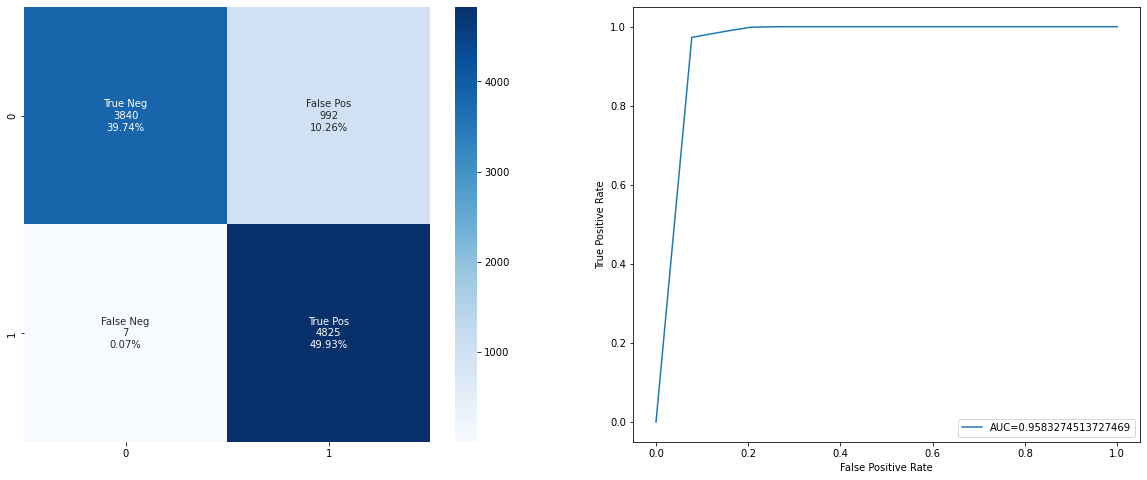

              precision    recall  f1-score   support

         Yes       1.00      0.79      0.88      4832
          No       0.83      1.00      0.91      4832

    accuracy                           0.90      9664
   macro avg       0.91      0.90      0.90      9664
weighted avg       0.91      0.90      0.90      9664



In [ ]:
num_1 = len(dataset[dataset[target]==1])
num_0 = len(dataset[dataset[target]==0])
overSample = pd.concat([dataset[dataset[target]==0] , dataset[dataset[target]==1].sample(num_0, replace=True) ])
over = Models_Startified(overSample,'FraudFound_P',3)
over.testClassification()

<a name="1.4.2"></a>
## Oversampling using SMOTE

In [140]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [141]:
smoteDataset_minority = pd.concat([X_sm, y_sm], axis=1, join="inner")

In [142]:
getZeroOne(smoteDataset_minority)

dataset shape   : (23194, 76)
Number of zeros : 11597 50.0
Number of ones  : 11597 50.0


### Test with stratified dataset

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression...................................

Accuracy: 0.9286640726329443
F1-Score: 0.09836065573770493


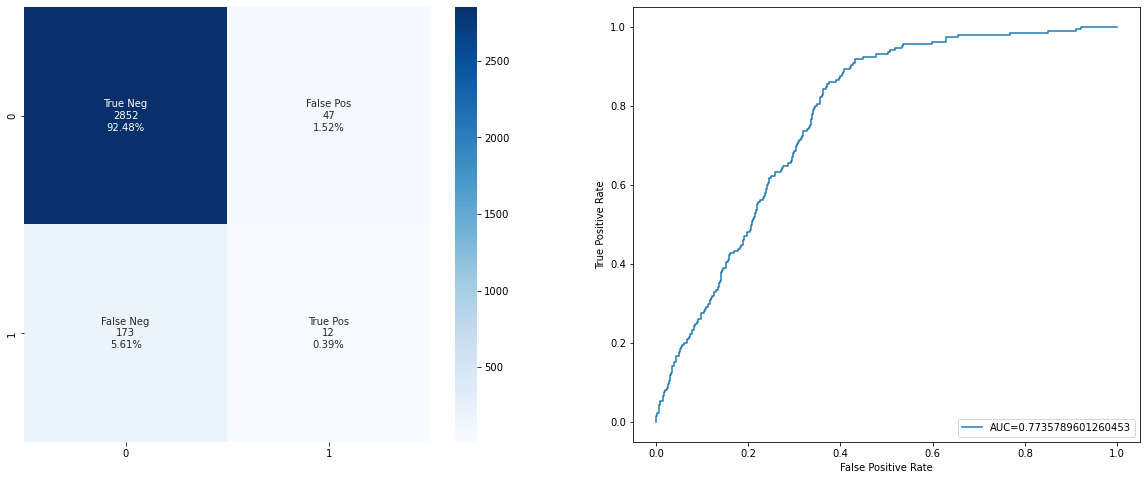

              precision    recall  f1-score   support

         Yes       0.94      0.98      0.96      2899
          No       0.20      0.06      0.10       185

    accuracy                           0.93      3084
   macro avg       0.57      0.52      0.53      3084
weighted avg       0.90      0.93      0.91      3084


DecisionTree.........................................

Accuracy: 0.8897535667963683
F1-Score: 0.18269230769230774


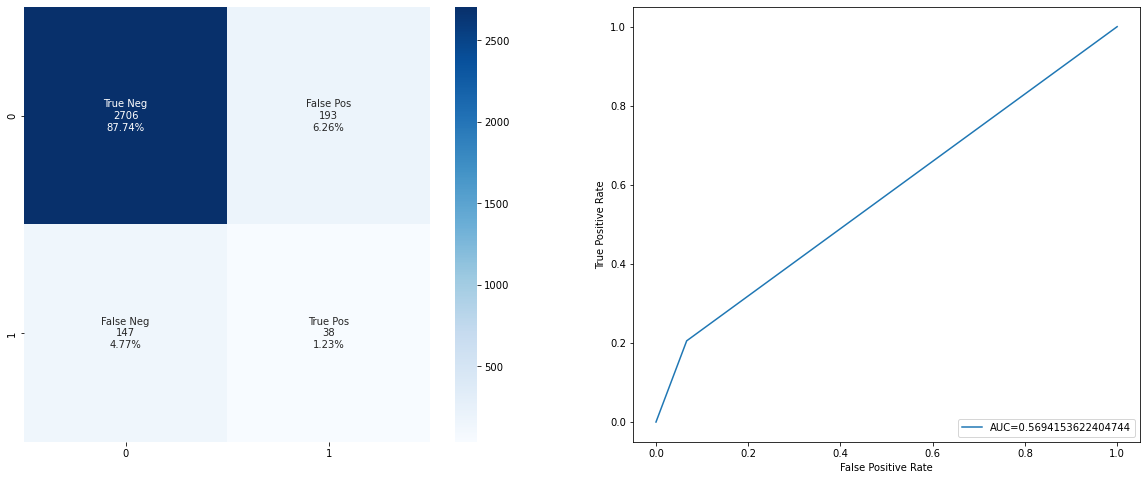

              precision    recall  f1-score   support

         Yes       0.95      0.93      0.94      2899
          No       0.16      0.21      0.18       185

    accuracy                           0.89      3084
   macro avg       0.56      0.57      0.56      3084
weighted avg       0.90      0.89      0.90      3084


RandomForest.........................................

Accuracy: 0.9367704280155642
F1-Score: 0.06698564593301436


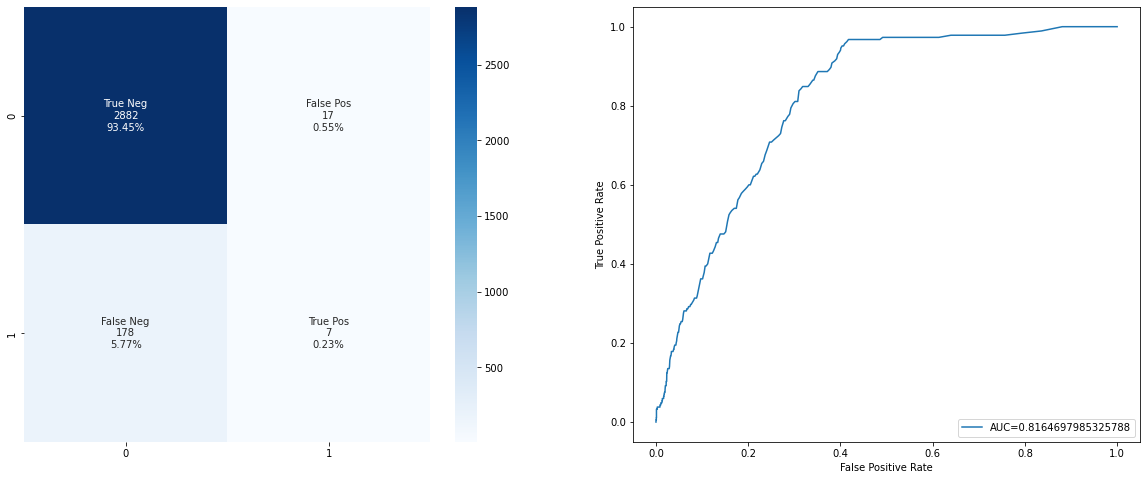

              precision    recall  f1-score   support

         Yes       0.94      0.99      0.97      2899
          No       0.29      0.04      0.07       185

    accuracy                           0.94      3084
   macro avg       0.62      0.52      0.52      3084
weighted avg       0.90      0.94      0.91      3084


KNN..................................................

Accuracy: 0.6825551232166018
F1-Score: 0.12354521038495972


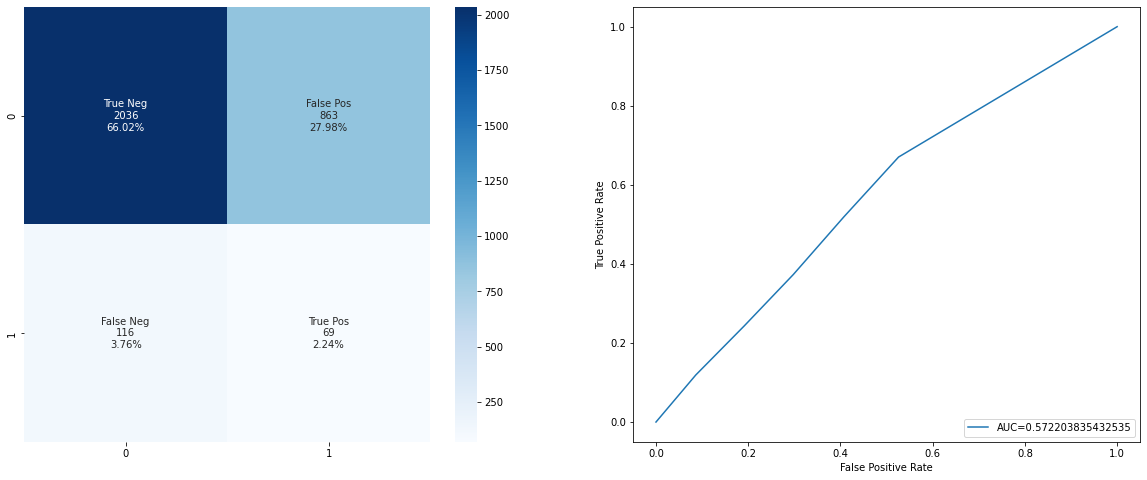

              precision    recall  f1-score   support

         Yes       0.95      0.70      0.81      2899
          No       0.07      0.37      0.12       185

    accuracy                           0.68      3084
   macro avg       0.51      0.54      0.46      3084
weighted avg       0.89      0.68      0.77      3084


F1-Score.............................................

                    0         1
0        DecisionTree  0.182692
1                 KNN  0.123545
2  LogisticRegression  0.098361
3       Random forest  0.066986

Accuracy.............................................

                    0         1
0       Random forest  0.936770
1  LogisticRegression  0.928664
2        DecisionTree  0.889754
3                 KNN  0.682555


In [143]:
modelSmote= Models_Sampling(smoteDataset_minority,testSplitted,'FraudFound_P')
modelSmote.testClassification()

### Test without stratified

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc


LogisticRegression...................................

List of possible accuracy: dict_values([0.9458096223486808, 0.9403699392057948, 0.9463200103479498])

Maximum Accuracy That can be obtained from this model is: 94.63200103479498 %

Minimum Accuracy: 94.03699392057948 %

Overall Accuracy: 94.41665239674751 %

Standard Deviation is: 0.0032978274465042677

List of possible F1-score: dict_values([0.9436449226630801, 0.9378957294894247, 0.9443774292990216])

Maximum F1-score That can be obtained from this model is: 94.43774292990216 %

Minimum F1-score: 93.78957294894246 %

Overall F1-score: 94.19726938171755 %

Standard Deviation is: 0.003549700000033635



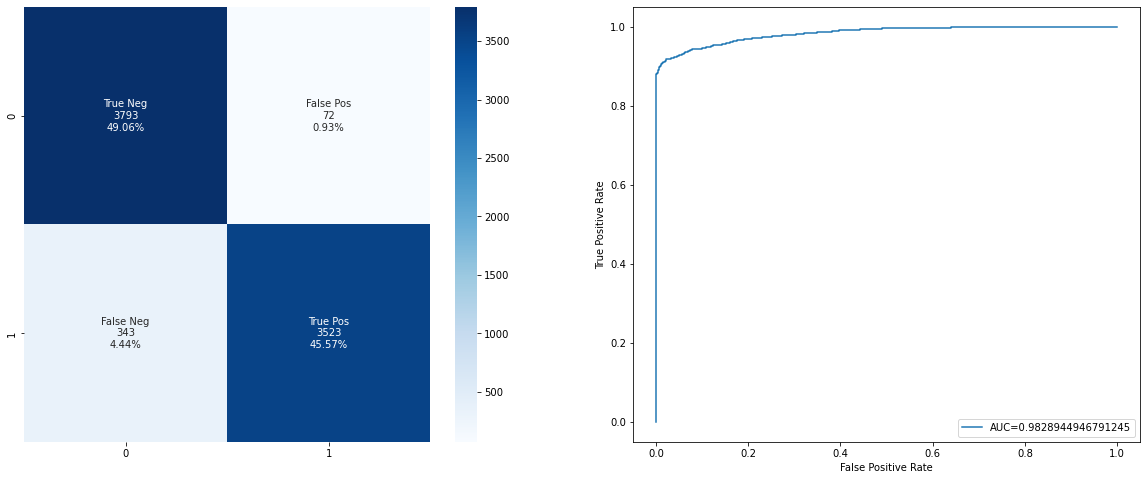

              precision    recall  f1-score   support

         Yes       0.92      0.98      0.95      3865
          No       0.98      0.91      0.94      3866

    accuracy                           0.95      7731
   macro avg       0.95      0.95      0.95      7731
weighted avg       0.95      0.95      0.95      7731


DecisionTree.........................................

List of possible accuracy: dict_values([0.9355923435075013, 0.9340318199456733, 0.9326089768464623])

Maximum Accuracy That can be obtained from this model is: 93.55923435075013 %

Minimum Accuracy: 93.26089768464622 %

Overall Accuracy: 93.40777134332123 %

Standard Deviation is: 0.0014922127253507397

List of possible F1-score: dict_values([0.9363171355498722, 0.9347992840705703, 0.9334525482181634])

Maximum F1-score That can be obtained from this model is: 93.63171355498721 %

Minimum F1-score: 93.34525482181634 %

Overall F1-score: 93.48563226128687 %

Standard Deviation is: 0.0014331452095748263



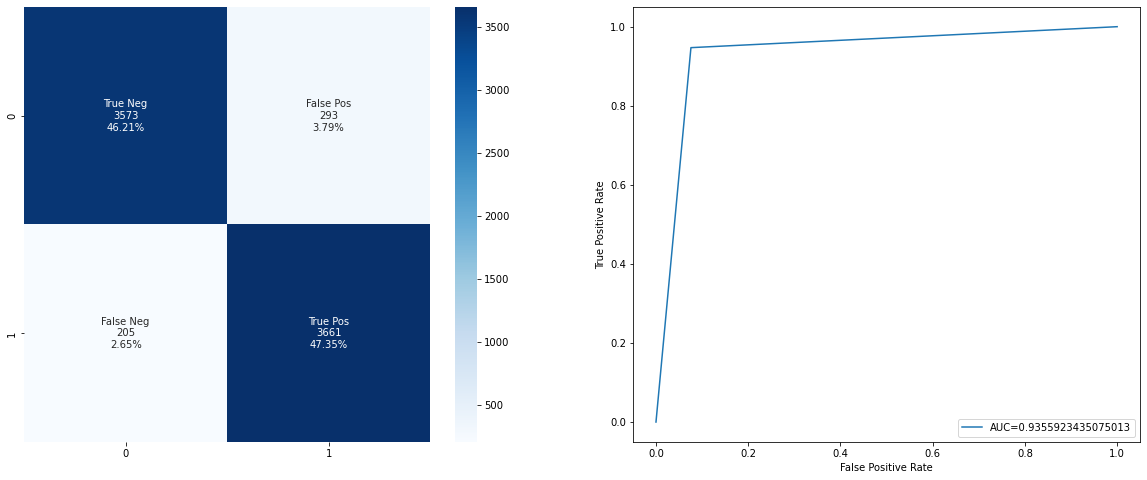

              precision    recall  f1-score   support

         Yes       0.95      0.92      0.93      3866
          No       0.93      0.95      0.94      3866

    accuracy                           0.94      7732
   macro avg       0.94      0.94      0.94      7732
weighted avg       0.94      0.94      0.94      7732


RandomForest.........................................

List of possible accuracy: dict_values([0.9711588204862908, 0.9699909455439141, 0.972577932997025])

Maximum Accuracy That can be obtained from this model is: 97.2577932997025 %

Minimum Accuracy: 96.9990945543914 %

Overall Accuracy: 97.124256634241 %

Standard Deviation is: 0.0012955253941745741

List of possible F1-score: dict_values([0.9707156927117532, 0.96932028563872, 0.9721199368753288])

Maximum F1-score That can be obtained from this model is: 97.21199368753288 %

Minimum F1-score: 96.932028563872 %

Overall F1-score: 97.07186384086006 %

Standard Deviation is: 0.0013998279428232652



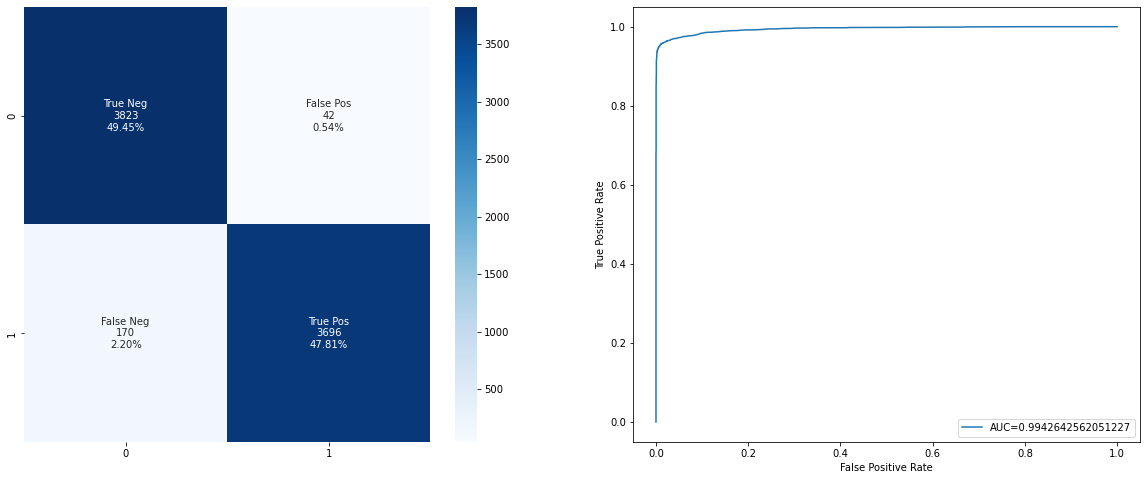

              precision    recall  f1-score   support

         Yes       0.96      0.99      0.97      3865
          No       0.99      0.96      0.97      3866

    accuracy                           0.97      7731
   macro avg       0.97      0.97      0.97      7731
weighted avg       0.97      0.97      0.97      7731


KNN..................................................

List of possible accuracy: dict_values([0.8290222452146921, 0.840512223515716, 0.8425818134782046])

Maximum Accuracy That can be obtained from this model is: 84.25818134782045 %

Minimum Accuracy: 82.90222452146921 %

Overall Accuracy: 83.73720940695377 %

Standard Deviation is: 0.007304846512917369

List of possible F1-score: dict_values([0.8539871879832117, 0.8624037495815199, 0.8640071516370544])

Maximum F1-score That can be obtained from this model is: 86.40071516370544 %

Minimum F1-score: 85.39871879832117 %

Overall F1-score: 86.01326964005953 %

Standard Deviation is: 0.0053822095666206556



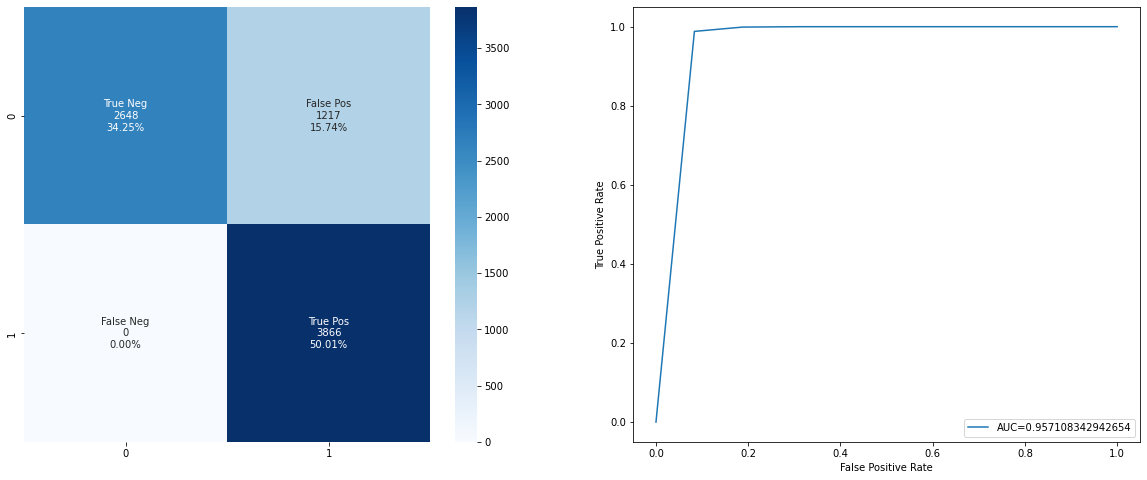

              precision    recall  f1-score   support

         Yes       1.00      0.69      0.81      3865
          No       0.76      1.00      0.86      3866

    accuracy                           0.84      7731
   macro avg       0.88      0.84      0.84      7731
weighted avg       0.88      0.84      0.84      7731


SVC..................................................

List of possible accuracy: dict_values([0.9416709777547853, 0.9367481567714396, 0.9416634329323503])

Maximum Accuracy That can be obtained from this model is: 94.16709777547852 %

Minimum Accuracy: 93.67481567714397 %

Overall Accuracy: 94.00275224861917 %

Standard Deviation is: 0.0028400165227345227

List of possible F1-score: dict_values([0.9384804255899605, 0.9328204423684572, 0.938362716960503])

Maximum F1-score That can be obtained from this model is: 93.84804255899604 %

Minimum F1-score: 93.28204423684572 %

Overall F1-score: 93.6554528306307 %

Standard Deviation is: 0.003234348802123445



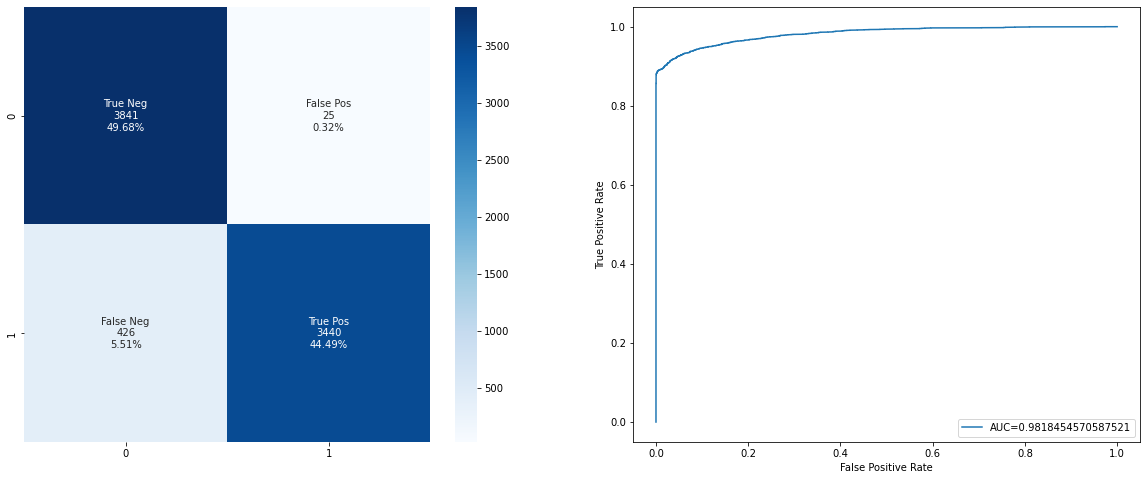

              precision    recall  f1-score   support

         Yes       0.90      0.99      0.94      3866
          No       0.99      0.89      0.94      3866

    accuracy                           0.94      7732
   macro avg       0.95      0.94      0.94      7732
weighted avg       0.95      0.94      0.94      7732


F1-Score.............................................

                    0          1
0        RandomForest  97.211994
1  LogisticRegression  94.437743
2                 SVC  93.848043
3        DecisionTree  93.631714
4                 KNN  86.400715

Accuracy.............................................

                    0          1
0        RandomForest  97.257793
1  LogisticRegression  94.632001
2                 SVC  94.167098
3        DecisionTree  93.559234
4                 KNN  84.258181


In [144]:
smote = Models_Startified(smoteDataset_minority,'FraudFound_P',3)
smote.testClassification()

- [Models](#1.1.2)
- [Models_stratifed](#1.4)
- [Models_sampling](#1.4.1)
- [Models_weighted](#1.4.3)

<a name="1.4.3"></a>
### Class weights in the models

In [145]:
class Models_Startified_WeightClass():
    
    def __init__(self, dataset, target,Ksplit,zero,one):
        self.zero = zero
        self.one = one
        self.Ksplit = Ksplit
        self.dataset = dataset
        self.target = target
        self.X = self.dataset[dataset.columns.difference([self.target])]
        self.Y = self.dataset[self.target]
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, 
                                                                                test_size = 1/5, random_state = 0 )
        self.dictAccuracy = {}
        self.dictF1       = {}
        self.skf = StratifiedKFold(n_splits=self.Ksplit, shuffle=True, random_state=1)
    


    

    def confusionMat(self, Y_test, y_pred,y_prob):
        cf_matrix = confusion_matrix(Y_test, y_pred)
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        fpr, tpr, thresh = roc_curve(Y_test, y_prob, pos_label=1)
        auc = roc_auc_score(Y_test, y_prob)
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))
        sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',ax=ax[0])
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
    
        
    def possibility_acc_f1(self,dictAcc,dictF1):
        print('List of possible accuracy:', dictAcc.values())
        print('\nMaximum Accuracy That can be obtained from this model is:',
              max(dictAcc.values())*100, '%')
        print('\nMinimum Accuracy:',
              min(dictAcc.values())*100, '%')
        print('\nOverall Accuracy:',
              mean(dictAcc.values())*100, '%')
        print('\nStandard Deviation is:', stdev(dictAcc.values()))
        print()
        print('List of possible F1-score:', dictF1.values())
        print('\nMaximum F1-score That can be obtained from this model is:',
              max(dictF1.values())*100, '%')
        print('\nMinimum F1-score:',
              min(dictF1.values())*100, '%')
        print('\nOverall F1-score:',
              mean(dictF1.values())*100, '%')
        print('\nStandard Deviation is:', stdev(dictF1.values()))
        print()
       
    
    #Logistic
    def Logistic(self):
        #Define dictionaries for possible folds
        log_accu_stratified = {}
        log_f1_stratified = {}
        Y_pred ={}
        Y_test ={}
        Y_prob = {}
        
        #Define Model
        logreg = LogisticRegression(random_state=16, max_iter=1000,class_weight={0:self.zero,1:self.one})
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n] = y_test_fold
            
            logreg.fit(x_train_fold, y_train_fold)
            y_prediction = logreg.predict(x_test_fold)
            y_prob = logreg.predict_proba(x_test_fold)[:, 1]
            
            log_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            log_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction         
            Y_prob[n] =  y_prob
            
        print("\nLogisticRegression...................................\n") 
        self.possibility_acc_f1(log_accu_stratified,log_f1_stratified)
        
        self.dictAccuracy['LogisticRegression'] =  max(log_accu_stratified.values())*100
        self.dictF1['LogisticRegression'] = max(log_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(log_f1_stratified, key=lambda x:log_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
    
     
        
    #Decison Tree
    def DT(self,plt):
        #Define dictionaries for possible folds
        dt_accu_stratified = {}
        dt_f1_stratified = {}
        Y_pred ={}
        Y_prob = {}
        feat_importance={}
        Y_test ={}
        #Define Model
        dtc = DecisionTreeClassifier(class_weight={0:self.zero,1:self.one})
        #Fold counter
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n] = y_test_fold
            dtc.fit(x_train_fold, y_train_fold)
            y_prediction = dtc.predict(x_test_fold)
            y_prob = dtc.predict_proba(x_test_fold)[:, 1]

            dt_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            dt_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction   
            Y_prob[n] = y_prob 

            feat_importance[n]= dtc.feature_importances_ 

        print("\nDecisionTree.........................................\n")
        self.possibility_acc_f1(dt_accu_stratified,dt_f1_stratified)
        self.dictAccuracy['DecisionTree'] =  max(dt_accu_stratified.values())*100
        self.dictF1['DecisionTree'] = max(dt_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(dt_f1_stratified, key=lambda x:dt_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
        if plt:
            self.decisonFeature(self.dataset.columns.difference([target])
                           ,feat_importance[max_n])
            
            

    #Random forest 
    def RF(self):
        #Define dictionaries for possible folds
        rf_accu_stratified = {}
        rf_f1_stratified = {}
        Y_pred ={}
        Y_test = {}
        Y_prob = {}

        #Define Model
        rf = RandomForestClassifier(n_estimators=500, random_state=42,class_weight={0:self.zero,1:self.one})
        #Fold counter
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n]=y_test_fold
            rf.fit(x_train_fold, y_train_fold)
            y_prediction = rf.predict(x_test_fold)
            y_prob = rf.predict_proba(x_test_fold)[:, 1]
            
            rf_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            rf_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction   
            Y_prob[n] =  y_prob

        print("\nRandomForest.........................................\n")
        self.possibility_acc_f1(rf_accu_stratified,rf_f1_stratified)
        self.dictAccuracy['RandomForest'] =  max(rf_accu_stratified.values())*100
        self.dictF1['RandomForest'] = max(rf_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(rf_f1_stratified, key=lambda x:rf_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
    

    
    #SVC
    def SVC(self,kernel):
        #Define dictionaries for possible folds
        svc_accu_stratified = {}
        svc_f1_stratified = {}
        Y_pred ={}
        Y_test={}
        Y_prob = {}
        #Define Model
        clf = SVC(kernel=kernel,class_weight={0:self.zero,1:self.one})
        #Fold counter
        n = 0
        for train_index, test_index in self.skf.split(self.X ,self.Y):
            n=n+1
            x_train_fold, x_test_fold = self.X.values[train_index], self.X.values[test_index]
            y_train_fold, y_test_fold = self.Y.values[train_index],self.Y.values[test_index]
            Y_test[n]=y_test_fold
            clf.fit(x_train_fold, y_train_fold)
            y_prediction = clf.predict(x_test_fold)
            y_prob = clf.predict_proba(x_test_fold)[:, 1]
            svc_accu_stratified[n] = accuracy_score(y_test_fold ,y_prediction)
            svc_f1_stratified[n]   = f1_score(y_test_fold,y_prediction)
            Y_pred[n] = y_prediction 
            Y_prob[n] = y_prob

        print("\nSVC..................................................\n")
        self.possibility_acc_f1(svc_accu_stratified,svc_f1_stratified)
        self.dictAccuracy['SVC'] =  max(svc_accu_stratified.values())*100
        self.dictF1['SVC'] = max(svc_f1_stratified.values())*100
        targetNames = ['Yes', 'No']
        #print confusion matrix and AUC-ROC for maximum F1-score
        max_n = max(svc_f1_stratified, key=lambda x:svc_f1_stratified[x])
        self.confusionMat(Y_test[max_n], Y_pred[max_n],Y_prob[max_n])
        print(classification_report(Y_test[max_n], Y_pred[max_n], target_names=targetNames,zero_division=1))
        
    #Metric Table 
    def table(self):
        self.dictF1 = sorted(self.dictF1.items(), key=lambda x:x[1],reverse=True)
        self.dictAccuracy = sorted(self.dictAccuracy.items(), key=lambda x:x[1] ,reverse=True)
        acc = pd.DataFrame.from_dict(self.dictAccuracy)
        f1 = pd.DataFrame.from_dict(self.dictF1)

        print("\nF1-Score.............................................\n")
        print(f1)
     
        print("\nAccuracy.............................................\n")
        print(acc)
            
    #Feature importance
    def decisonFeature(self ,features ,importances ):
        print("\nFeature Importance...................................\n") 
        wid = len(features) 
        print(wid)
        figure(figsize=(20, wid*2))
        sorted_idx = importances.argsort()
        plt.barh(features[sorted_idx], importances[sorted_idx])
        plt.show()
        
    
    def ROC_AUC(self,Y_test,y_pred):
        fpr, tpr, thresh = roc_curve(Y_test, y_pred, pos_label=1)
        plt.figure(figsize=(8,5))
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    #Output
    def testClassification(self):
        self.Logistic()
        self.DT(False)
        self.RF()
       # self.SVC('linear')
        self.table()

In [146]:
len(dataset)

15419

dataset shape   : (15419, 76)
Number of zeros : 14496 94.01387898047862
Number of ones  : 923 5.98612101952137

In [147]:
w0 = len(dataset) / (2 * 14496)
w1 = len(dataset) / (2 * 923)

In [148]:
WeightClass = Models_Startified_WeightClass(dataset,'FraudFound_P',3,w0,w1)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression...................................

List of possible accuracy: dict_values([0.6371595330739299, 0.632295719844358, 0.6331971200622689])

Maximum Accuracy That can be obtained from this model is: 63.715953307392994 %

Minimum Accuracy: 63.22957198443579 %

Overall Accuracy: 63.42174576601855 %

Standard Deviation is: 0.0025874671772472026

List of possible F1-score: dict_values([0.22838229209764171, 0.2164179104477612, 0.2142559399749896])

Maximum F1-score That can be obtained from this model is: 22.838229209764172 %

Minimum F1-score: 21.42559399749896 %

Overall F1-score: 21.968538084013083 %

Standard Deviation is: 0.007608924243744882



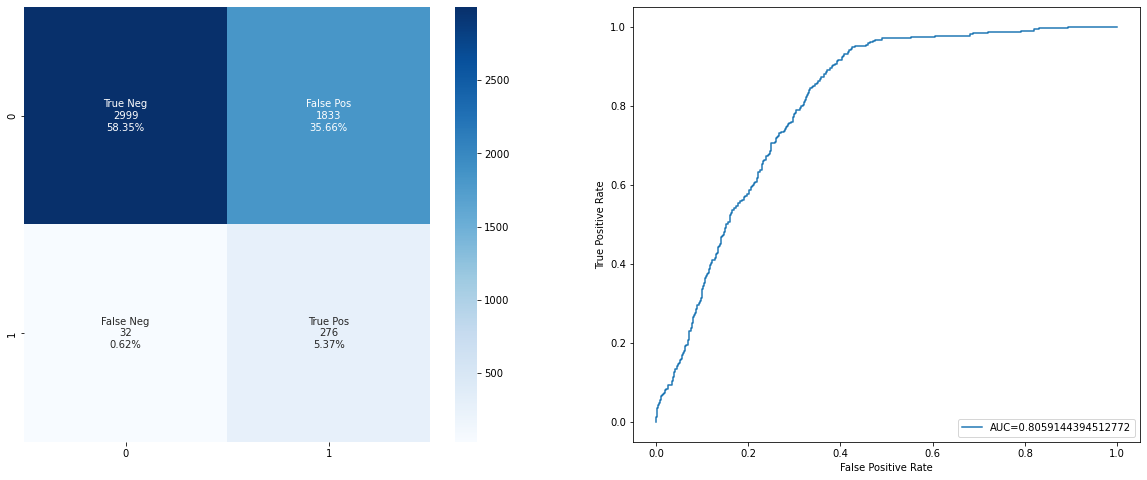

              precision    recall  f1-score   support

         Yes       0.99      0.62      0.76      4832
          No       0.13      0.90      0.23       308

    accuracy                           0.64      5140
   macro avg       0.56      0.76      0.50      5140
weighted avg       0.94      0.64      0.73      5140


DecisionTree.........................................

List of possible accuracy: dict_values([0.9023346303501946, 0.9071984435797665, 0.9122397353570734])

Maximum Accuracy That can be obtained from this model is: 91.22397353570733 %

Minimum Accuracy: 90.23346303501945 %

Overall Accuracy: 90.72576030956782 %

Standard Deviation is: 0.0049528174997233694

List of possible F1-score: dict_values([0.16611295681063123, 0.20100502512562815, 0.24201680672268908])

Maximum F1-score That can be obtained from this model is: 24.201680672268907 %

Minimum F1-score: 16.611295681063122 %

Overall F1-score: 20.30449295529828 %

Standard Deviation is: 0.0379930192985844



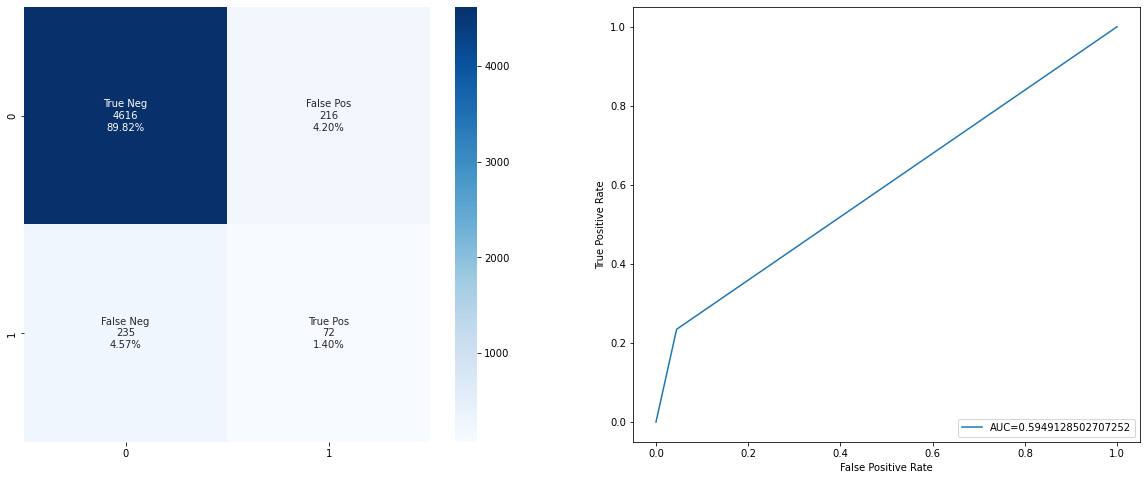

              precision    recall  f1-score   support

         Yes       0.95      0.96      0.95      4832
          No       0.25      0.23      0.24       307

    accuracy                           0.91      5139
   macro avg       0.60      0.59      0.60      5139
weighted avg       0.91      0.91      0.91      5139


RandomForest.........................................

List of possible accuracy: dict_values([0.9398832684824903, 0.940272373540856, 0.9400661607316598])

Maximum Accuracy That can be obtained from this model is: 94.0272373540856 %

Minimum Accuracy: 93.98832684824903 %

Overall Accuracy: 94.00739342516687 %

Standard Deviation is: 0.00019466896856317693

List of possible F1-score: dict_values([0.0, 0.006472491909385114, 0.0])

Maximum F1-score That can be obtained from this model is: 0.6472491909385114 %

Minimum F1-score: 0.0 %

Overall F1-score: 0.21574973031283715 %

Standard Deviation is: 0.00373689494621117



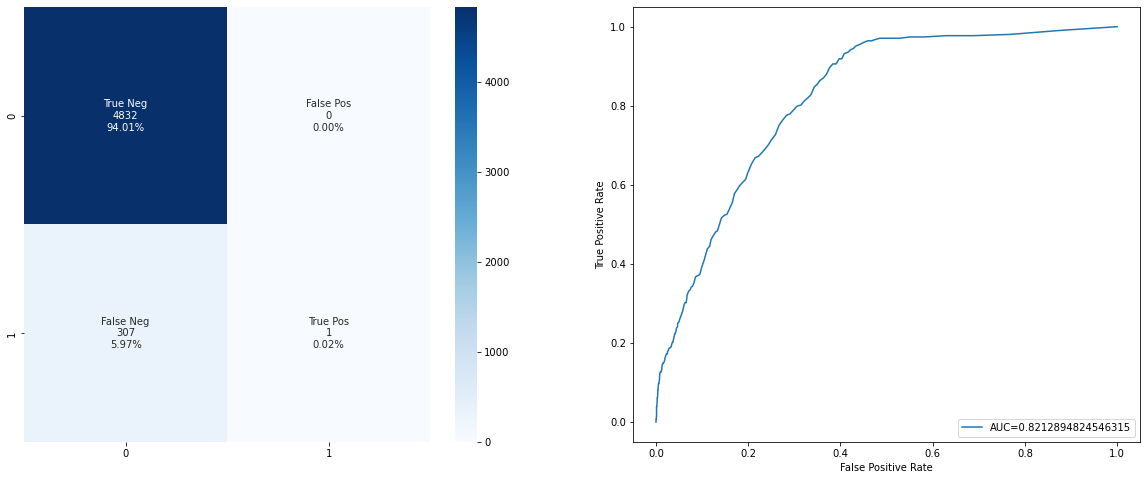

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97      4832
          No       1.00      0.00      0.01       308

    accuracy                           0.94      5140
   macro avg       0.97      0.50      0.49      5140
weighted avg       0.94      0.94      0.91      5140


F1-Score.............................................

                    0          1
0        DecisionTree  24.201681
1  LogisticRegression  22.838229
2        RandomForest   0.647249

Accuracy.............................................

                    0          1
0        RandomForest  94.027237
1        DecisionTree  91.223974
2  LogisticRegression  63.715953


In [149]:
WeightClass.testClassification()

# 

<a name="2"></a>
##  **Exercise 15** 
Implement a Bagging classifier from scratch. You can use sklearn for the base model. Test your model on the Penguins dataset. (Extra Point)

In [88]:
#Loading dataset
penguins_df = sns.load_dataset('penguins')

In [89]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [90]:
#Not related to target
penguins_df.drop('sex', inplace=True, axis=1)

In [91]:
penguins_df = pd.get_dummies(penguins_df, columns = ['island'])

In [92]:
penguins_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
3,Adelie,NaN,NaN,NaN,NaN,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
...,...,...,...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN,1,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0


In [93]:
penguins_df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [76]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   island_Biscoe      344 non-null    uint8  
 6   island_Dream       344 non-null    uint8  
 7   island_Torgersen   344 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 14.6+ KB


In [77]:
penguins_df.dropna(inplace=True)

In [78]:
# Prepare the data X and Y (Based on species)
X = penguins_df.drop('species', axis=1).values
y = penguins_df['species'].values

In [81]:
# Encode categorical labels to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [82]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [83]:
class BaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_model=DecisionTreeClassifier(), n_estimators=10, max_samples=1.0):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.estimators = []

    def fit(self, X, y):
        self.estimators = []
        for _ in range(self.n_estimators):
            X_resampled, y_resampled = resample(X, y, replace=True, n_samples=int(self.max_samples * X.shape[0]))
            estimator = self.base_model.fit(X_resampled, y_resampled)
            self.estimators.append(estimator)
        return self

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators], dtype=np.int64)
        majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
        return majority_vote

In [85]:
# Create and fit the Bagging classifier for decisontree
bagging = BaggingClassifier(base_model=DecisionTreeClassifier(), n_estimators=10, max_samples=0.8)
bagging.fit(X_train, y_train)

BaggingClassifier(max_samples=0.8)

In [86]:
# Make predictions on the test set
predictions = bagging.predict(X_test)

In [ ]:
# Create and fit the Bagging classifier
bagging = BaggingClassifier(base_model=LogisticRegression(random_state=16, max_iter=1000), n_estimators=10, max_samples=0.8)
bagging.fit(X_train, y_train)

### Evaluate model

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

In [94]:
targetNames = ['Adelie', 'Chinstrap', 'Gentoo']
print(classification_report(y_test, predictions, target_names=targetNames,zero_division=1))

              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96        27
   Chinstrap       0.90      0.90      0.90        10
      Gentoo       1.00      1.00      1.00        15

    accuracy                           0.96        52
   macro avg       0.95      0.95      0.95        52
weighted avg       0.96      0.96      0.96        52



# 